In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
festivales_bcn_18 = pd.read_pickle("./data/festivales_bcn_18_procesado.pkl")
festivales_bcn_19 = pd.read_pickle("./data/festivales_bcn_19_procesado.pkl")
festivales_bcn_20 = pd.read_pickle("./data/festivales_bcn_20_procesado.pkl")
festivales_bcn_21 = pd.read_pickle("./data/festivales_bcn_21_procesado.pkl")
festivales_bcn_22 = pd.read_pickle("./data/festivales_bcn_22_procesado.pkl")
festivales_bcn_17 = pd.read_pickle("./data/festivales_bcn_17_procesado.pkl")
festivales_bcn_16 = pd.read_pickle("./data/festivales_bcn_16_procesado.pkl")
festivales_bcn_15 = pd.read_pickle("./data/festivales_bcn_15_procesado.pkl")
festivales_bcn_14 = pd.read_pickle("./data/festivales_bcn_14_procesado.pkl")
festivales_bcn_13 = pd.read_pickle("./data/festivales_bcn_13_procesado.pkl")

In [4]:
def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    # Filtra solo las columnas que están en categoricas_destacadas
    columnas_categoricas = [col for col in columnas_categoricas if col in categoricas_destacadas]
    
    num_columnas = 2 
    num_filas = (len(columnas_categoricas) + num_columnas - 1) // num_columnas  # Calcula el número de filas necesario

    fig, axes = plt.subplots(num_filas, num_columnas, figsize=(15, 5 * num_filas))  # Ajusta el tamaño del subplot
    axes = axes.flatten()  # Aplanar el array de axes para un manejo más fácil

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if isinstance(df[col].iloc[0], list):  # Verificar si el elemento es una lista
            temp_df = df.explode(col)
        else:
            temp_df = df

        serie = temp_df[col].value_counts()
        if relativa:
            total = serie.sum()
            serie = serie.apply(lambda x: x / total)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            ax.set_ylabel('Frecuencia')

        # Usar la paleta 'viridis' y asignar 'x' a 'hue'
        sns.barplot(x=serie.index, y=serie, hue=serie.index, ax=ax, palette='viridis', legend=False)
        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')  # Ocultar ejes no utilizados

    plt.tight_layout()
    plt.show()

In [5]:
def plot_categorical_relationship_fin(df, cat_col1, cat_col2, relative_freq=False, show_values=False, size_group = 12):
    # Prepara los datos
    count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')
    total_counts = df[cat_col1].value_counts()
    
    # Convierte a frecuencias relativas si se solicita
    if relative_freq:
        count_data['count'] = count_data.apply(lambda x: x['count'] / total_counts[x[cat_col1]], axis=1)

    # Si hay más de size_group categorías en cat_col1, las divide en grupos de size_group
    unique_categories = df[cat_col1].unique()
    if len(unique_categories) > size_group:
        num_plots = int(np.ceil(len(unique_categories) / size_group))

        for i in range(num_plots):
            # Selecciona un subconjunto de categorías para cada gráfico
            categories_subset = unique_categories[i * size_group:(i + 1) * size_group]
            data_subset = count_data[count_data[cat_col1].isin(categories_subset)]

            # Crea el gráfico
            plt.figure(figsize=(10, 6))
            ax = sns.barplot(x=cat_col1, y='count', hue=cat_col2, data=data_subset, order=categories_subset)

            # Añade títulos y etiquetas
            plt.title(f'Relación entre {cat_col1} y {cat_col2} - Grupo {i + 1}')
            plt.xlabel(cat_col1)
            plt.ylabel('Frecuencia' if relative_freq else 'Conteo')
            plt.xticks(rotation=45)

            # Mostrar valores en el gráfico
            if show_values:
                for p in ax.patches:
                    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                                ha='center', va='center', fontsize=10, color='black', xytext=(0, size_group),
                                textcoords='offset points')

            # Muestra el gráfico
            plt.show()
    else:
        # Crea el gráfico para menos de size_group categorías
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(x=cat_col1, y='count', hue=cat_col2, data=count_data)

        # Añade títulos y etiquetas
        plt.title(f'Relación entre {cat_col1} y {cat_col2}')
        plt.xlabel(cat_col1)
        plt.ylabel('Frecuencia' if relative_freq else 'Conteo')
        plt.xticks(rotation=45)

        # Mostrar valores en el gráfico
        if show_values:
            for p in ax.patches:
                ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', fontsize=10, color='black', xytext=(0, size_group),
                            textcoords='offset points')

        # Muestra el gráfico
        plt.show()

In [6]:
def plot_categorical_numerical_relationship(df, categorical_col, numerical_col, show_values=False, measure='mean'):
    # Calcula la medida de tendencia central (mean o median)
    if measure == 'median':
        grouped_data = df.groupby(categorical_col)[numerical_col].median()
    else:
        # Por defecto, usa la media
        grouped_data = df.groupby(categorical_col)[numerical_col].mean()

    # Ordena los valores
    grouped_data = grouped_data.sort_values(ascending=False)

    # Si hay más de 5 categorías, las divide en grupos de 5
    if grouped_data.shape[0] > 9:
        unique_categories = grouped_data.index.unique()
        num_plots = int(np.ceil(len(unique_categories) / 9))

        for i in range(num_plots):
            # Selecciona un subconjunto de categorías para cada gráfico
            categories_subset = unique_categories[i * 9:(i + 1) * 9]
            data_subset = grouped_data.loc[categories_subset]

            # Crea el gráfico
            plt.figure(figsize=(10, 6))
            ax = sns.barplot(x=data_subset.index, y=data_subset.values)

            # Añade títulos y etiquetas
            plt.title(f'Relación entre {categorical_col} y {numerical_col} - Grupo {i + 1}')
            plt.xlabel(categorical_col)
            plt.ylabel(f'{measure.capitalize()} de {numerical_col}')
            plt.xticks(rotation=45)

            # Mostrar valores en el gráfico
            if show_values:
                for p in ax.patches:
                    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                                ha='center', va='center', fontsize=10, color='black', xytext=(0, 9),
                                textcoords='offset points')

            # Muestra el gráfico
            plt.show()
    else:
        # Crea el gráfico para menos de 5 categorías
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(x=grouped_data.index, y=grouped_data.values)

        # Añade títulos y etiquetas
        plt.title(f'Relación entre {categorical_col} y {numerical_col}')
        plt.xlabel(categorical_col)
        plt.ylabel(f'{measure.capitalize()} de {numerical_col}')
        plt.xticks(rotation=45)

        # Mostrar valores en el gráfico
        if show_values:
            for p in ax.patches:
                ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                            textcoords='offset points')

        # Muestra el gráfico
        plt.show()

In [7]:
def plot_combined_graphs(df, columns, whisker_width=1.5, bins = None):
    num_cols = len(columns)
    if num_cols:
        
        fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
        print(axes.shape)

        for i, column in enumerate(columns):
            if df[column].dtype in ['int64', 'float64']:
                # Histograma y KDE
                sns.histplot(df[column], kde=True, ax=axes[i,0] if num_cols > 1 else axes[0], bins= "auto" if not bins else bins)
                if num_cols > 1:
                    axes[i,0].set_title(f'Histograma y KDE de {column}')
                else:
                    axes[0].set_title(f'Histograma y KDE de {column}')

                # Boxplot
                sns.boxplot(x=df[column], ax=axes[i,1] if num_cols > 1 else axes[1], whis=whisker_width)
                if num_cols > 1:
                    axes[i,1].set_title(f'Boxplot de {column}')
                else:
                    axes[1].set_title(f'Boxplot de {column}')

        plt.tight_layout()
        plt.show()

In [8]:
def plot_grouped_boxplots(df, cat_col, num_col):
    unique_cats = df[cat_col].unique()
    num_cats = len(unique_cats)
    group_size = 12

    for i in range(0, num_cats, group_size):
        subset_cats = unique_cats[i:i+group_size]
        subset_df = df[df[cat_col].isin(subset_cats)]
        
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=cat_col, y=num_col, data=subset_df)
        plt.title(f'Boxplots of {num_col} for {cat_col} (Group {i//group_size + 1})')
        plt.xticks(rotation=45)
        plt.show()

In [9]:
def plot_grouped_histograms(df, cat_col, num_col, group_size):
    unique_cats = df[cat_col].unique()
    num_cats = len(unique_cats)

    for i in range(0, num_cats, group_size):
        subset_cats = unique_cats[i:i+group_size]
        subset_df = df[df[cat_col].isin(subset_cats)]
        
        plt.figure(figsize=(10, 6))
        for cat in subset_cats:
            sns.histplot(subset_df[subset_df[cat_col] == cat][num_col], kde=True, label=str(cat))
        
        plt.title(f'Histograms of {num_col} for {cat_col} (Group {i//group_size + 1})')
        plt.xlabel(num_col)
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()

In [10]:
def grafico_dispersion_con_correlacion(df, columna_x, columna_y, tamano_puntos=50, mostrar_correlacion=False):
    """
    Crea un diagrama de dispersión entre dos columnas y opcionalmente muestra la correlación.

    Args:
    df (pandas.DataFrame): DataFrame que contiene los datos.
    columna_x (str): Nombre de la columna para el eje X.
    columna_y (str): Nombre de la columna para el eje Y.
    tamano_puntos (int, opcional): Tamaño de los puntos en el gráfico. Por defecto es 50.
    mostrar_correlacion (bool, opcional): Si es True, muestra la correlación en el gráfico. Por defecto es False.
    """

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=columna_x, y=columna_y, s=tamano_puntos)

    if mostrar_correlacion:
        correlacion = df[[columna_x, columna_y]].corr().iloc[0, 1]
        plt.title(f'Diagrama de Dispersión con Correlación: {correlacion:.2f}')
    else:
        plt.title('Diagrama de Dispersión')

    plt.xlabel(columna_x)
    plt.ylabel(columna_y)
    plt.grid(True)
    plt.show()

In [11]:
def bubble_plot(df, col_x, col_y, col_size, scale = 1000):
    """
    Crea un scatter plot usando dos columnas para los ejes X e Y,
    y una tercera columna para determinar el tamaño de los puntos.

    Args:
    df (pd.DataFrame): DataFrame de pandas.
    col_x (str): Nombre de la columna para el eje X.
    col_y (str): Nombre de la columna para el eje Y.
    col_size (str): Nombre de la columna para determinar el tamaño de los puntos.
    """

    # Asegúrate de que los valores de tamaño sean positivos
    sizes = (df[col_size] - df[col_size].min() + 1)/scale

    plt.scatter(df[col_x], df[col_y], s=sizes)
    plt.xlabel(col_x)
    plt.ylabel(col_y)
    plt.title(f'Burbujas de {col_x} vs {col_y} con Tamaño basado en {col_size}')
    plt.show()

In [12]:
categoricas_destacadas = [
    'Ambit', 
    'Titularidad', 
    'Mes', 
    'Estacion',
    "Entrada"
]

## Bivariable

### Categóricas

#### Ámbito - Titularidad

2013

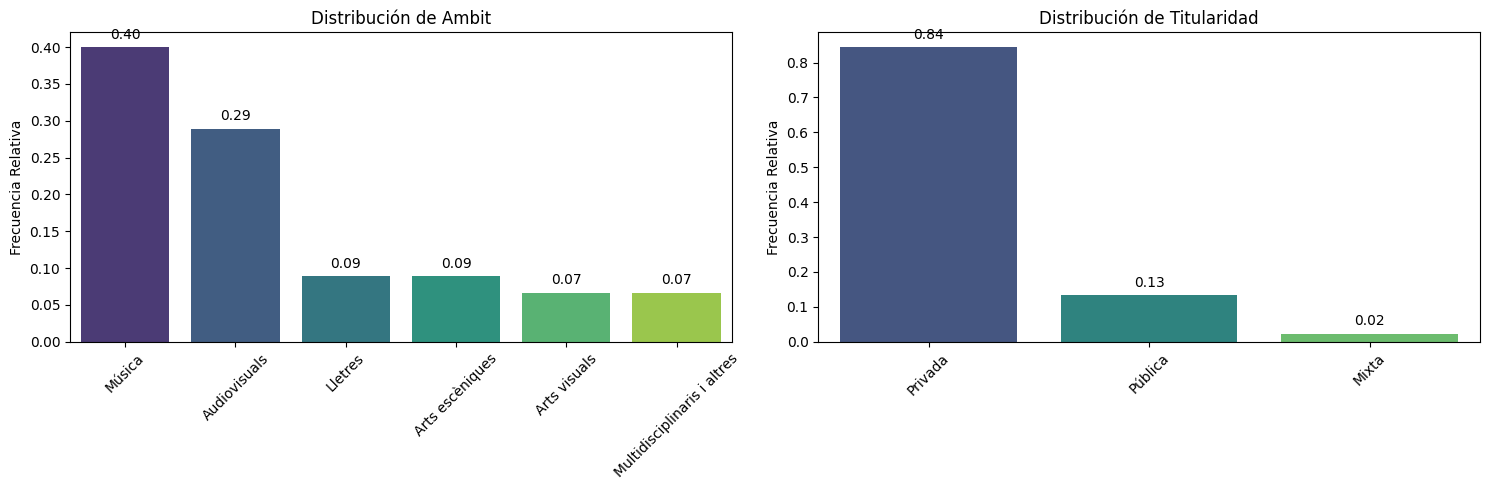

In [13]:
pinta_distribucion_categoricas(festivales_bcn_13,["Ambit","Titularidad"], relativa= True, mostrar_valores= True)

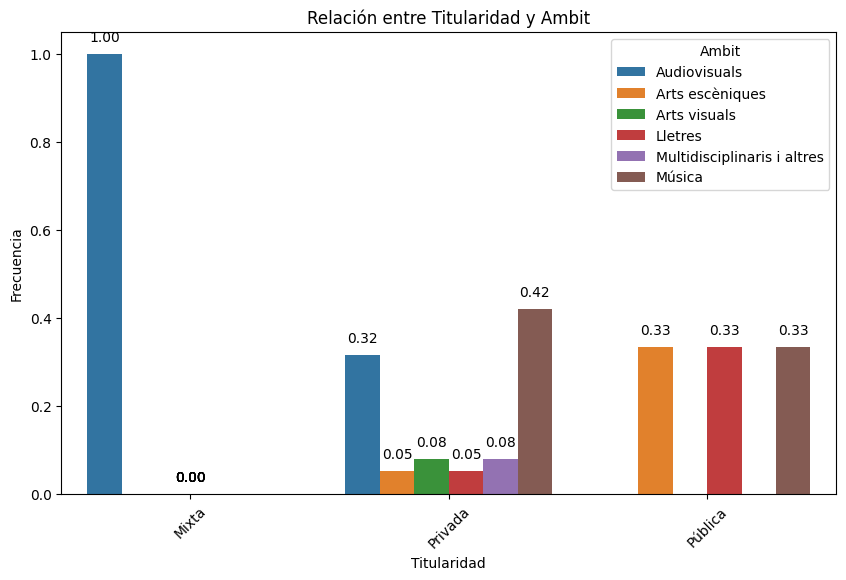

In [14]:
plot_categorical_relationship_fin(festivales_bcn_13, "Titularidad","Ambit", relative_freq = True, show_values= True)

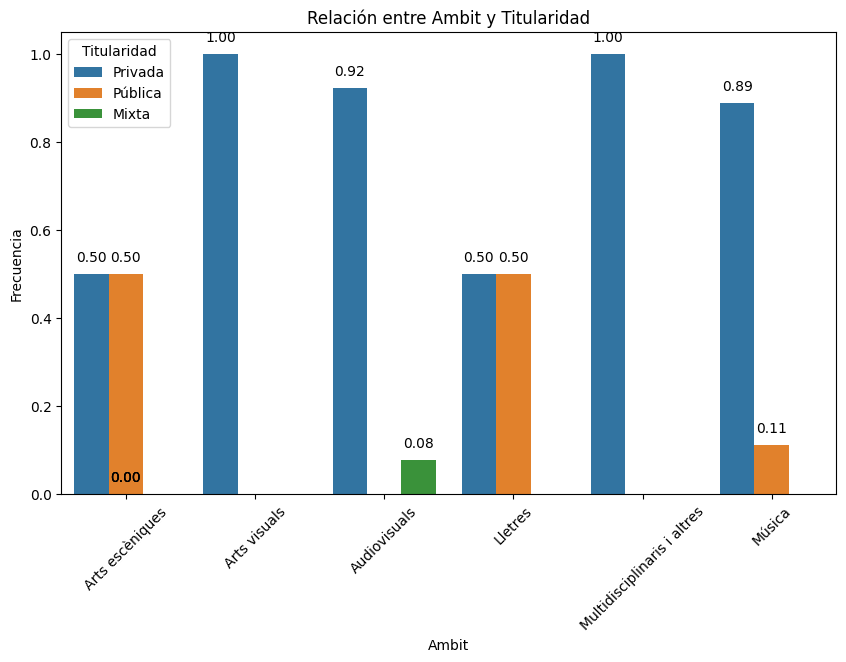

In [15]:
plot_categorical_relationship_fin(festivales_bcn_13, "Ambit","Titularidad", relative_freq = True, show_values= True)

Comentarios:<br>
Más allá de haber una clara relación entre el ámbito y la titularidad de los festivales en general, así como una relación 9 a 1 entre ámbito privado y público, todos los años, interesa destacar que en 2013 el sector privado se ha ocucpado básicamente de música y audiovosuales en ese orden, con los demásámbitos mucho más relegados, pero al fin y al cabo los ha tocad todos. Mientras que el sector privado también ha entrado en música, escénicas y letras a partes iguales, pero no ha tocado nada de los demás.<br>
Visto por sector, los festivales de artes visuales y multidisciplinares han dependido por completo del sector privado. Casi igual pasó con audiovisuales y música, con un pequeño porcentaje (apenas 1%) de participación o bien pública o bien mixta. Y Mientras que letras y escénicas el sector público y privado han participado a partes iguales.

2014

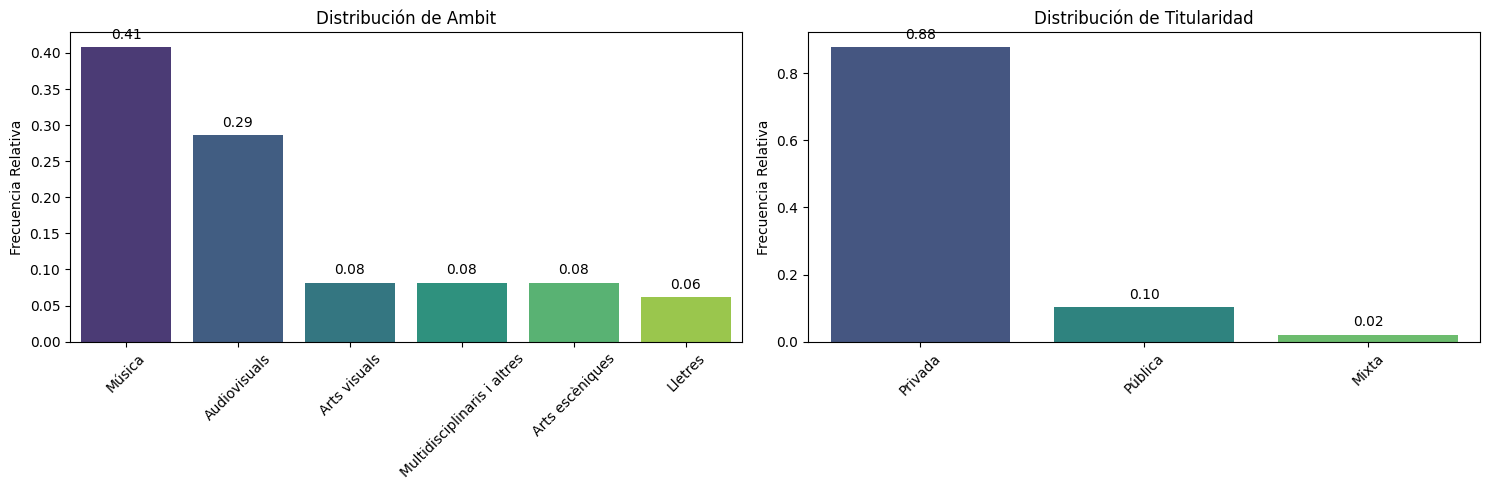

In [16]:
pinta_distribucion_categoricas(festivales_bcn_14,["Ambit","Titularidad"], relativa= True, mostrar_valores= True)

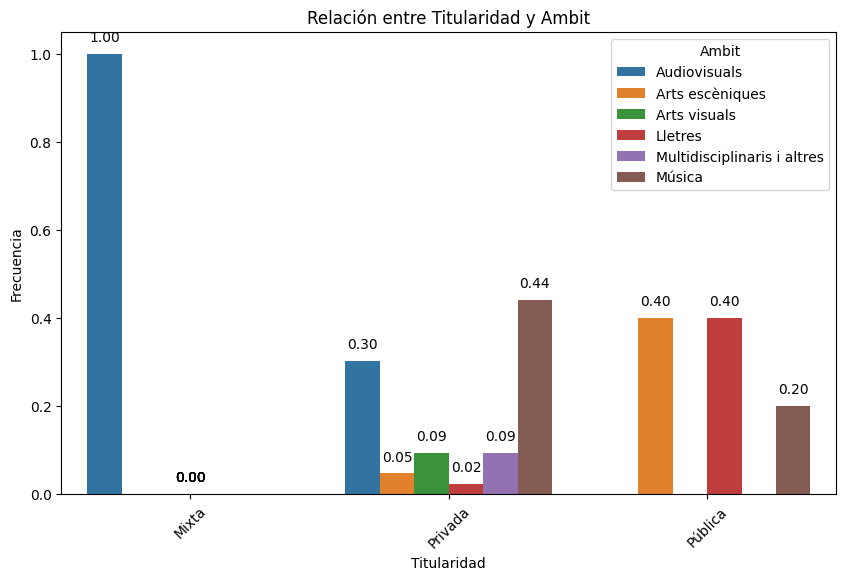

In [17]:
plot_categorical_relationship_fin(festivales_bcn_14, "Titularidad","Ambit", relative_freq = True, show_values= True)

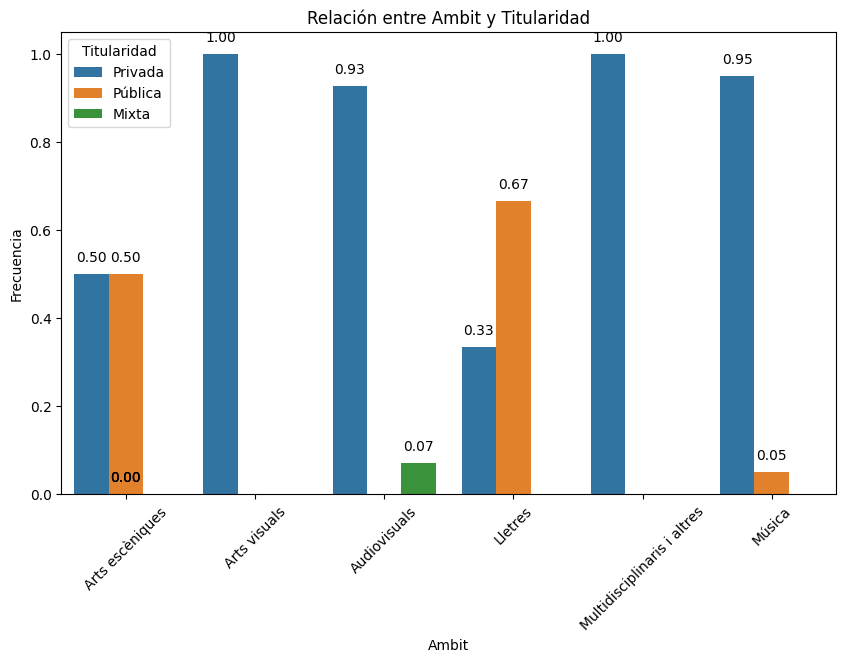

In [18]:
plot_categorical_relationship_fin(festivales_bcn_14, "Ambit","Titularidad", relative_freq = True, show_values= True)

Comentarios:<br>
En 2014 el sector privado se ha ocucpado de los diferentes sectores en indénticas proporciones, mientrasque el sector público ha priorizado esta vez un poco más letras y escénicas en relación a la música.<br>
Visto por sector, el único cambio respecto al año anterior es en el sector de las letras cobran protagonismo los festivales de titularidad públca, antes empatados

2015

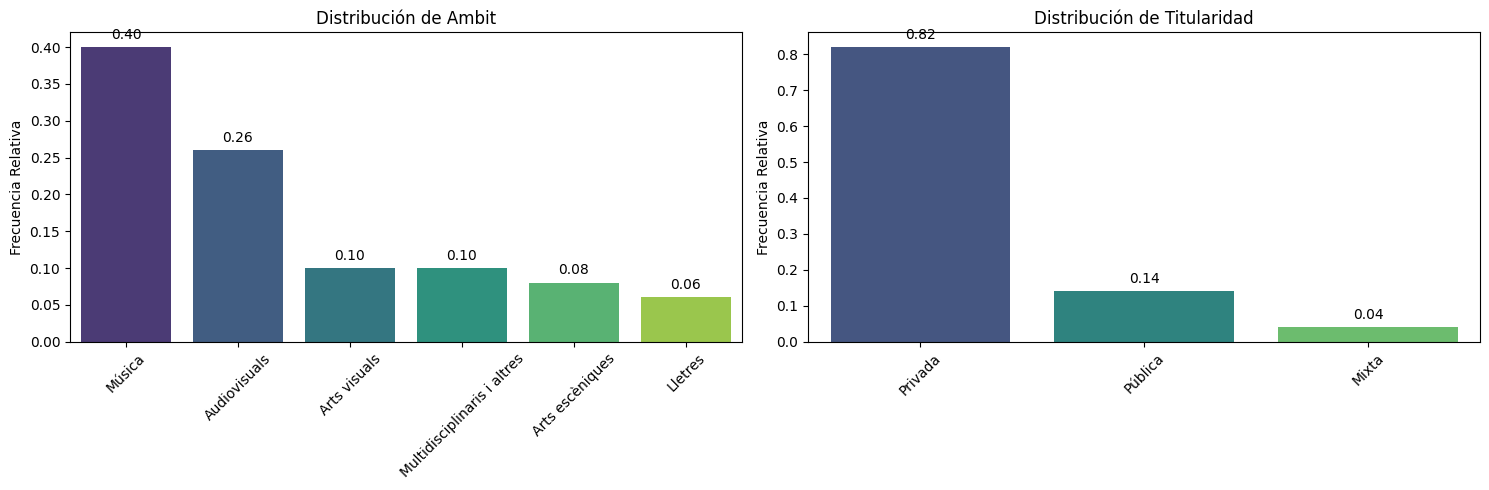

In [19]:
pinta_distribucion_categoricas(festivales_bcn_15,["Ambit","Titularidad"], relativa= True, mostrar_valores= True)

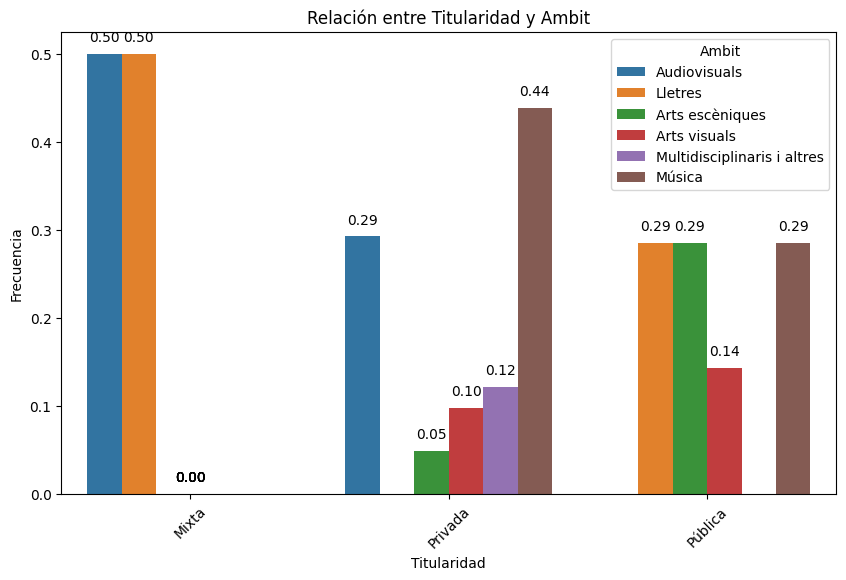

In [20]:
plot_categorical_relationship_fin(festivales_bcn_15, "Titularidad","Ambit", relative_freq = True, show_values= True)

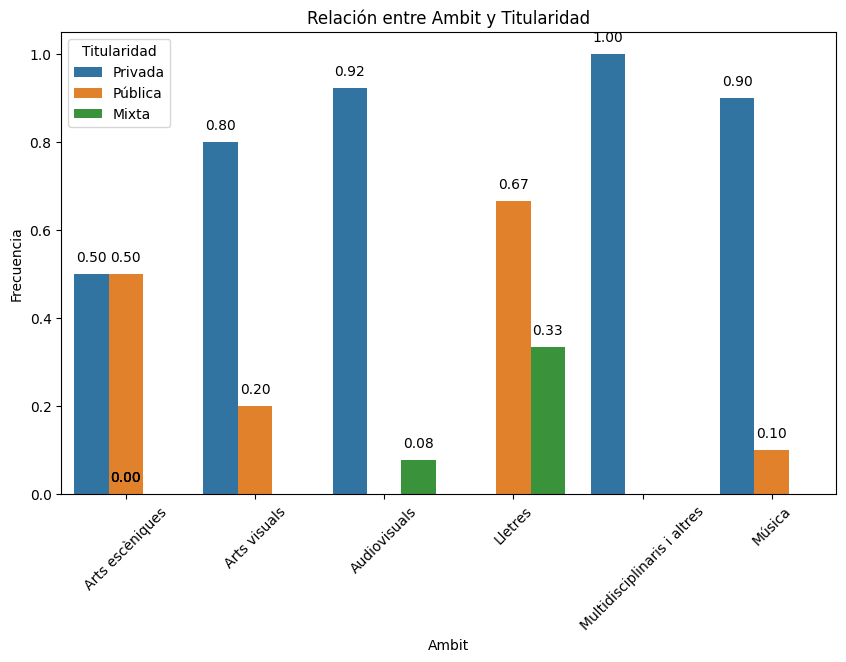

In [21]:
plot_categorical_relationship_fin(festivales_bcn_15, "Ambit","Titularidad", relative_freq = True, show_values= True)

Comentarios:<br>
Este año hay pequeños cambios:hay igual cantidad de festivales públicos de música, audiovisuales y escénicas, pero además, por primera vez, los hay de artes visuales, en menor medida.<br>
A su vez, este año se ven iniciativas mixtas tanto en audiovisuales como en letras, mientras que sector privado apenas cambia, solo deja las letras y a cambio apuesta algo más por los multidisiplinares.<br>
Visto por sector, el único cambio relevante, artes visuales quedar repartido 80/20 en privada y pública


2016

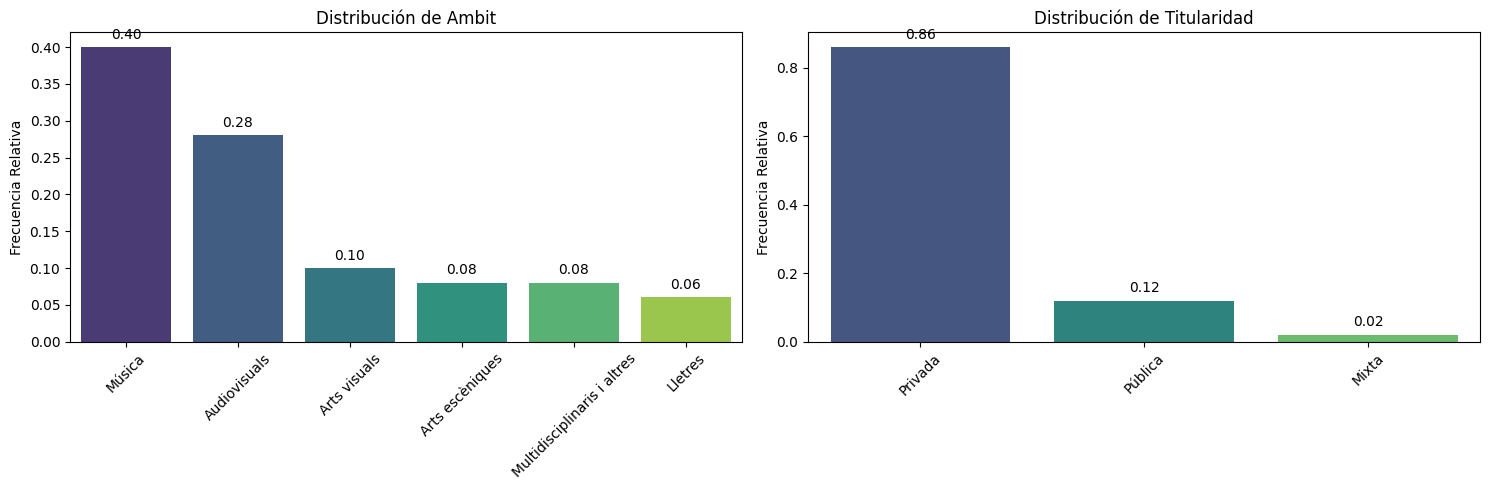

In [22]:
pinta_distribucion_categoricas(festivales_bcn_16,["Ambit","Titularidad"], relativa= True, mostrar_valores= True)

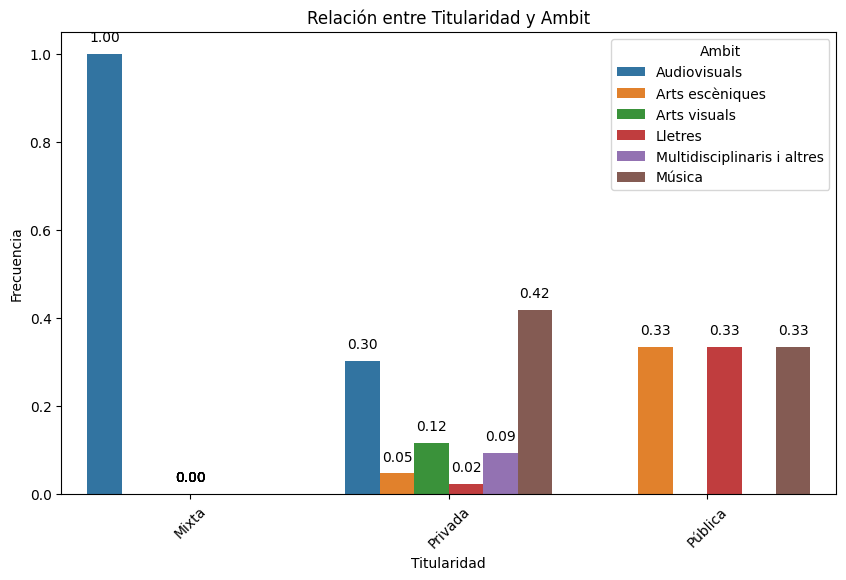

In [23]:
plot_categorical_relationship_fin(festivales_bcn_16, "Titularidad","Ambit", relative_freq = True, show_values= True)

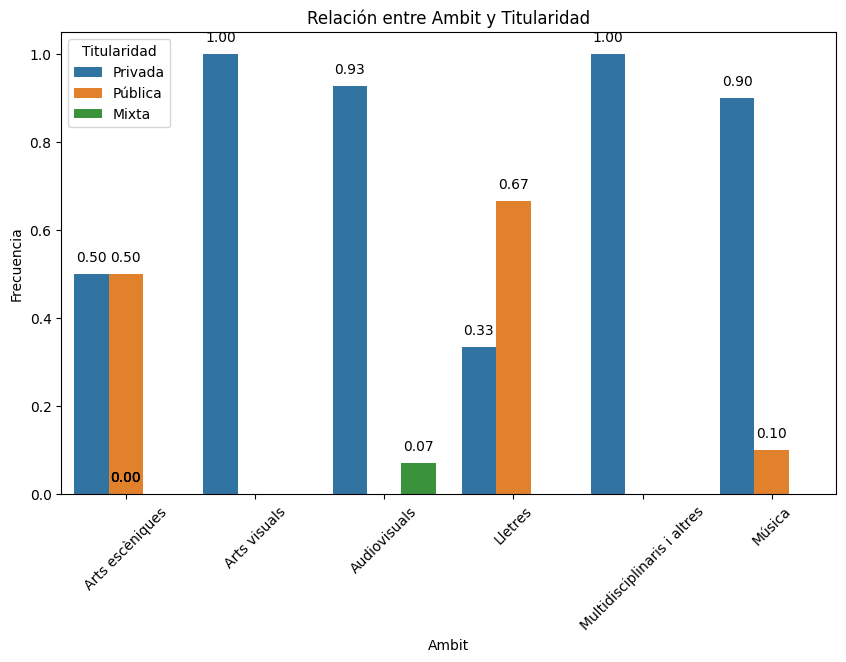

In [24]:
plot_categorical_relationship_fin(festivales_bcn_16, "Ambit","Titularidad", relative_freq = True, show_values= True)

Comentarios:<br>
Este año parece copaido del 2013, con apenas un unas décimas más de festivales de escénicas del sector privado en relación a aquel año. Lo demás, igual. La única variaza es, visto por ámbitos, que la proporción en letras vuelve a ser 2/3 pública vs 1/3 privada.

2017

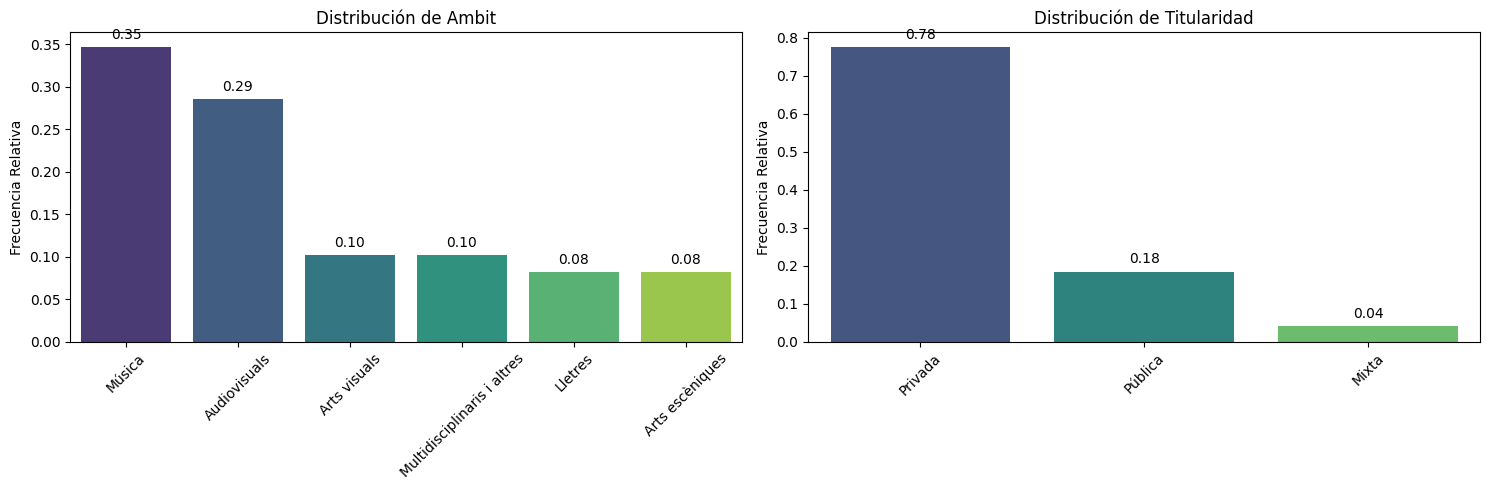

In [25]:
pinta_distribucion_categoricas(festivales_bcn_17,["Ambit","Titularidad"], relativa= True, mostrar_valores= True)

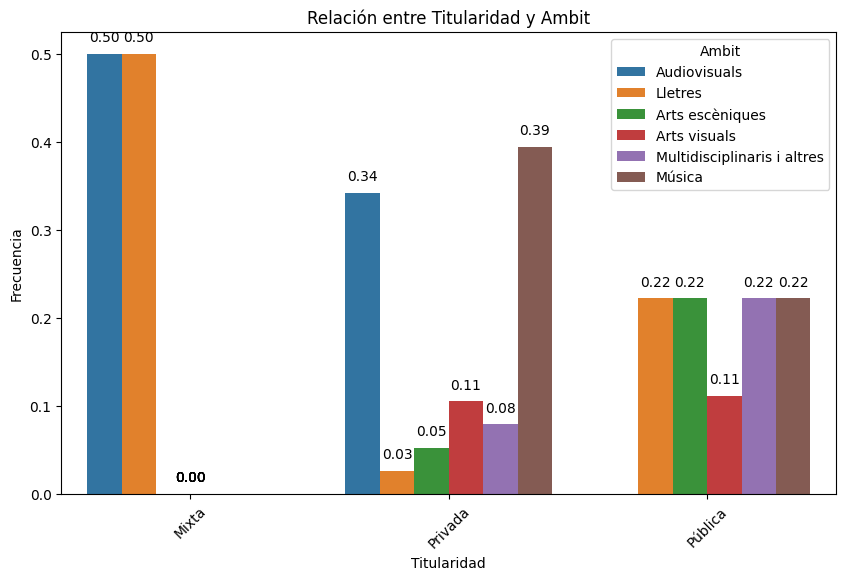

In [26]:
plot_categorical_relationship_fin(festivales_bcn_17, "Titularidad","Ambit", relative_freq = True, show_values= True)

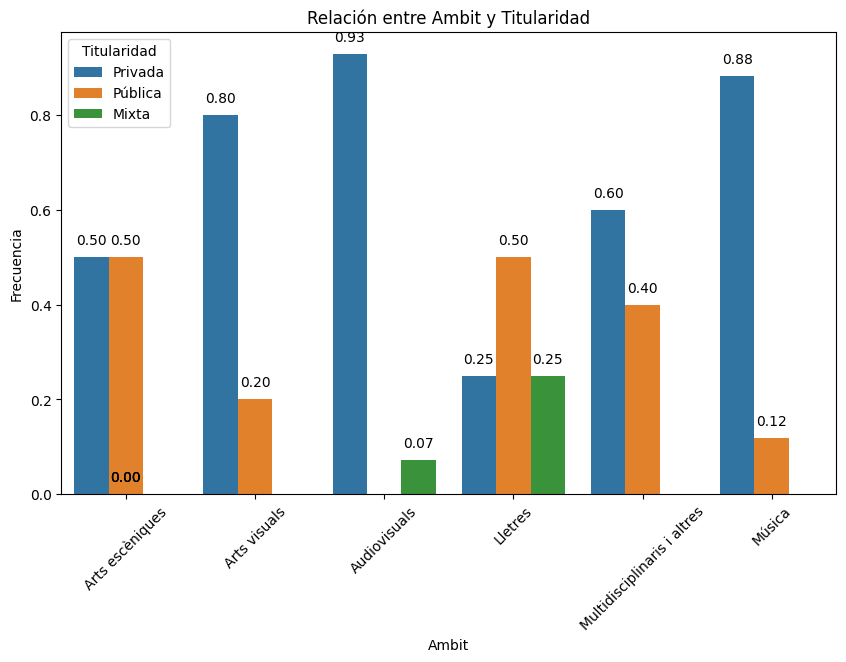

In [27]:
plot_categorical_relationship_fin(festivales_bcn_17, "Ambit","Titularidad", relative_freq = True, show_values= True)

Comentarios:<br>
Este 2017 ya hay más diversidad, si bien la proporcion 90% privado / 10% público se mantiene.<br>
Igual que en 1015, los fetsivales mixtos se reparten enre audiovisuales y letras, y es posible que se deba al Kosmópolis del CCCB. Si bien con pequeños ajustes, el sector privado seigue en todos los ámbitos, aunque mucho más marcadamente en música y audiovisuales, y el privado esta vez entra en los festivales multidisciplinares en la misma proporcion que sus ambitos clasicos de música, letras y escénicas, y visuales en menor medida.<br>
Visto por sector ecsénicas sigue a partes iguales público y privado, voisuales repite 80/20 como en 2015, audiovisuales no cambia con el paso de los años, 7% mixta y el resto privado, letras mayormente público, música 90!ç% privado (como la proporción global de público y privado de cada año), y multidisciplinares por primera vez está repartido, y en buena proporción, con un 40% público esta vez

2018

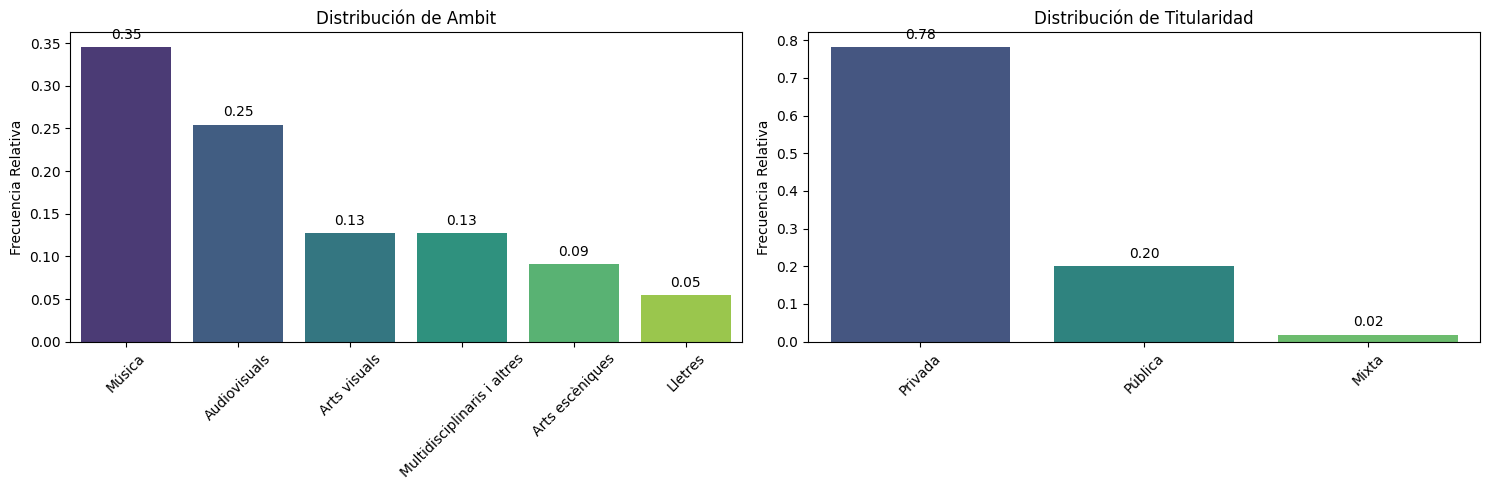

In [28]:
pinta_distribucion_categoricas(festivales_bcn_18,["Ambit","Titularidad"], relativa= True, mostrar_valores= True)

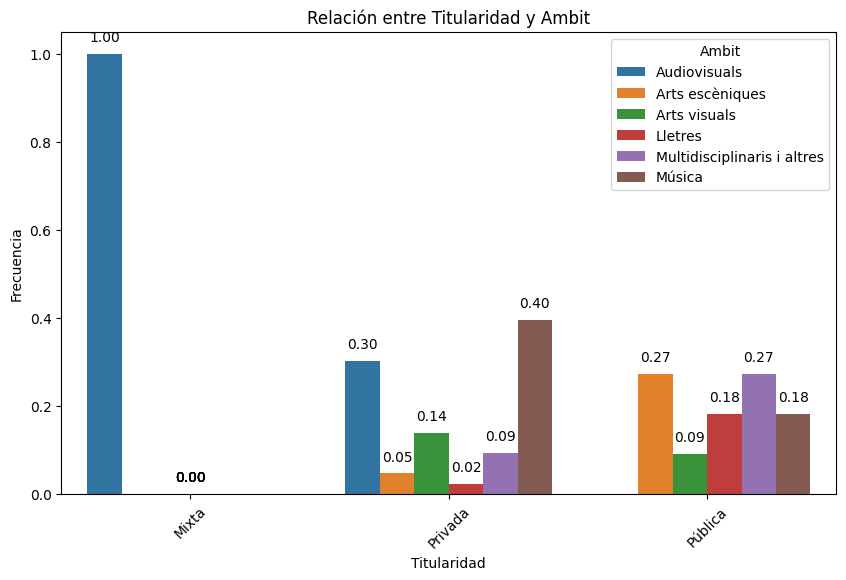

In [29]:
plot_categorical_relationship_fin(festivales_bcn_18, "Titularidad","Ambit", relative_freq = True, show_values= True)

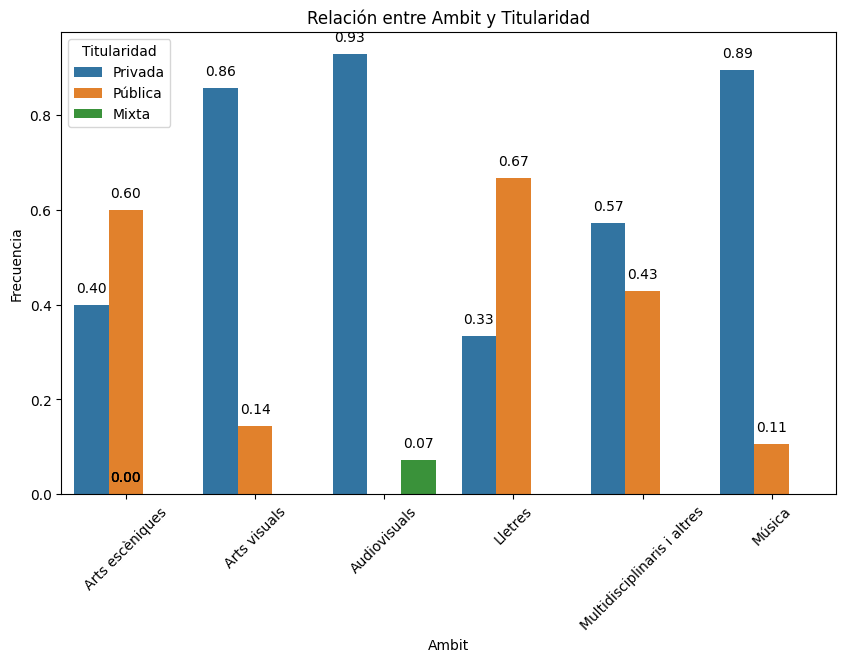

In [30]:
plot_categorical_relationship_fin(festivales_bcn_18, "Ambit","Titularidad", relative_freq = True, show_values= True)

Comentario: <br>
Por primera vez los festivales de titularidad pública representan el 20%. A la par, por primera vez después de 5 años queda atrás en 40& música 30% audiovisuales para pasar a 35 y 25, respectivamente, y la diferencia se reparte equilibradamente entre los otros 4 ámbitos.<br>
Poco cambia en  la distribución de los ámbitos de los festivales tanto misxtoscomo privados, aunque en los públicos baja un poco la poporción de música mientas que escenicas y multidciplinares sobran algo mas de protagonismo<br>


2019

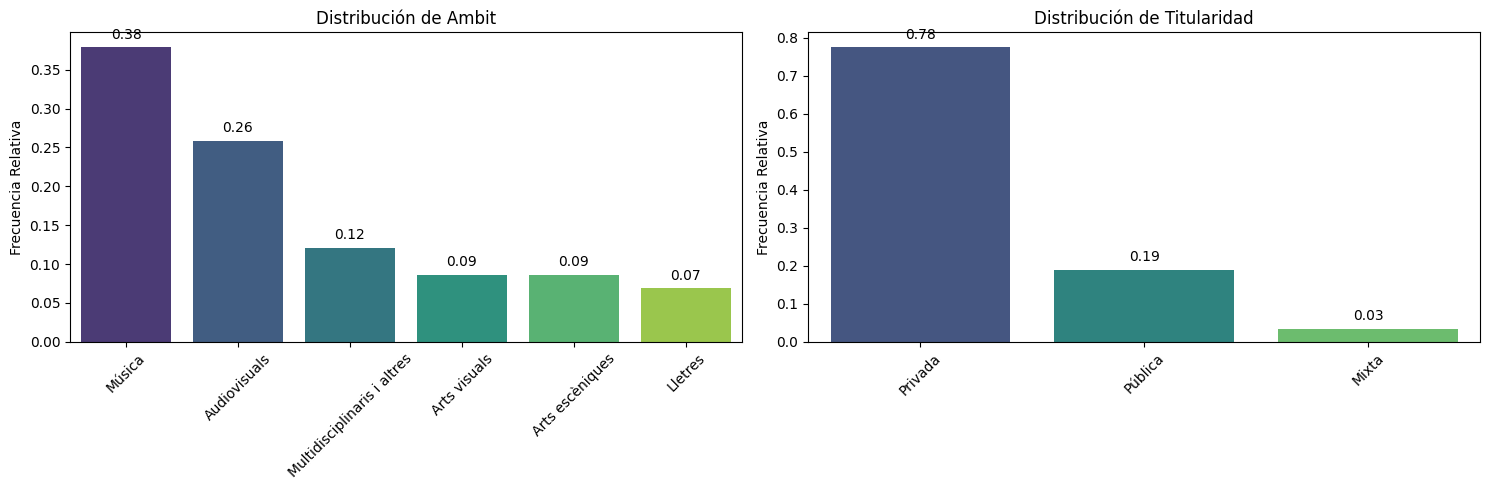

In [31]:
pinta_distribucion_categoricas(festivales_bcn_19,["Ambit","Titularidad"], relativa= True, mostrar_valores= True)

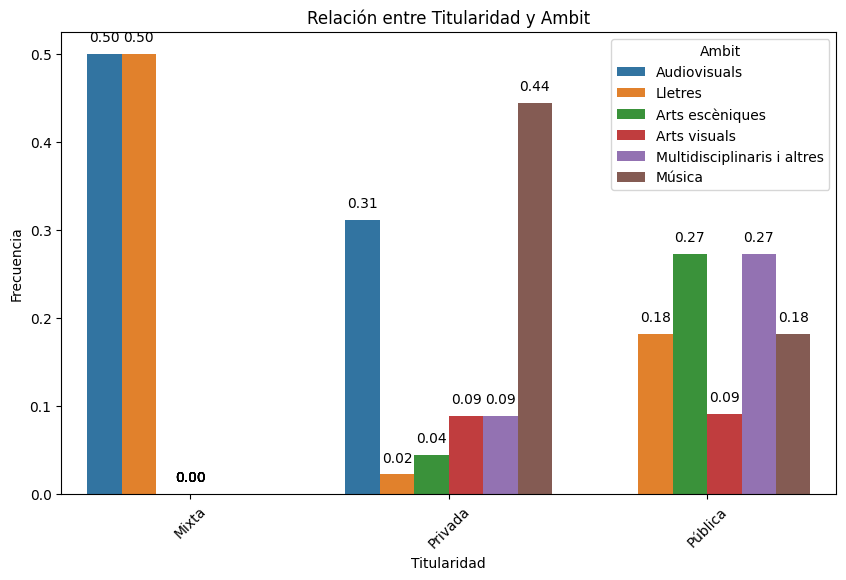

In [32]:
plot_categorical_relationship_fin(festivales_bcn_19, "Titularidad","Ambit", relative_freq = True, show_values= True)

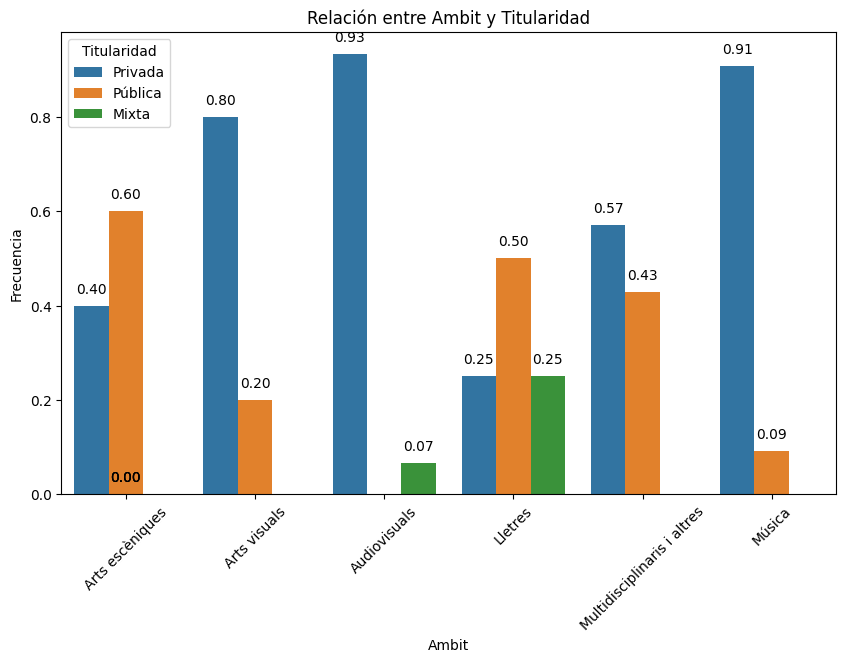

In [33]:
plot_categorical_relationship_fin(festivales_bcn_19, "Ambit","Titularidad", relative_freq = True, show_values= True)

Comentario: <br>
2019 es muy similar, con un ligero aumento proporcional de los festivales multidisciplinaes.<br>
Los fetsivales privados matienen la muy clara preeminencia de música y audiovisuales, y el sector público sigue sin entrar aún en audiovisual, mantiene el foco en multidisciplinares y escénicas, pero sin abandonar ni letras ni música ni, en menor medida, visuales.<br>
Visto por sector, apenas hay un ligero cambio y sube mínimamentela presencia de festivales públcos, sin afectar la predominancia privada.

2020

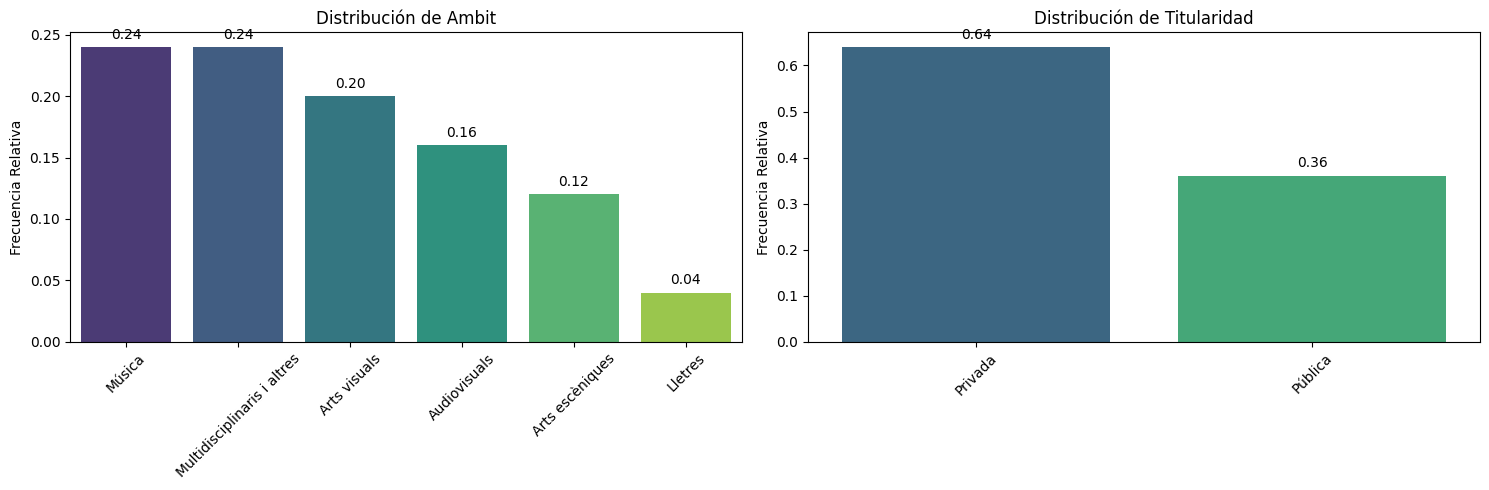

In [34]:
pinta_distribucion_categoricas(festivales_bcn_20,["Ambit","Titularidad"], relativa= True, mostrar_valores= True)

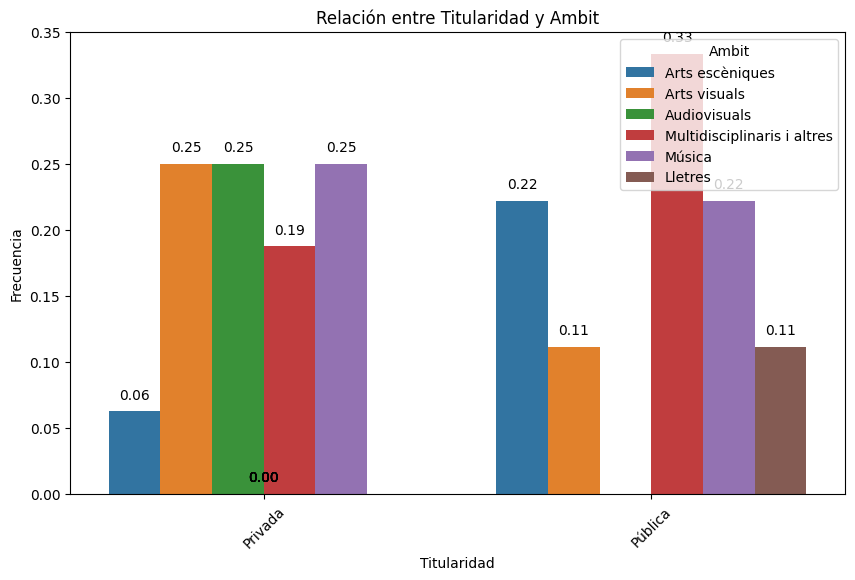

In [35]:
plot_categorical_relationship_fin(festivales_bcn_20, "Titularidad","Ambit", relative_freq = True, show_values= True)

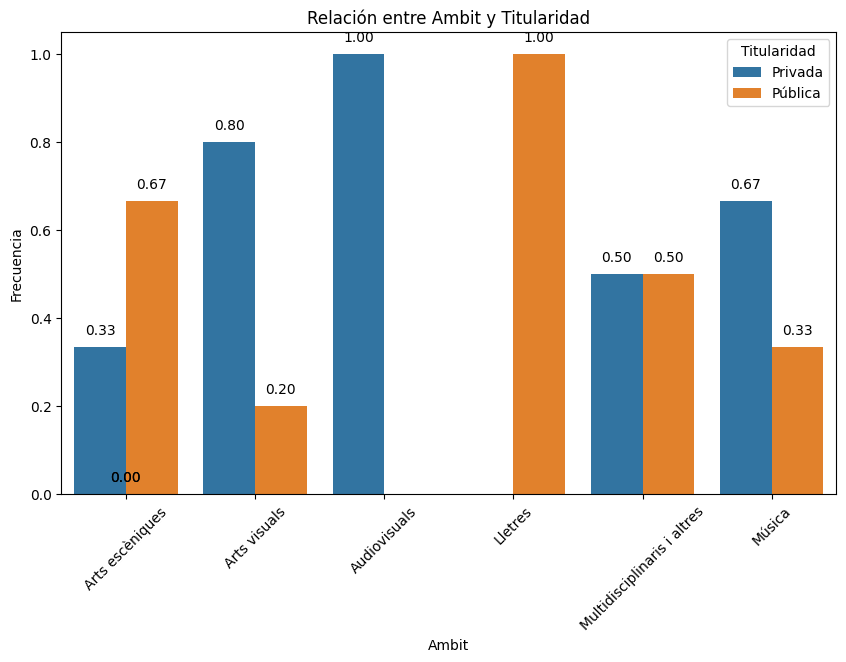

In [36]:
plot_categorical_relationship_fin(festivales_bcn_20, "Ambit","Titularidad", relative_freq = True, show_values= True)

Comentarios:<br>
Llegados a 2020, año de la pandemia, sí hay cambios notables a primera vista. El primero es que los festivales publicos ahora pasan a representar el 40 del total, el doble que el año anterior y 4 veces más que los primeros 5 años analizados.<br>
Las proporciones hasta ahora estables, si bien con leves variaciones, se desdibujar¡n. Aunque sigue dominando la música, cae del 35/40 al 24%, los audiovisuales caen del segundopuesto incuestionado al 4to con apenas un 16% y su lugar lo ocupa el multidiscipinar, con 24%, a la par de la musica y seguida de visuales, con 20% de cuota de fetsivales, y ecsñenicas consigue romper la barrera del 10%, 12 en concreto.<br>
La inversión privada se diversifica y equilibra más, con música, audiovisuales y visuales equilibradas, la publica da prioridad notable a multidisciplinar, aunque sigue sin entrar en audiovisuales, que siguen del todo en modo privado. Y excepro en multidisiplinares, que hay paridad, el reparto queda: audiovisuales solo privado, letras solo publico, música y vosuales mayormente (80€, 70%) privado, a lainversa de escénicas, 70% pública.

2021

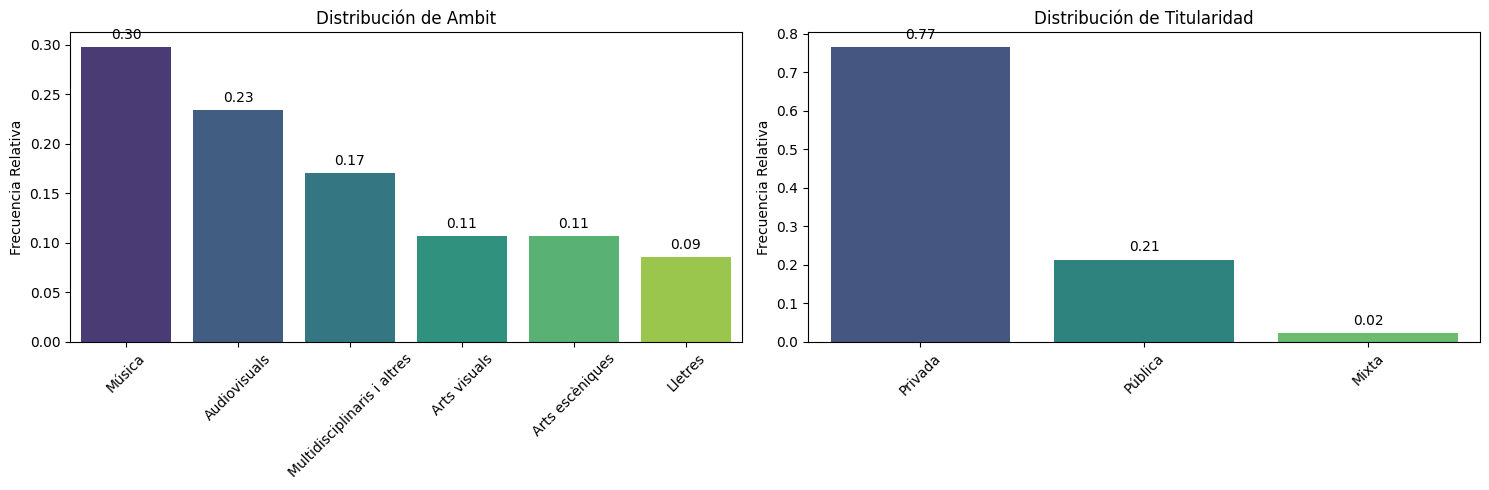

In [37]:
pinta_distribucion_categoricas(festivales_bcn_21,["Ambit","Titularidad"], relativa= True, mostrar_valores= True)

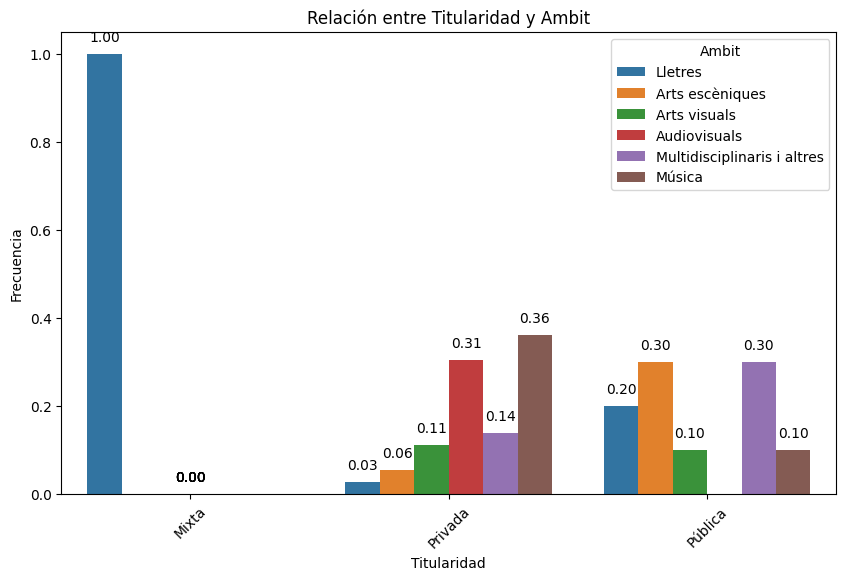

In [38]:
plot_categorical_relationship_fin(festivales_bcn_21, "Titularidad","Ambit", relative_freq = True, show_values= True)

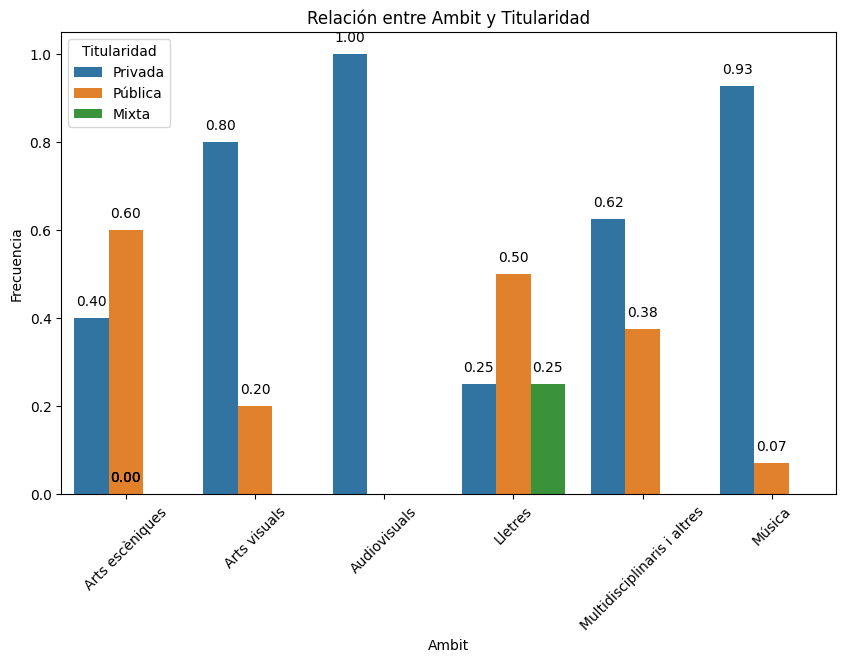

In [39]:
plot_categorical_relationship_fin(festivales_bcn_21, "Ambit","Titularidad", relative_freq = True, show_values= True)

Comentarios:<br>
La cosa va volviendo a la normalidad, los fetsivales públicos vuelven a representar el 20% del total. Si bien la musica vuelve a dominar pero apenas con 30%, y audiovisuales recupera el segundo lugar sin llegar al 25%. Las cuotas quedan más repartidas que antes de la pandemia. Habrá que ver si esta tendencia se mantiene o si yodo vuelve pocoa poco a su lugar.<br>
Con ligeras variaciones, la distribucion de ambitos en los públco y lo privado sí que vuelve a cifras pre pandemia. Y lo mismo a la distribucion de cada ámbito según titularidad

2022

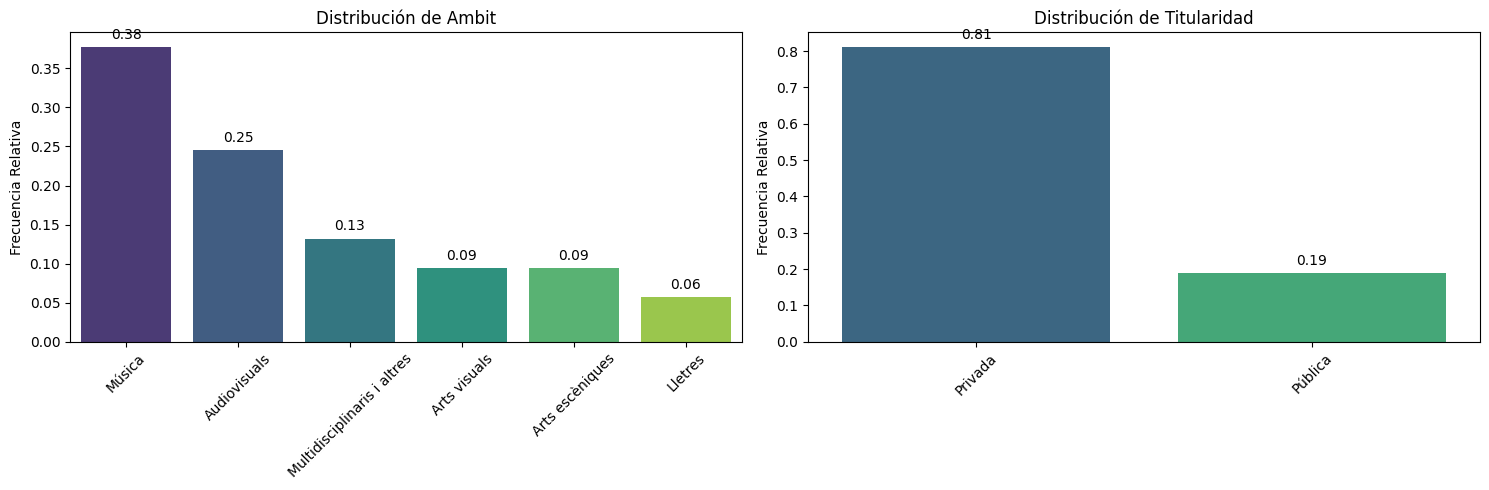

In [40]:
pinta_distribucion_categoricas(festivales_bcn_22,["Ambit","Titularidad"], relativa= True, mostrar_valores= True)

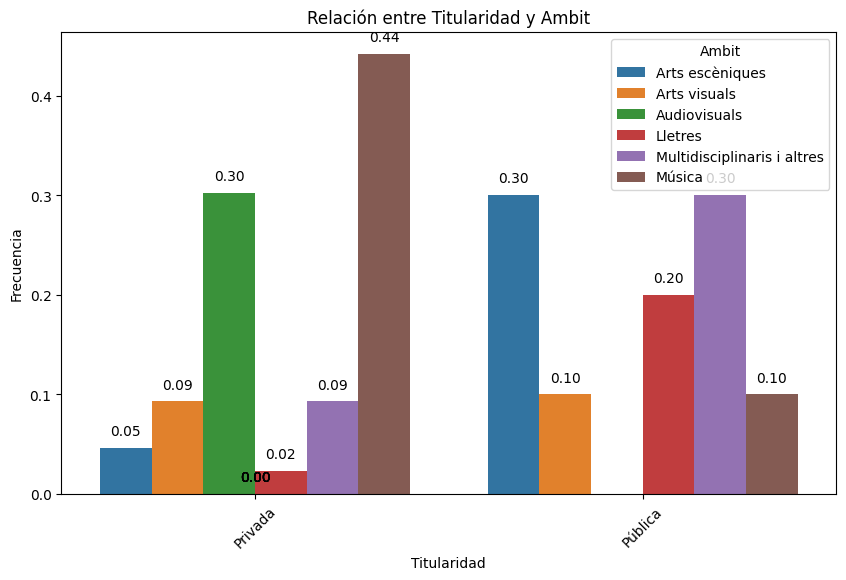

In [41]:
plot_categorical_relationship_fin(festivales_bcn_22, "Titularidad","Ambit", relative_freq = True, show_values= True)

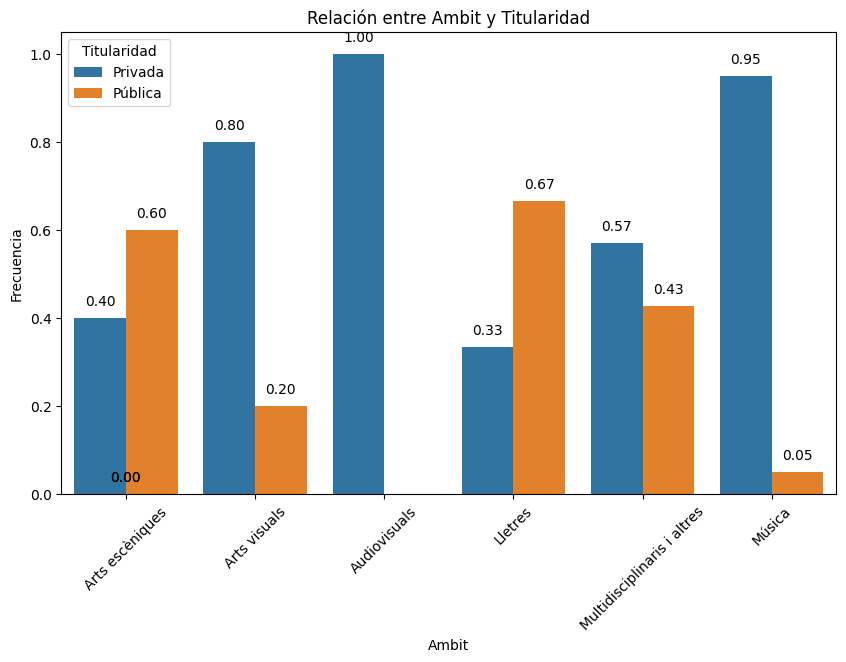

In [42]:
plot_categorical_relationship_fin(festivales_bcn_22, "Ambit","Titularidad", relative_freq = True, show_values= True)

Comentarios:<br>
Finalmente, en el 22 la música ha quedado relativamente estancada en esa primera posición pero con solo el 30%, y el reparto porcentual en general se mantiene como en el 21. <br>
La distribución del ñambito en la pública y la privada se mantiene tal cual el año anterior,sin cambios en general en todos los años, y a grandes rasgos el reparto de cada ámbito según publica o privada también varía bastante poco

#### Ámbito - Mes

2013

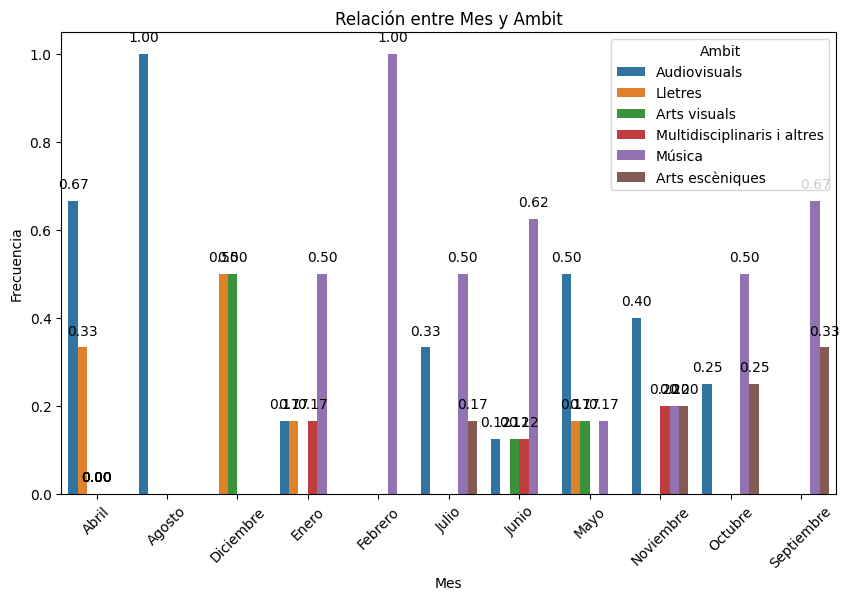

In [43]:
plot_categorical_relationship_fin(festivales_bcn_13, "Mes","Ambit", relative_freq = True, show_values= True)

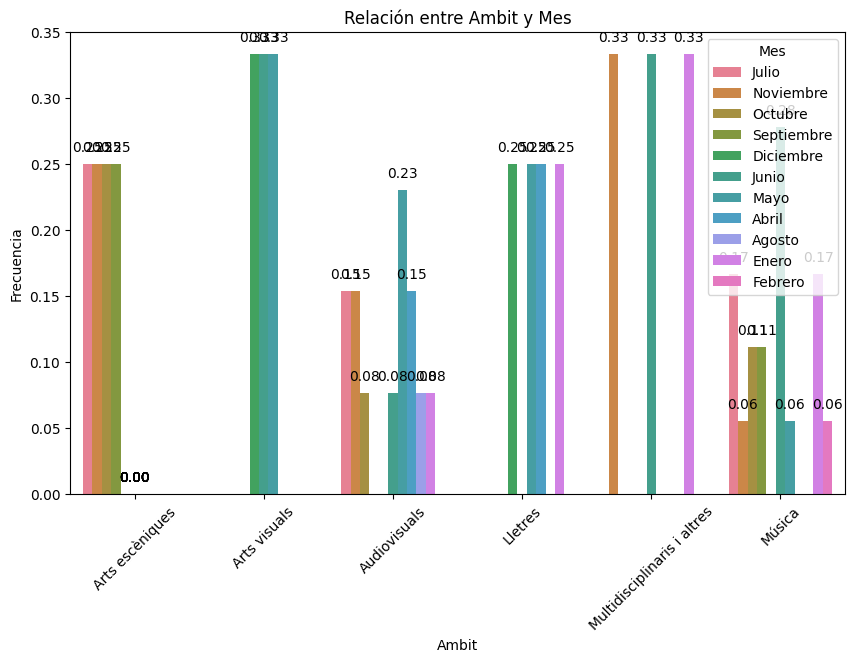

In [44]:
plot_categorical_relationship_fin(festivales_bcn_13, "Ambit","Mes", relative_freq = True, show_values= True)

Comentarios <br>
Por mes:<br>
En febrero solo hay música y agosto solo hay audiovisuales, mientras que enero, junio y noviembre tienen una programación más variada<br>
Por ámbito:<br>
Audiovisuales y música están repartidos en todo el año, como se verá en casi toda la década (lo que explica en parte que en ciertos meses solo haya una de estas dos actividades, con más probabilidad de ocurrencia), mientras que artes visuales y multidisciplinares se concentran en apenas 3 de los 12 meses

2014

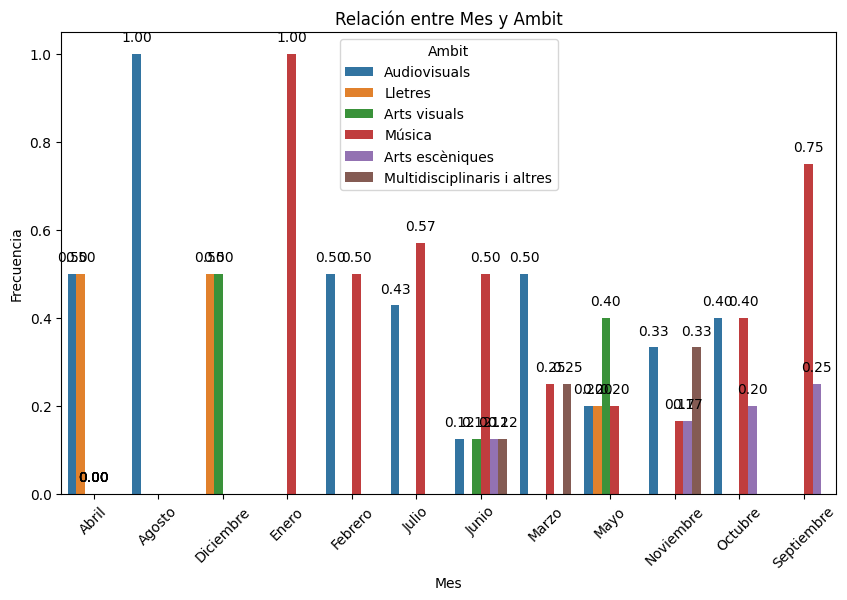

In [45]:
plot_categorical_relationship_fin(festivales_bcn_14, "Mes","Ambit", relative_freq = True, show_values= True)

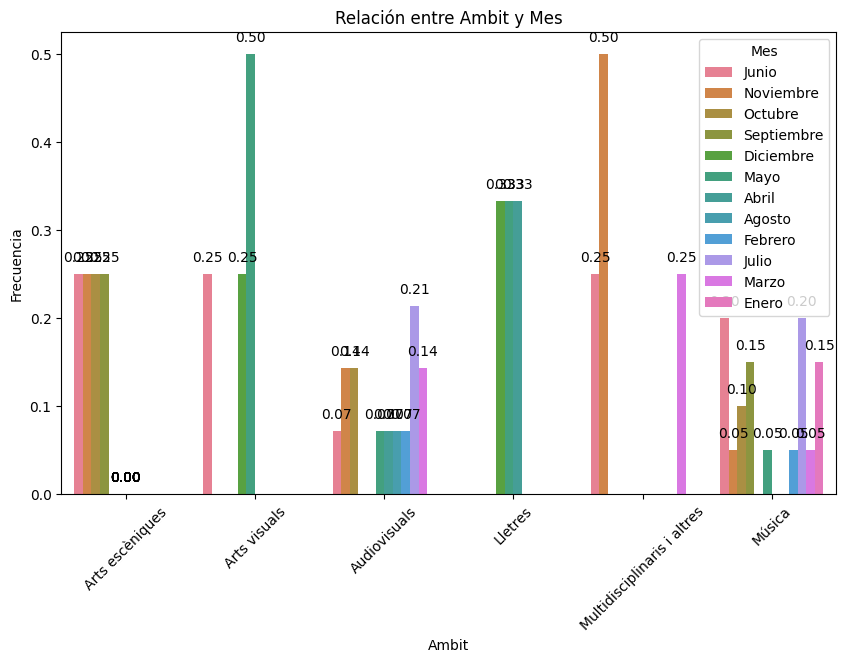

In [46]:
plot_categorical_relationship_fin(festivales_bcn_14, "Ambit","Mes", relative_freq = True, show_values= True)

Comentarios <br>
Por mes:<br>
En enero solo hay música y agosto solo hay audiovisuales, mientras que mayo y junio tienen una oferta más diversa<br>
Por ámbito:<br>
Audiovisuales y música están repartidos en todo el año, como se verá en casi toda la década (lo que explica en parte que en ciertos meses solo haya una de estas dos actividades, con más probabilidad de ocurrencia), mientras que artes visuales y multidisciplinares se concentran en apenas 3 de los 12 meses. <br>
En conjunto, es casi igual al 2013

2015

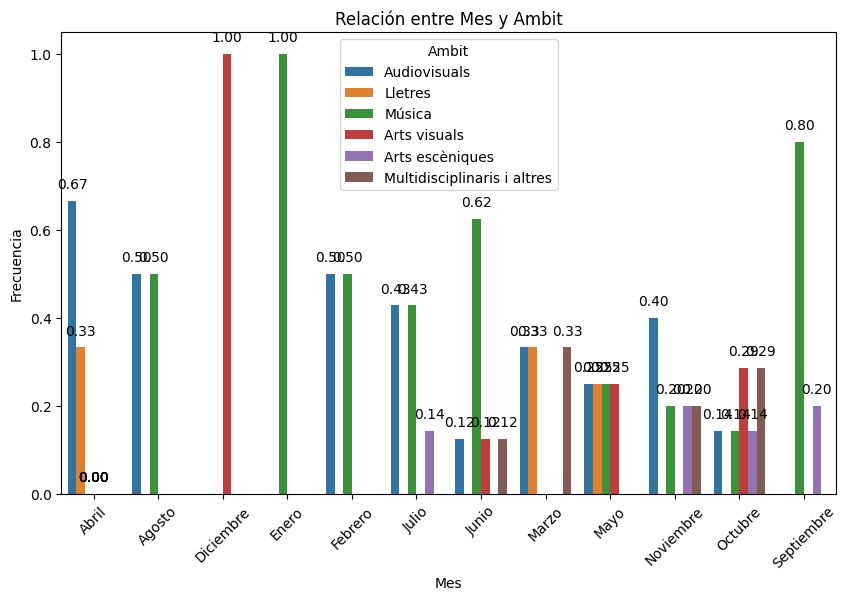

In [47]:
plot_categorical_relationship_fin(festivales_bcn_15, "Mes","Ambit", relative_freq = True, show_values= True)

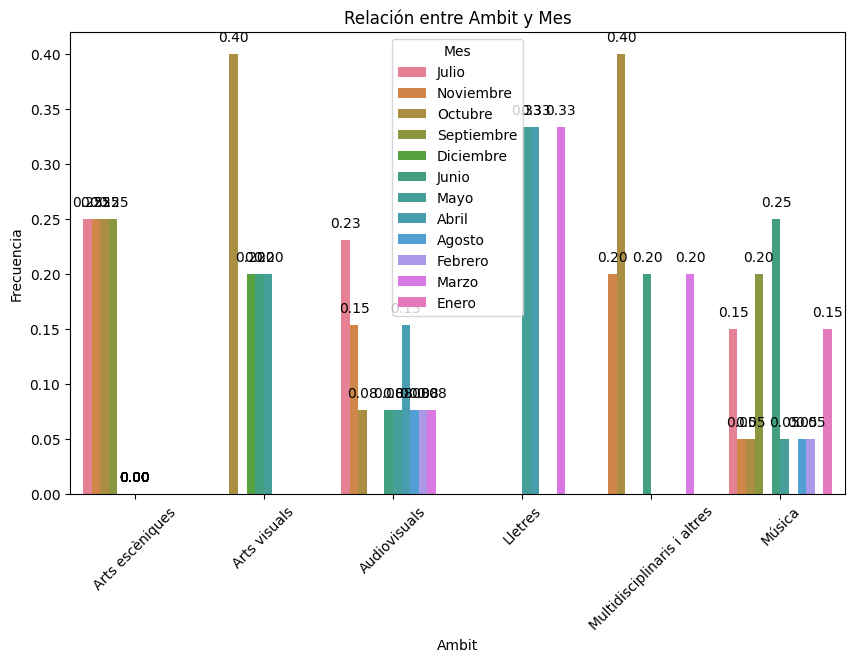

In [48]:
plot_categorical_relationship_fin(festivales_bcn_15, "Ambit","Mes", relative_freq = True, show_values= True)

Comentarios <br>
Por mes:<br>
En enero solo hay música y diciembre solo hay visuales, que es el principal cambio respecto al año anterior, mientras que mayo y junio ofrecen más variedad <br>
Por ámbito:<br>
Audiovisuales y música están repartidos en todo el año, como se ve en casi toda la década, mientras que de letras solo hay 1 mes <br>
En conjunto, es casi igual al 2013 y 14

2016

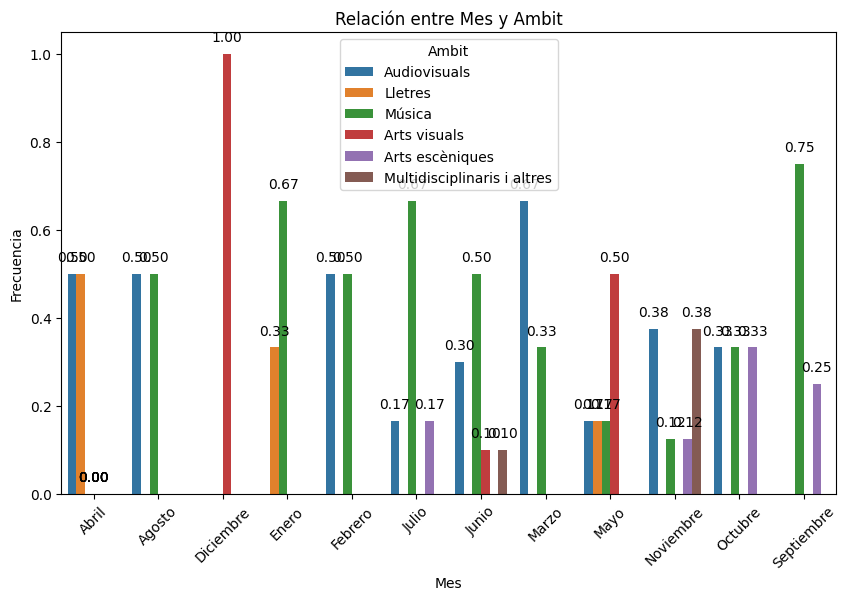

In [49]:
plot_categorical_relationship_fin(festivales_bcn_16, "Mes","Ambit", relative_freq = True, show_values= True)

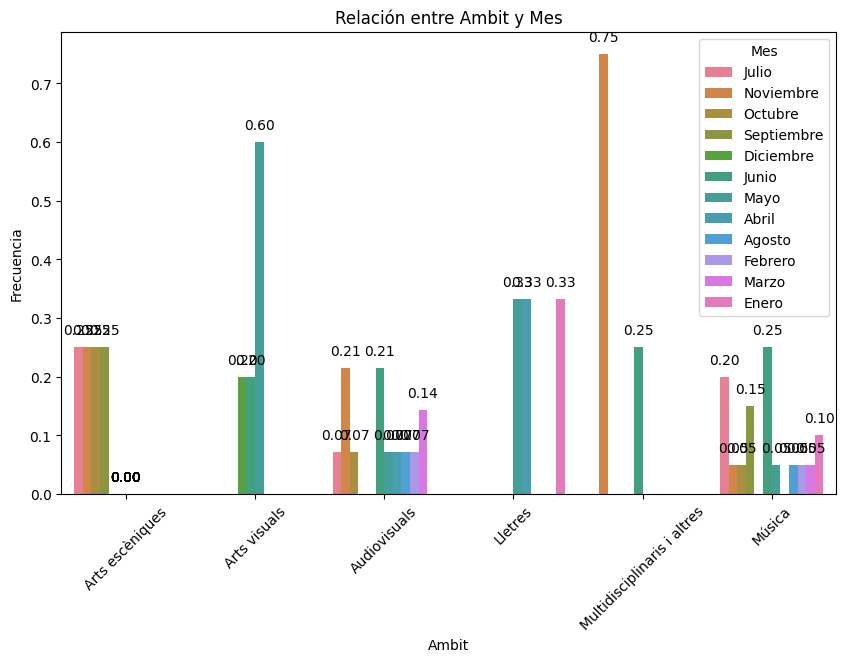

In [50]:
plot_categorical_relationship_fin(festivales_bcn_16, "Ambit","Mes", relative_freq = True, show_values= True)

Comentarios <br>
Por mes:<br>
Esta vez, en diciembre solo hay artes visuales, mientras que mayo y junio ofrecen más variedad <br>
Por ámbito:<br>
Audiovisuales y música están repartidos en todo el año, y multidiciplinares solo en 2 meses <br>

2017

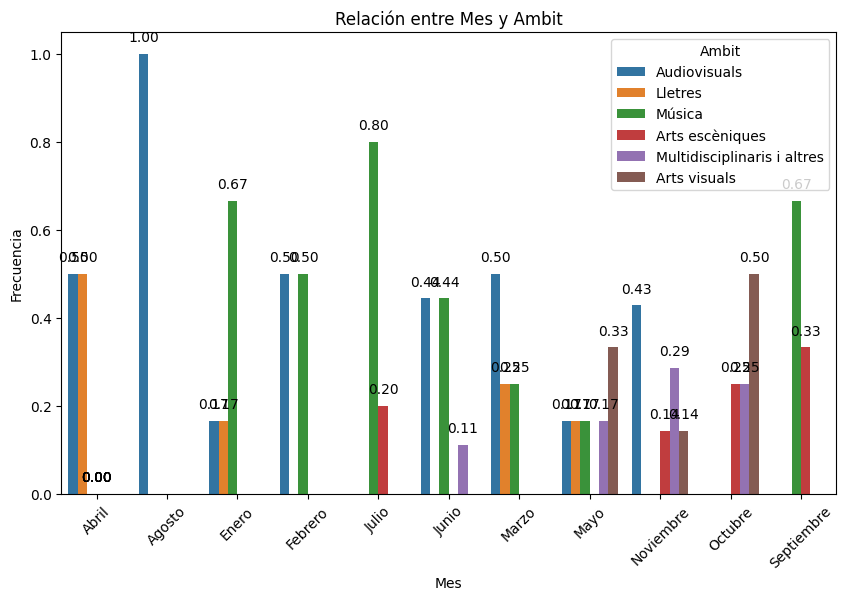

In [51]:
plot_categorical_relationship_fin(festivales_bcn_17, "Mes","Ambit", relative_freq = True, show_values= True)

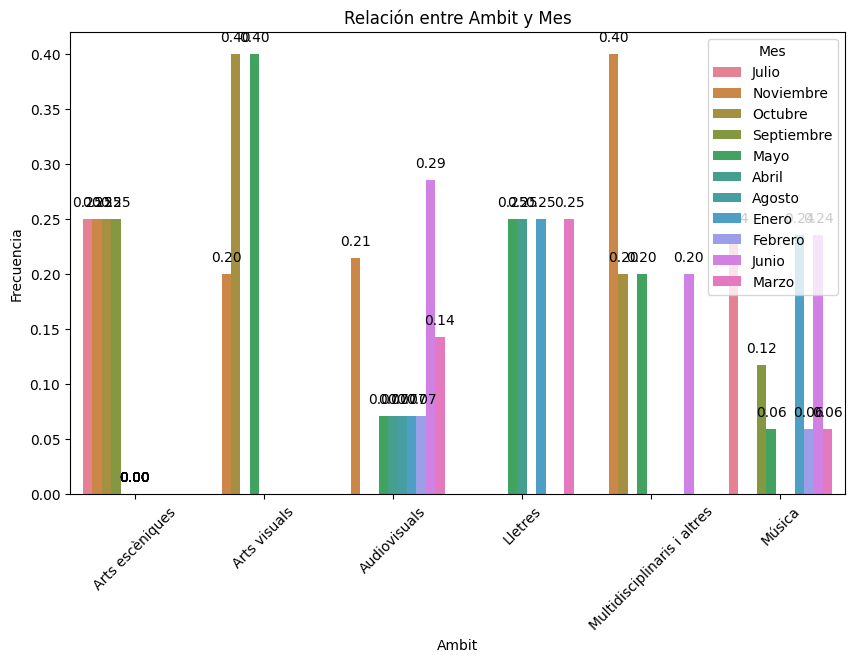

In [52]:
plot_categorical_relationship_fin(festivales_bcn_17, "Ambit","Mes", relative_freq = True, show_values= True)

Comentarios <br>
Por mes:<br>
En agosto solo hay audiovisuales, como sucedía en 2013 y 2014, y mayo está bastante repartido. <br>
Por ámbito:<br>
Audiovisuales y música están repartidos en todo el año, y lo que menos se ve son visuales, en 3 <br>

2018

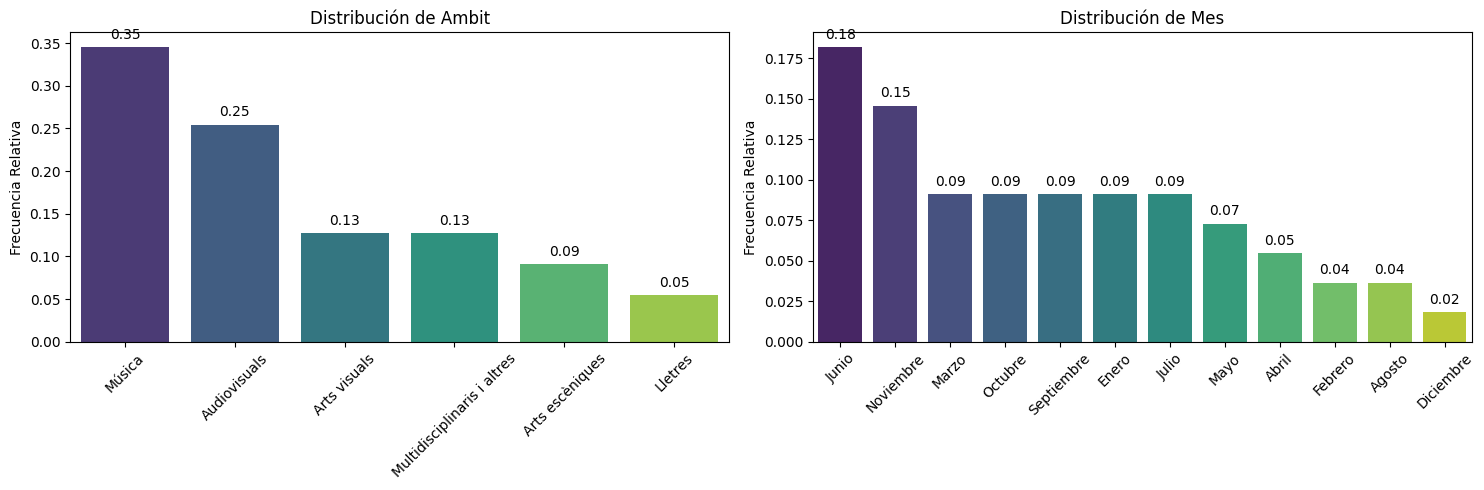

In [53]:
pinta_distribucion_categoricas(festivales_bcn_18,["Ambit","Mes"], relativa= True, mostrar_valores= True)

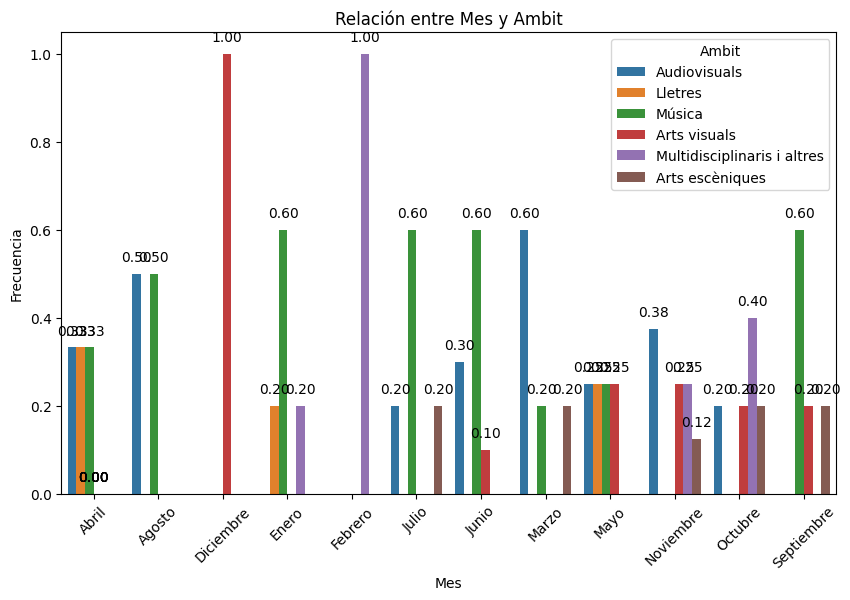

In [54]:
plot_categorical_relationship_fin(festivales_bcn_18, "Mes","Ambit", relative_freq = True, show_values= True)

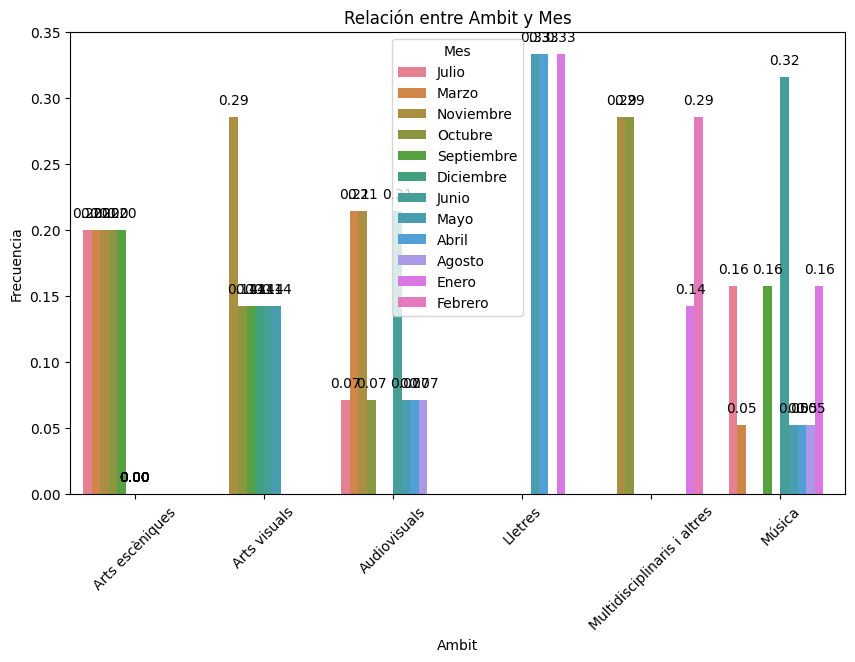

In [55]:
plot_categorical_relationship_fin(festivales_bcn_18, "Ambit","Mes", relative_freq = True, show_values= True)

Comentario: <br>
Por mes:<br>
En febrerosolo hay multidisciplinar, y diciembre mantienela exclusividad de visuales, como en 2015 y 16, y mayo y noviembre estám bastante repartido. Mayo tiene tradicion de estar bien repartido (14, 15, 15,17,18), pero es el último mes, excepto por el 21<br>
Por ámbito:<br>
Audiovisuales y música están repartidos en todo el año, y lo que menos se ve son letras, en 3 <br>

2019

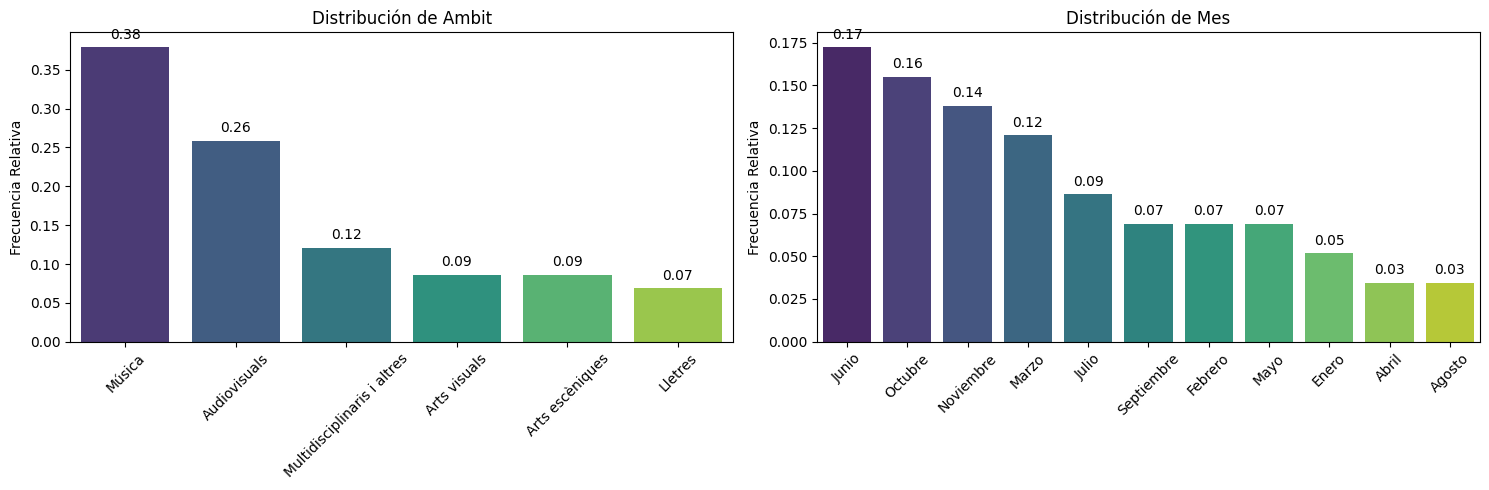

In [56]:
pinta_distribucion_categoricas(festivales_bcn_19,["Ambit","Mes"], relativa= True, mostrar_valores= True)

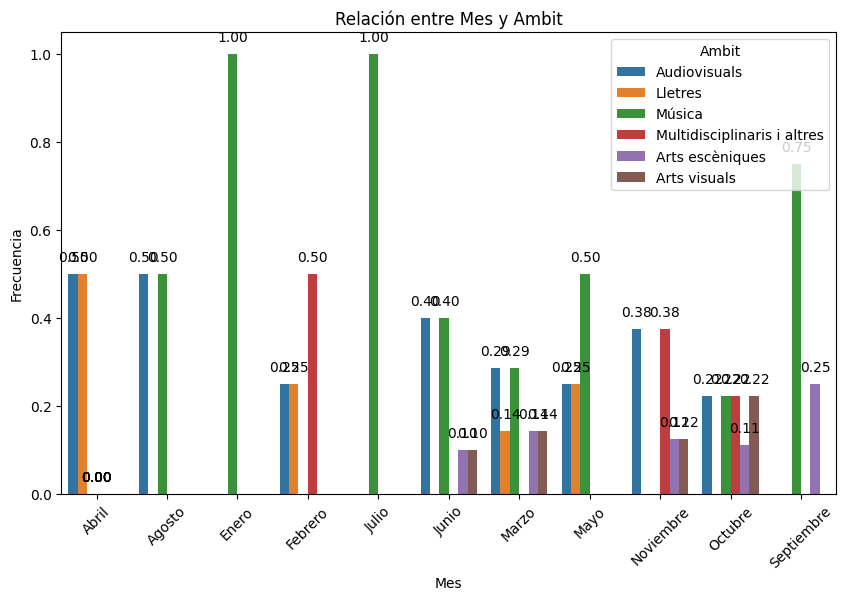

In [57]:
plot_categorical_relationship_fin(festivales_bcn_19, "Mes","Ambit", relative_freq = True, show_values= True)

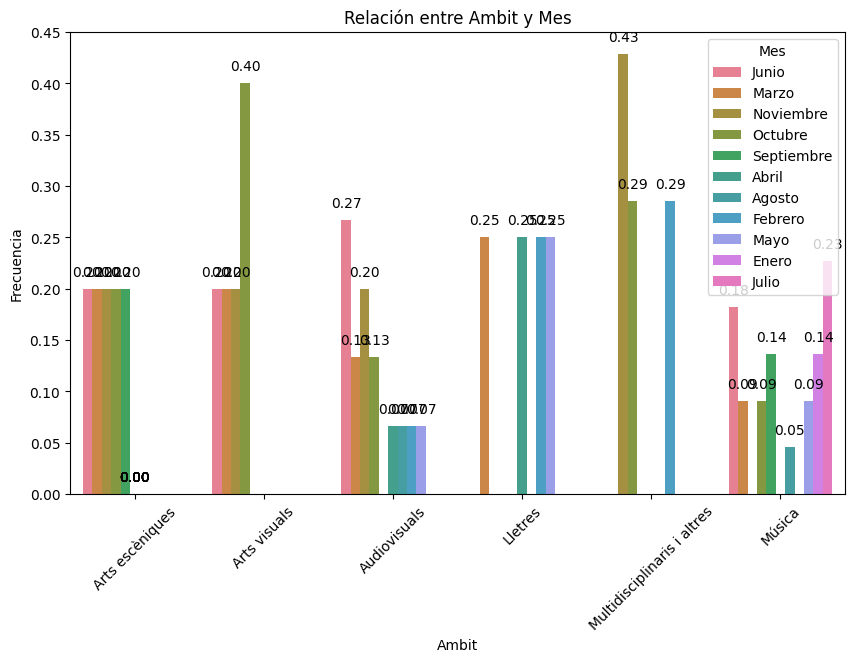

In [58]:
plot_categorical_relationship_fin(festivales_bcn_19, "Ambit","Mes", relative_freq = True, show_values= True)

Comentarios <br>
Por mes:<br>
Este año es la música la única que tiene presencia en julio y enero, y mientras que marzo, junio y octubre se ven bien repartido. Junio tiene tendencia a estar repartido, como se ha visto también en 2013, 14,15 y 16, y de nuevo en el 21.<br>
Por ámbito:<br>
Audiovisuales y música están repartidos en todo el año, como siempre, y lo que menos se ve son multidisciplinares, en 3 <br>

2020

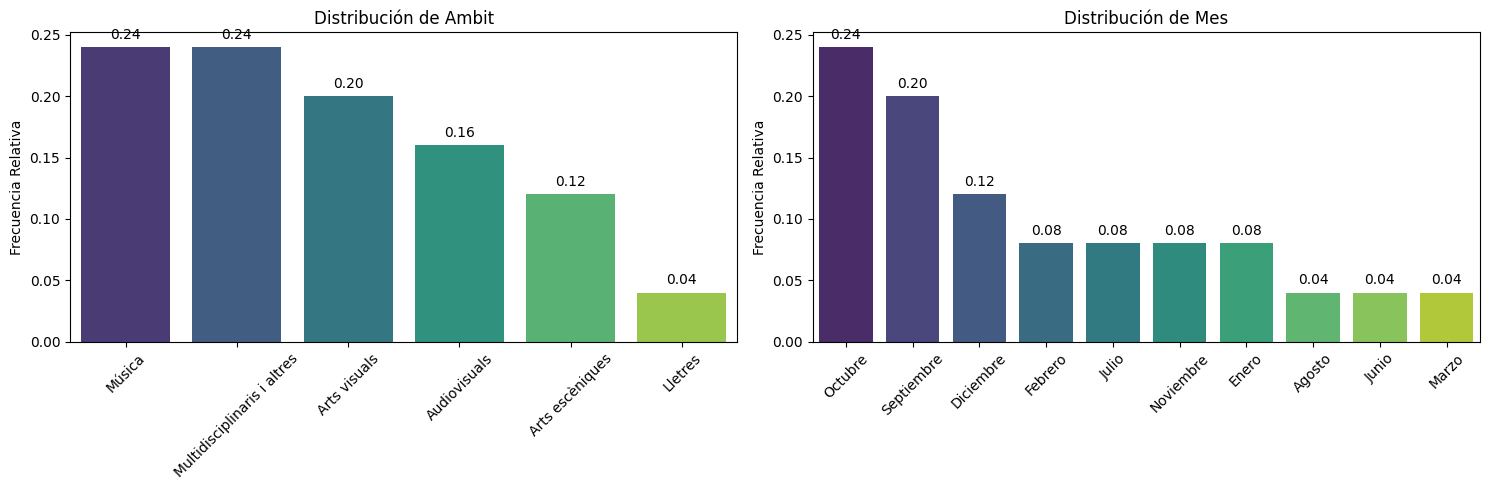

In [59]:
pinta_distribucion_categoricas(festivales_bcn_20,["Ambit","Mes"], relativa= True, mostrar_valores= True)

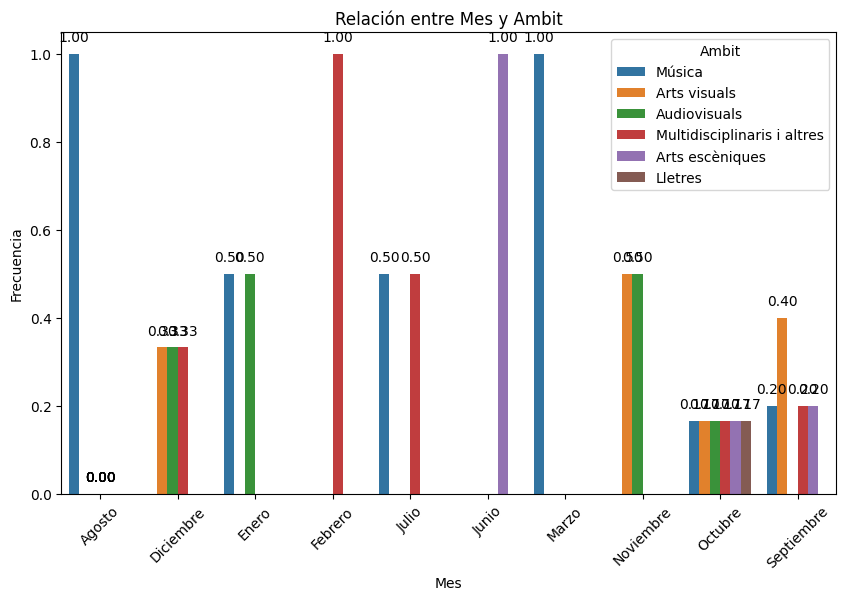

In [60]:
plot_categorical_relationship_fin(festivales_bcn_20, "Mes","Ambit", relative_freq = True, show_values= True)

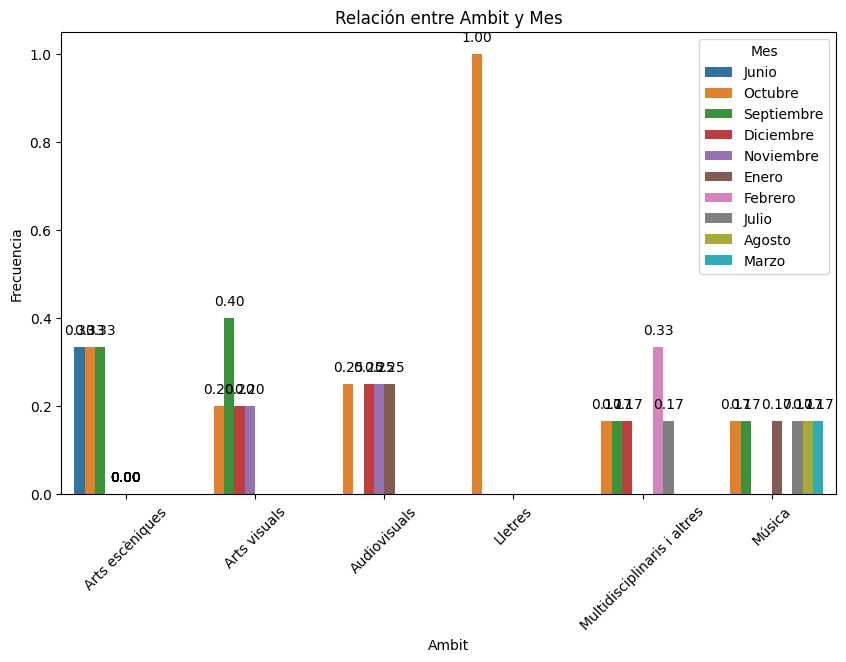

In [61]:
plot_categorical_relationship_fin(festivales_bcn_20, "Ambit","Mes", relative_freq = True, show_values= True)

Comentarios <br>
Por mes:<br>
Este año de la pandemia, con menos actividad, se refleja que muchos meses tienen unas pocas propuestas de gran cantidad de asistentes. Así en febrero solo hay multidisciplinares, en junio escénicas y en agosto música. Luego es en octubre cuando hay un abanico mñas variado. Este mes ya desde antes tenía una gama amplia de oferta de festivales, como se había cisto en 2015 y 19, y se mantendrá en 2021 y 22. <br>
Por ámbito:<br>
Este año es la música, que siempre ha ocupado el primer lugar en cuanto a número de festivales, la mejor distribuida a lo largo de año, si bien, justamente este año, es cuando perdía protagonismo y empataba con otros 2 ámbitos con 24% cada uno, en oposición a letras, en solo 1 mes <br>

2021

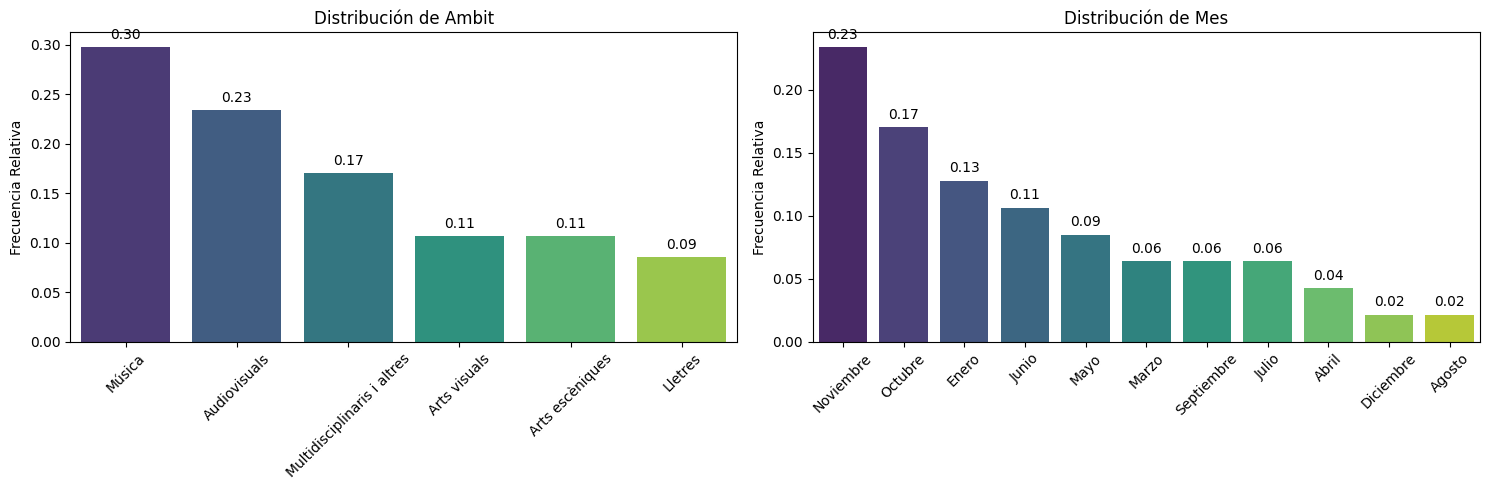

In [62]:
pinta_distribucion_categoricas(festivales_bcn_21,["Ambit","Mes"], relativa= True, mostrar_valores= True)

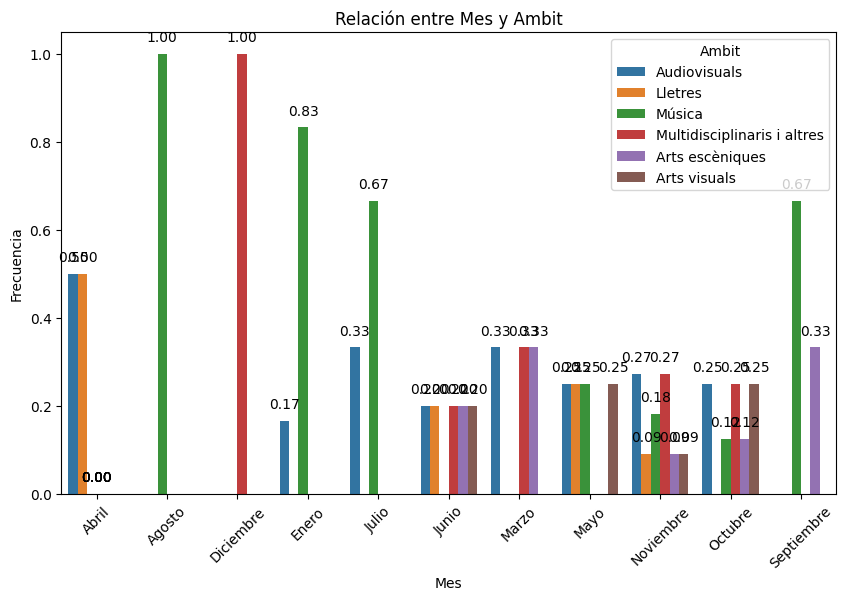

In [63]:
plot_categorical_relationship_fin(festivales_bcn_21, "Mes","Ambit", relative_freq = True, show_values= True)

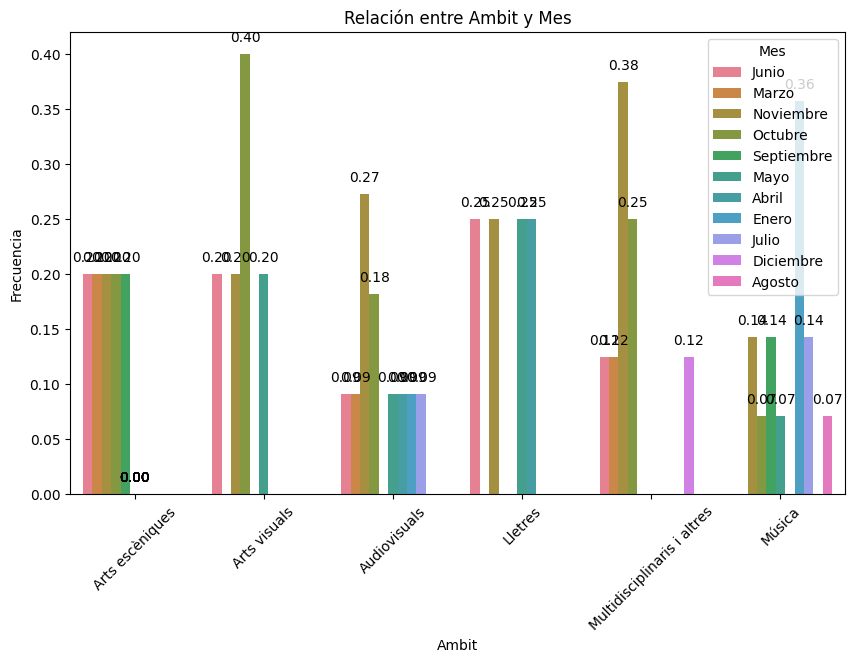

In [64]:
plot_categorical_relationship_fin(festivales_bcn_21, "Ambit","Mes", relative_freq = True, show_values= True)

Comentarios <br>
Por mes:<br>
En agosto, como en 202, solo hay música, mientras que en diciembre solo destaca lo multidisciplinar, pero esta vez son muchos más los meses con una gran variedad de festivales destacados: mayo, junio, octubre y noviembre. <br>
Por ámbito:<br>
Es el año en que más repartidos están los festivales, de todo tipo casi todo el año <br>

2022

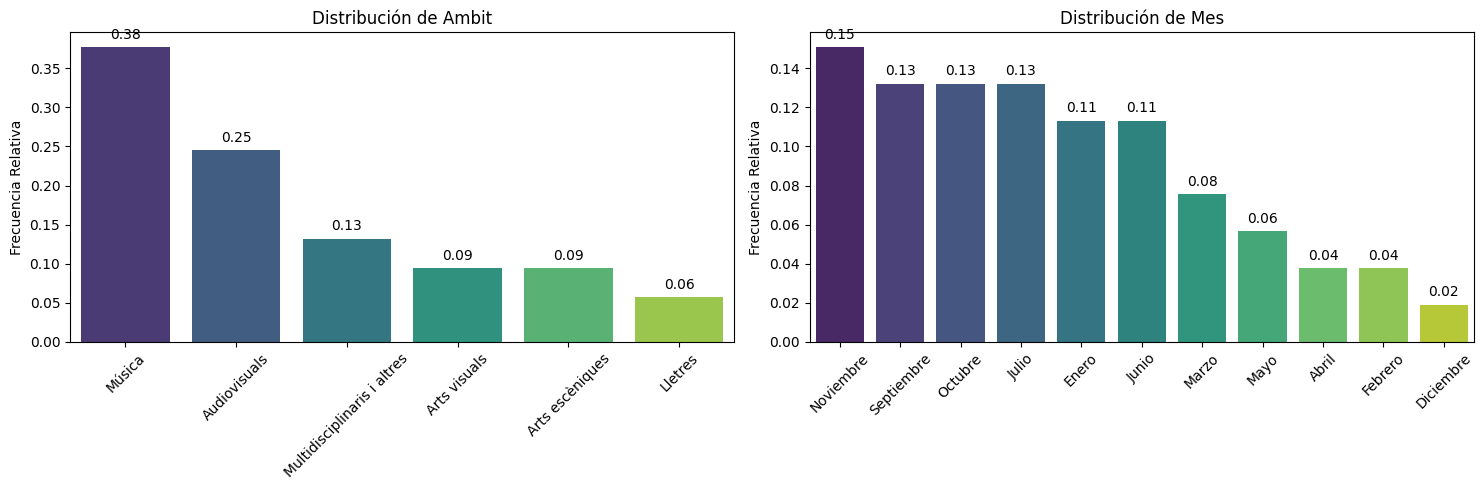

In [65]:
pinta_distribucion_categoricas(festivales_bcn_22,["Ambit","Mes"], relativa= True, mostrar_valores= True)

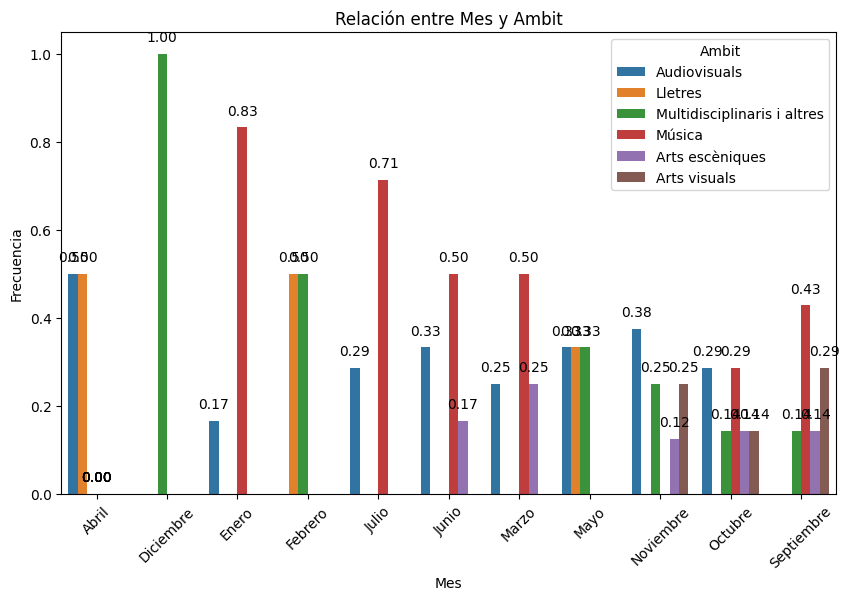

In [66]:
plot_categorical_relationship_fin(festivales_bcn_22, "Mes","Ambit", relative_freq = True, show_values= True)

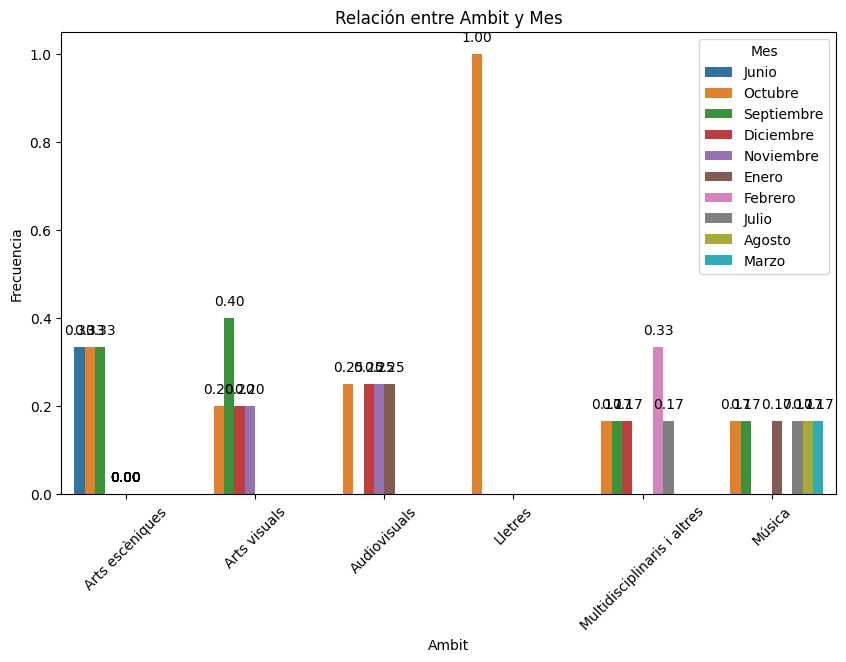

In [67]:
plot_categorical_relationship_fin(festivales_bcn_20, "Ambit","Mes", relative_freq = True, show_values= True)

Comentarios <br>
Por mes:<br>
Se mantiene la exclusividad en diciembre con lo multidisciplinar, y es al regreso del verano, en septiembre y octubre cuando vemos mayor variedad. <br>
Por ámbito:<br>
Vuelve a reinar la música repartida a lo largo de todo el año, y vuelen las letras a última posición, concentradas en 1 mes. <br>

#### Titularidad - Mes

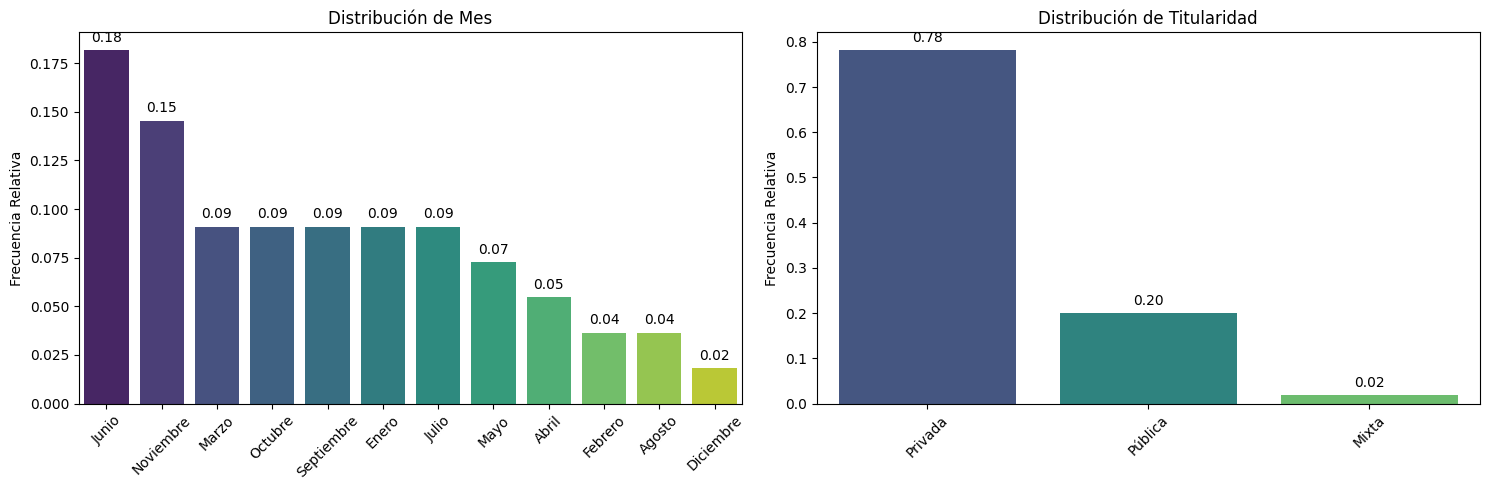

In [68]:
pinta_distribucion_categoricas(festivales_bcn_18,["Mes","Titularidad"], relativa= True, mostrar_valores= True)

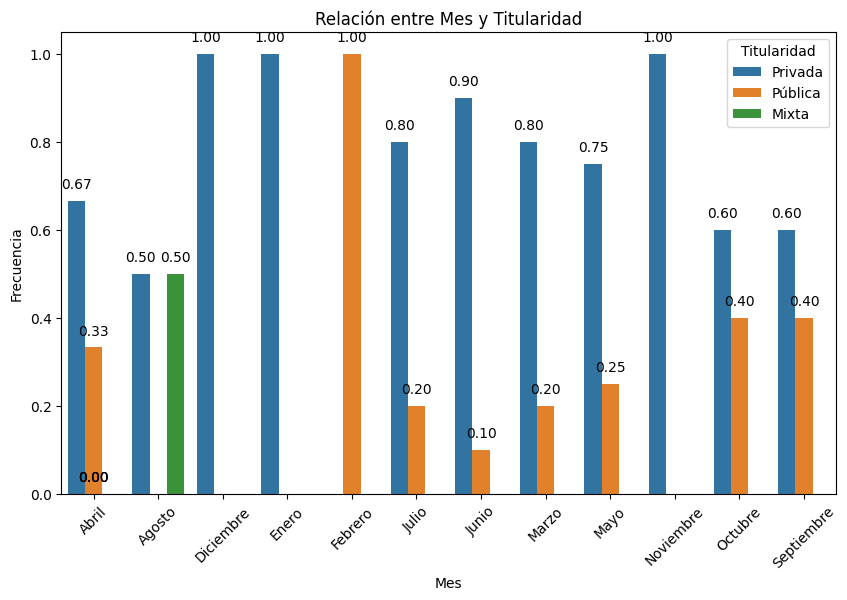

In [69]:
plot_categorical_relationship_fin(festivales_bcn_18, "Mes","Titularidad", relative_freq = True, show_values= True)

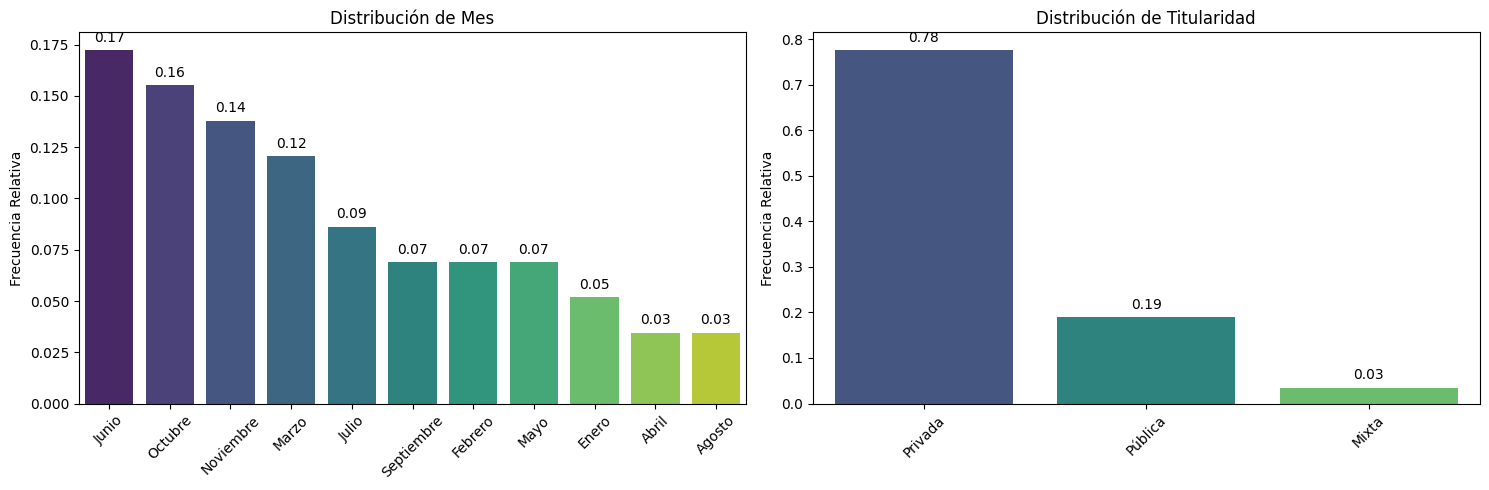

In [70]:
pinta_distribucion_categoricas(festivales_bcn_19,["Mes","Titularidad"], relativa= True, mostrar_valores= True)

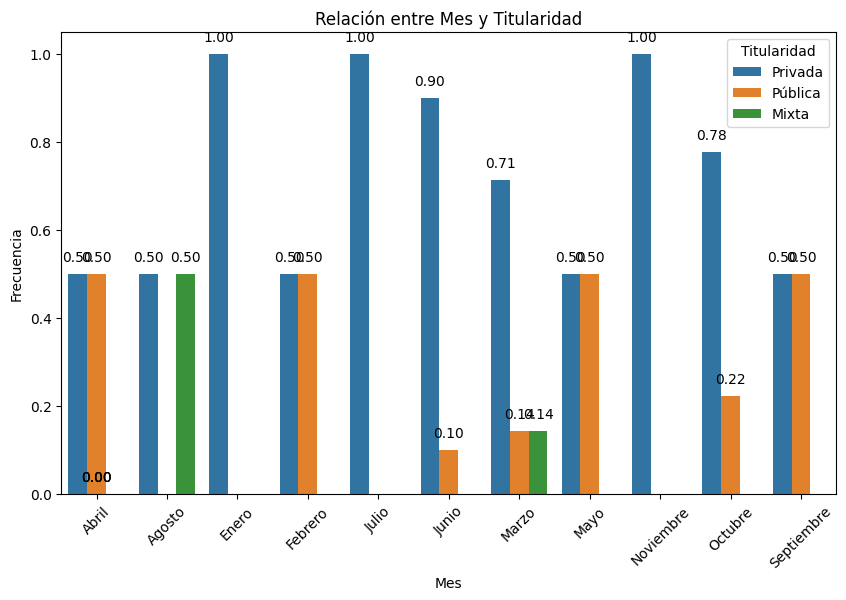

In [71]:
plot_categorical_relationship_fin(festivales_bcn_19, "Mes","Titularidad", relative_freq = True, show_values= True)

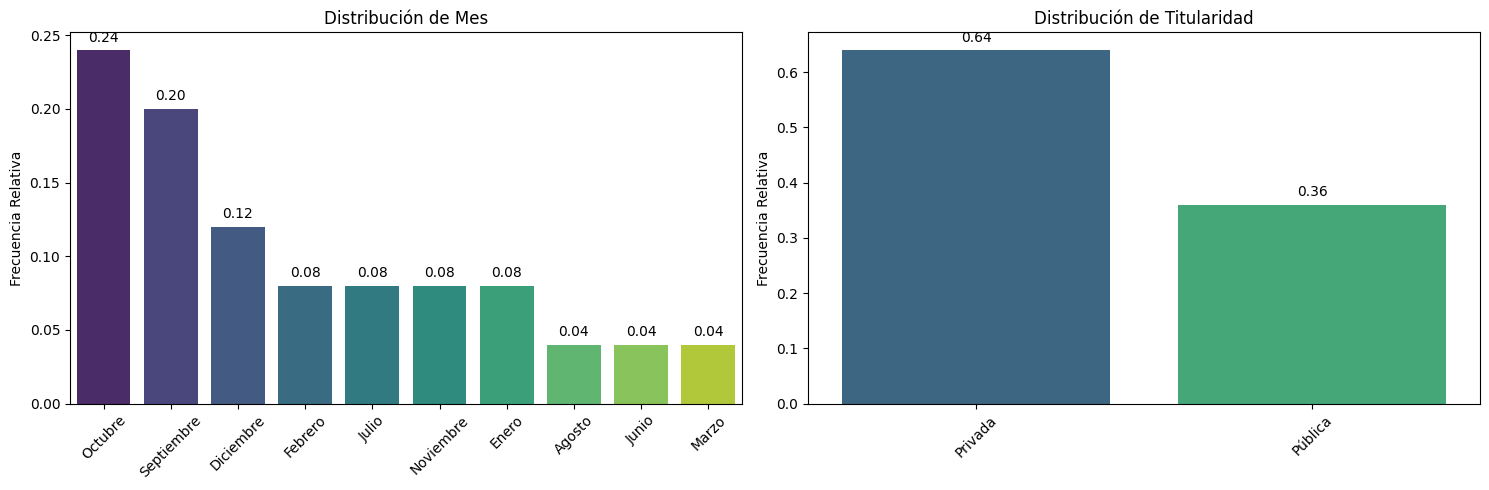

In [72]:
pinta_distribucion_categoricas(festivales_bcn_20,["Mes","Titularidad"], relativa= True, mostrar_valores= True)

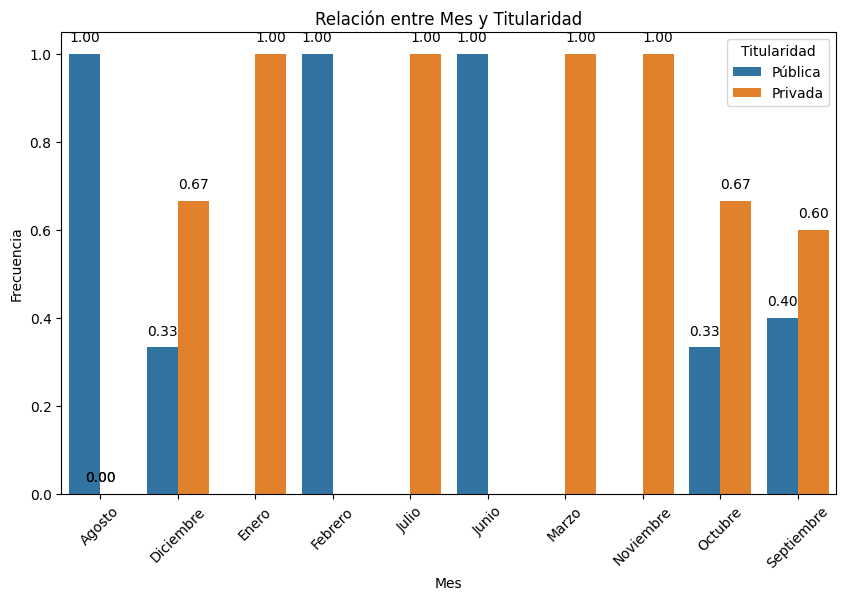

In [73]:
plot_categorical_relationship_fin(festivales_bcn_20, "Mes","Titularidad", relative_freq = True, show_values= True)

Comentarios:<br>
Si bien en losaños anteriores había un reparto a lo largo del año entre festivales públicos y privados que respondías más o menosa sus % de programación, y sobre todo a la estacionalidad de los ámbitos más destacados de cada uno, llama la atención que este año de la pandemia, el festival relevante de marzo, mes del lockdown, fuera privada. Luego no hay nada hasta junio, con iniciativas 100% públicas, que al mes siguiente dan paso a otras 100% privadas, y agosto vuelve a ser 100% pública. Una vez que se va normalizando la situación, septiembre y octubre tienen propestas de ambas titularidades, pero la dominancia de fetsivales privados ya se establece y continñua hasta fin de año.

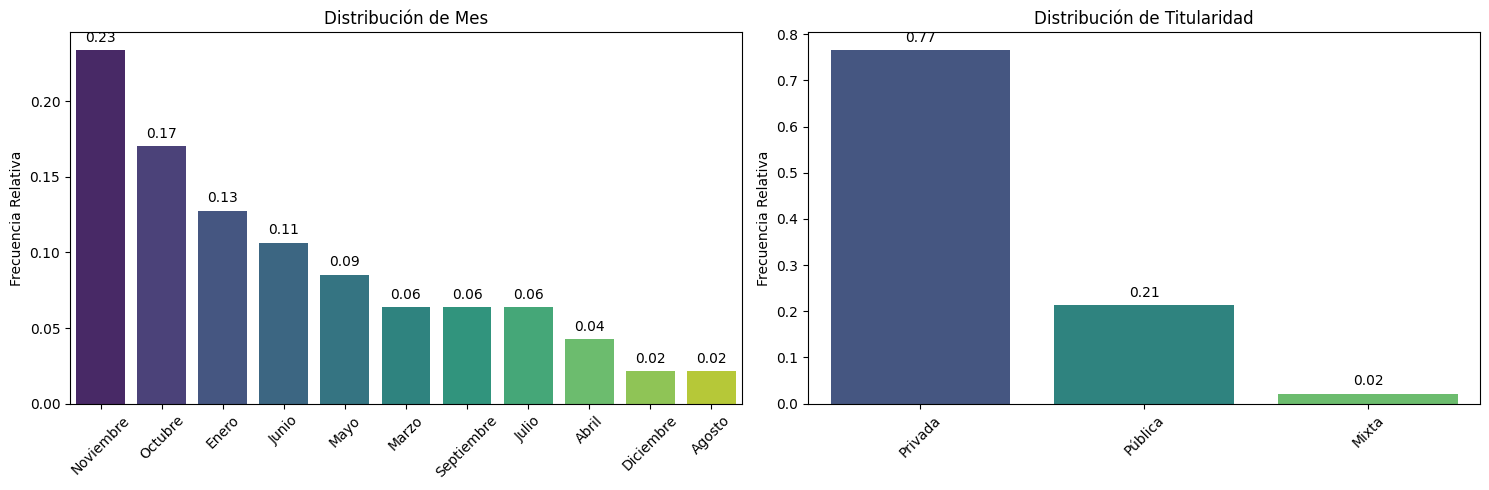

In [74]:
pinta_distribucion_categoricas(festivales_bcn_21,["Mes","Titularidad"], relativa= True, mostrar_valores= True)

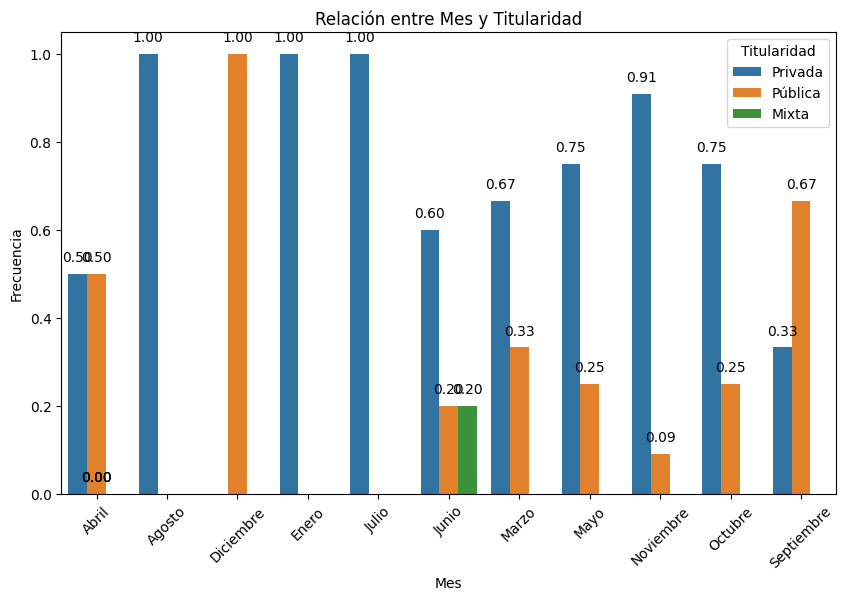

In [75]:
plot_categorical_relationship_fin(festivales_bcn_21, "Mes","Titularidad", relative_freq = True, show_values= True)

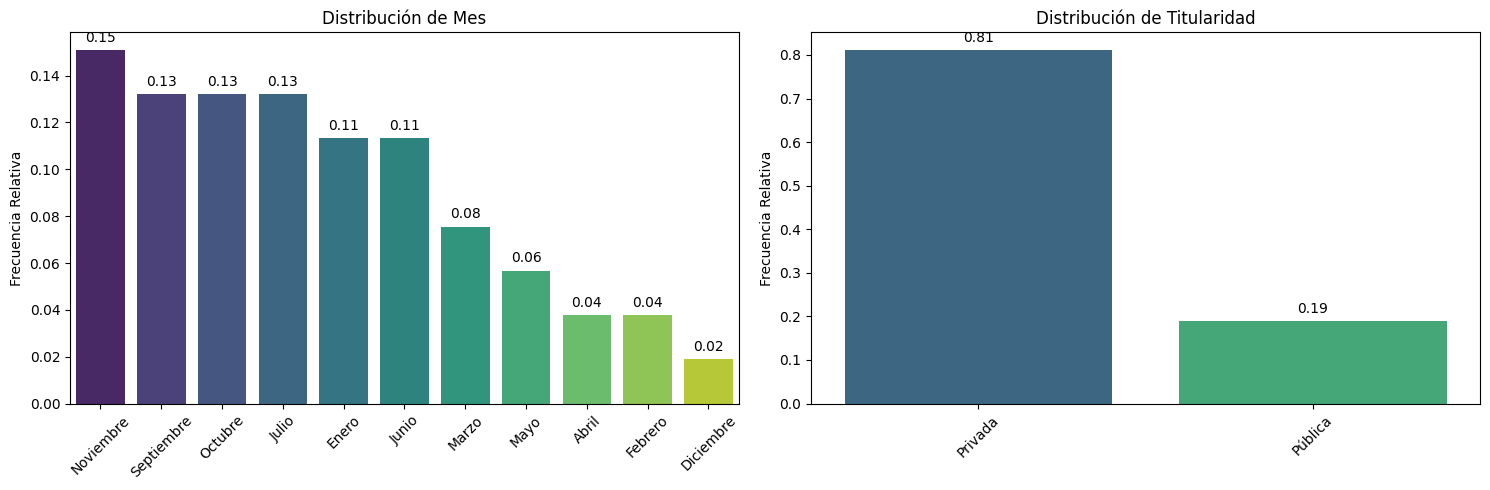

In [76]:
pinta_distribucion_categoricas(festivales_bcn_22,["Mes","Titularidad"], relativa= True, mostrar_valores= True)

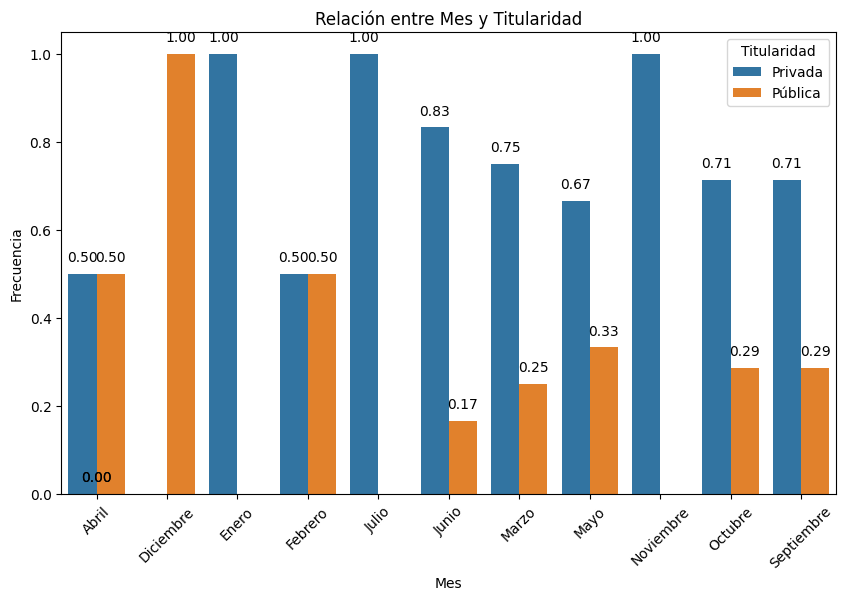

In [77]:
plot_categorical_relationship_fin(festivales_bcn_22, "Mes","Titularidad", relative_freq = True, show_values= True)

#### Entrada - Ámbito

2013

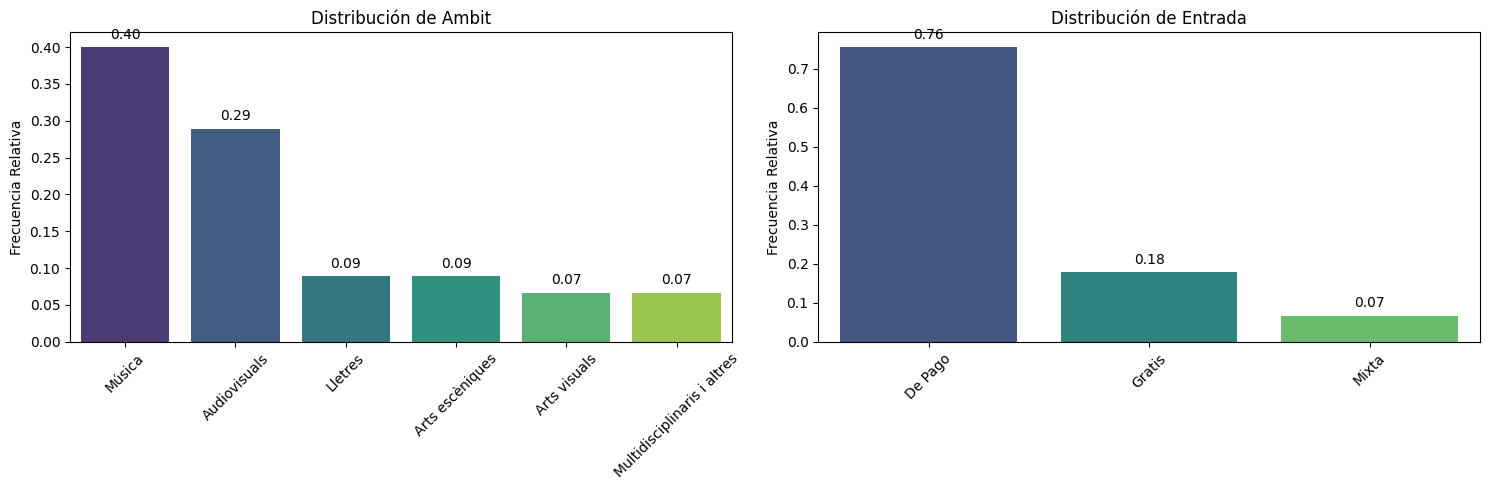

In [78]:
pinta_distribucion_categoricas(festivales_bcn_13,["Ambit","Entrada"], relativa= True, mostrar_valores= True)

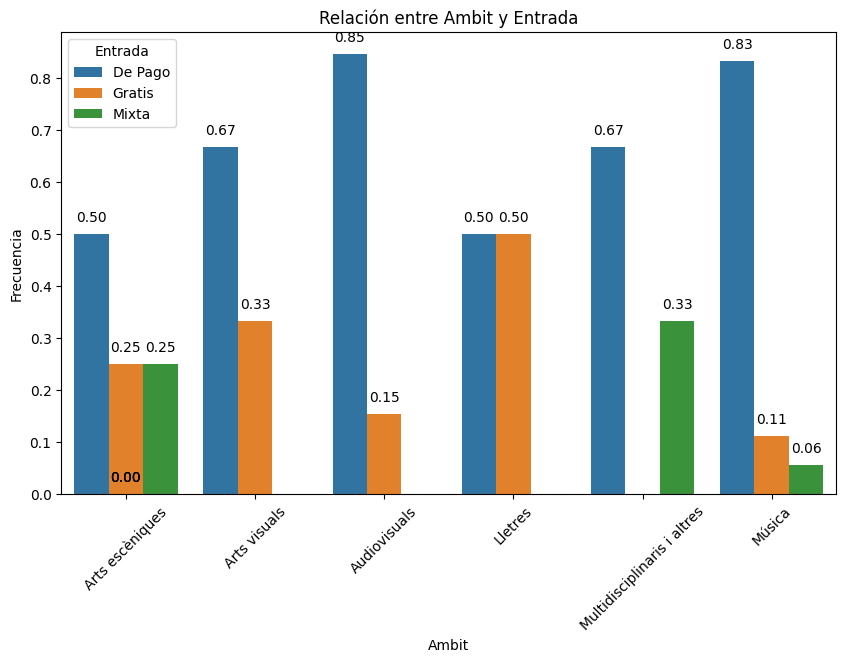

In [79]:
plot_categorical_relationship_fin(festivales_bcn_13, "Ambit","Entrada", relative_freq = True, show_values= True)

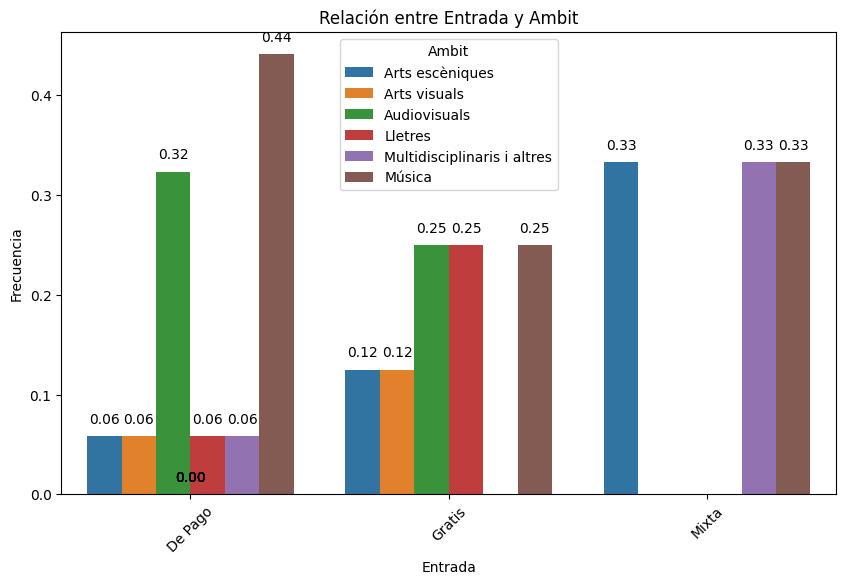

In [80]:
plot_categorical_relationship_fin(festivales_bcn_13, "Entrada","Ambit", relative_freq = True, show_values= True)

Comentarios:<br>
Si bien ka mayoría de los festivales son de pago, la proporción cambia mucho según el ámbito. Así, en las letras hay mayor equilibrio entre gratis y de pago, mientras que música y audiovisuales son 83% de pago, ligeramente más acentuado que la proporción general de 75% de pago, 18% gratos (7% mixto). Teniendo en cuenta que son los 2 ámbitos donde hay más iniciativas privadas y menos públicas, era lo esperable. De hecho, casi que es llamativa la proporción de festivales gratuitos vs de pago que hay tanto en artes escénicas como visuales.<br>
Por otra parte, la mayor parte de los festivales de pago son de música y audiovisuales, mientras que encotramos opciones gratuitas en casi todos los ámbitos.

2014

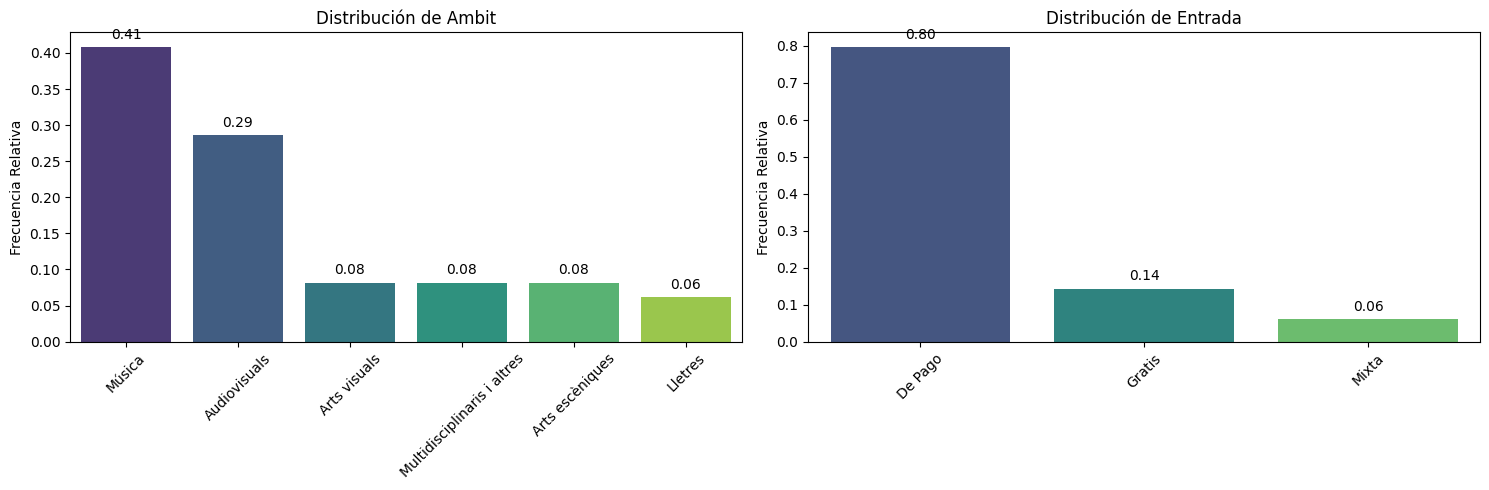

In [81]:
pinta_distribucion_categoricas(festivales_bcn_14,["Ambit","Entrada"], relativa= True, mostrar_valores= True)

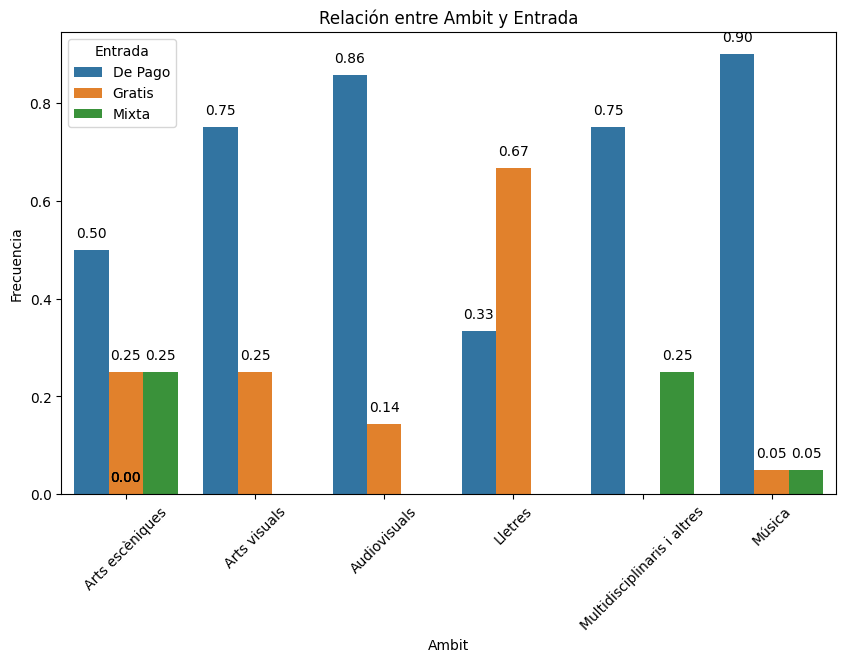

In [82]:
plot_categorical_relationship_fin(festivales_bcn_14, "Ambit", "Entrada", relative_freq = True, show_values= True)

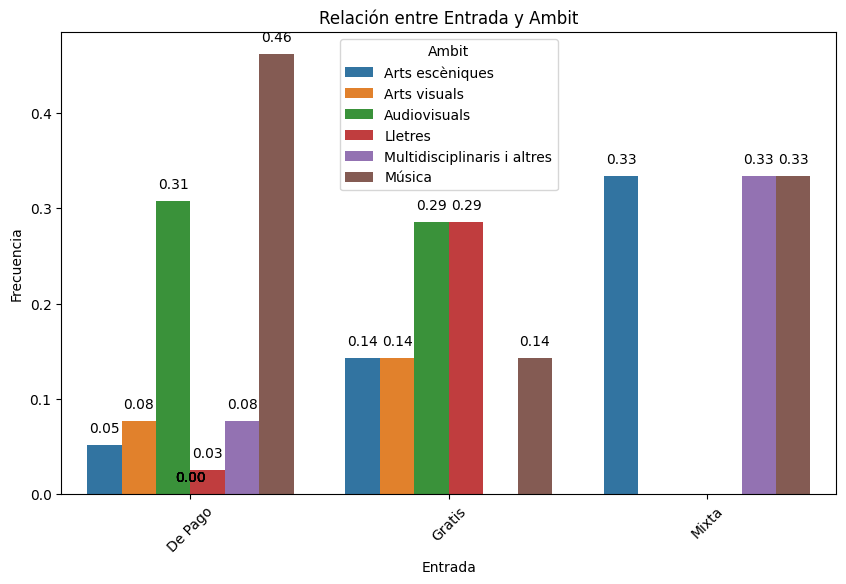

In [83]:
plot_categorical_relationship_fin(festivales_bcn_14, "Entrada","Ambit", relative_freq = True, show_values= True)

Comentarios: <br>
En 2014 aumenta la proporción de festivales de pago, lo que se refleja en la música, donde el 80% requieren pago de una entrada, y en artes visuales, donde laproporcion de pago sube hasta 75%. Porel contrario, aumentan ligeramente las propuestas gratuitas del ámbito de las letras. Como el año anterior, en escénicas encontramos un mayor abanico de propuestas, con festivales en su mayoría (50%) de pago, un 25% gratis y otro 25% con formato mñas flexible que incluyen un mix de espectáculos gratuitos y de pago.<br>
Por otra parte, la mayor parte de los festivales de pago son de música y audiovisuales, mientras que encotramos opciones gratuitas en casi todos los ámbitos, casi igual que en 2013.
Por primera vez hay un ámbito con predominancia de gratis, en el ámbito de las letras

2015

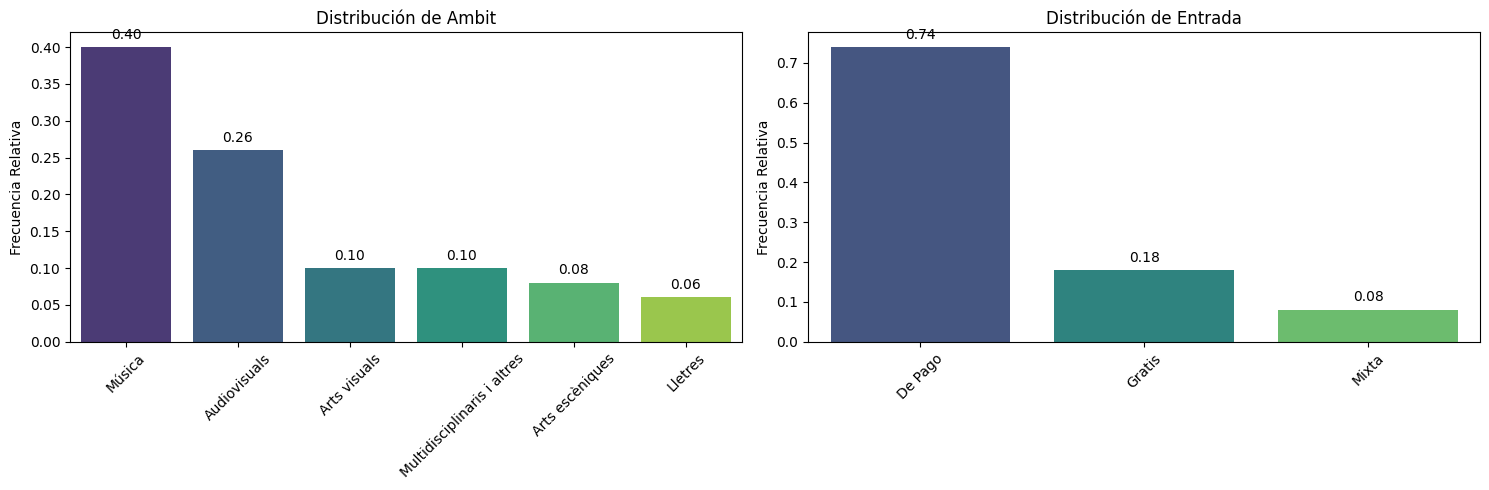

In [84]:
pinta_distribucion_categoricas(festivales_bcn_15,["Ambit","Entrada"], relativa= True, mostrar_valores= True)

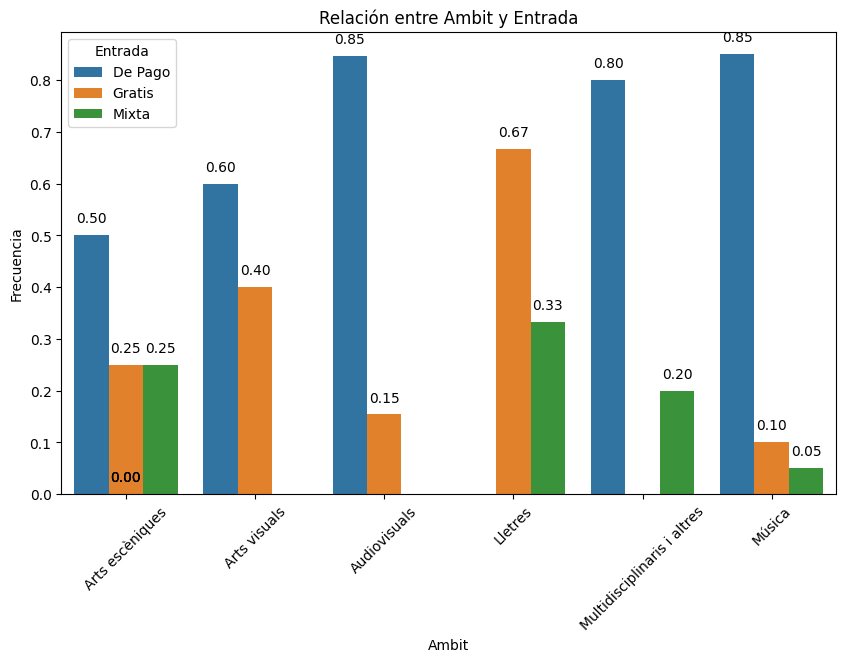

In [85]:
plot_categorical_relationship_fin(festivales_bcn_15, "Ambit","Entrada", relative_freq = True, show_values= True)

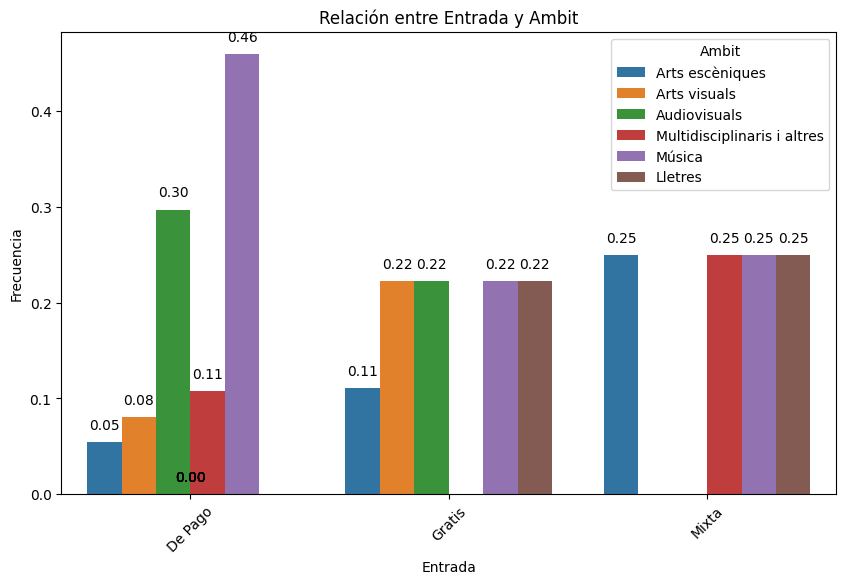

In [86]:
plot_categorical_relationship_fin(festivales_bcn_15, "Entrada","Ambit", relative_freq = True, show_values= True)

Comentarios:<br>
Aunque en 2015 la proporción de festivales de pago cae ligeramente, el reparto por ámbito es Muy similar a lo visto anteriormente, lo que se refleja en la música, donde más del 85% de los festivales son de pago, igual en los audiovisuales.<br>
Por otra parte, la mayor parte de los festivales de pago son de música y audiovisuales, mientras que encotramos opciones gratuitas en casi todos los ámbitos, menosmultidisciplinar, y hay propyestas mixtas en varios ámbitos, excepto visuales y audiovisuales.

2016

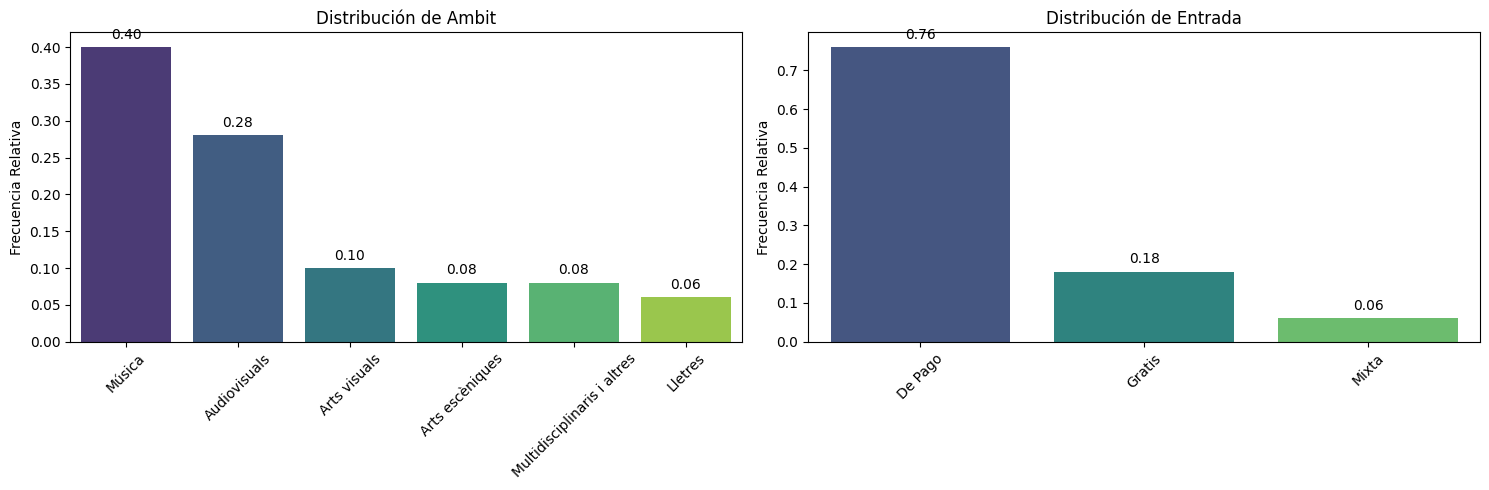

In [87]:
pinta_distribucion_categoricas(festivales_bcn_16,["Ambit","Entrada"], relativa= True, mostrar_valores= True)

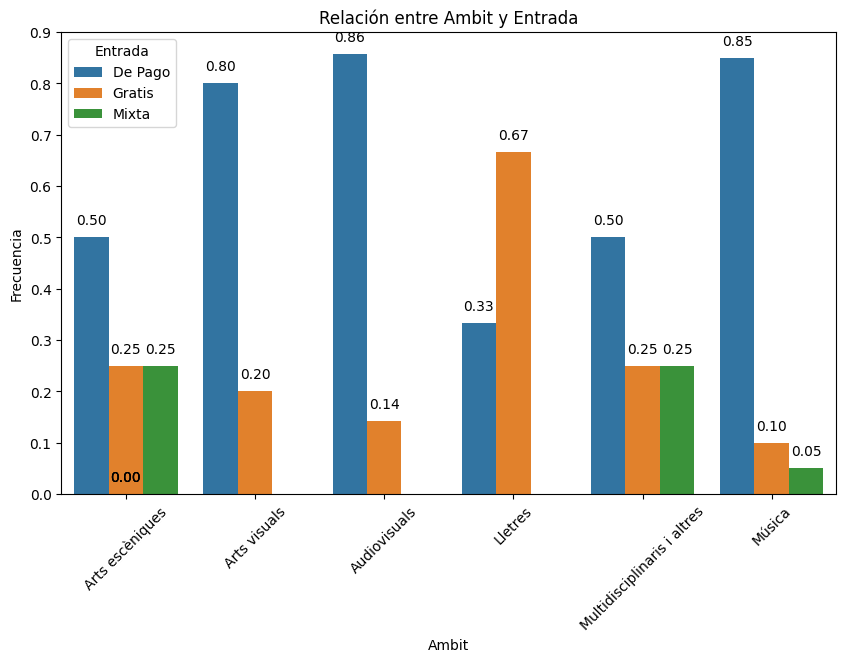

In [88]:
plot_categorical_relationship_fin(festivales_bcn_16, "Ambit","Entrada", relative_freq = True, show_values= True)

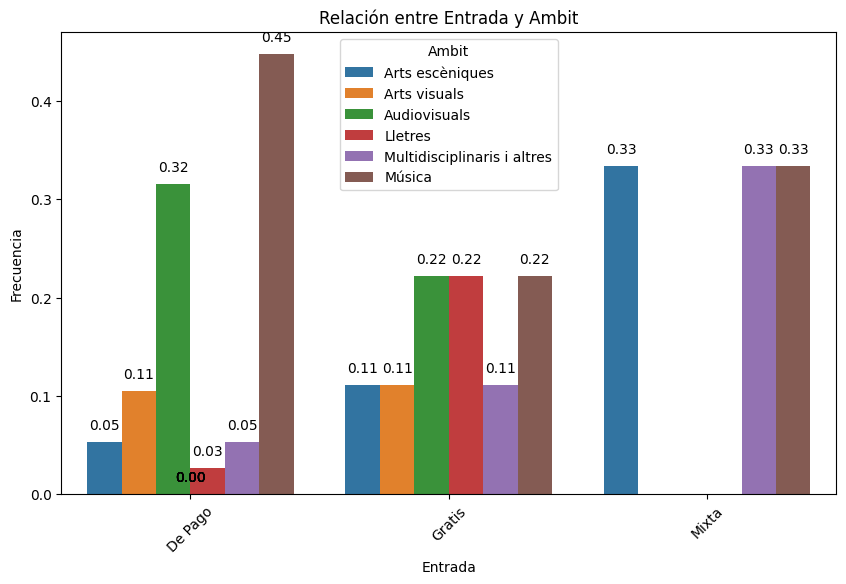

In [89]:
plot_categorical_relationship_fin(festivales_bcn_16, "Entrada","Ambit", relative_freq = True, show_values= True)

Comentarios:<br>
2016 es muy similar a los años anteriores, solo que con más propuestas de artes visuales de pago, y no porque el añmbito haya crecido relativamente, sino que ha cambiado la proporción de los mismos.

2017

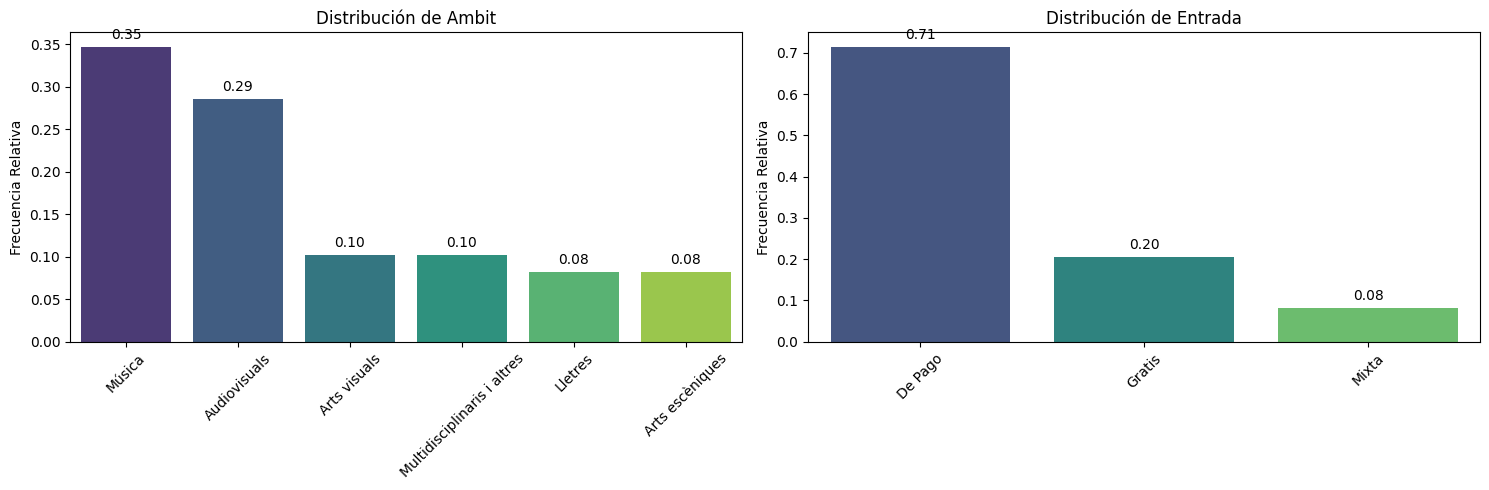

In [90]:
pinta_distribucion_categoricas(festivales_bcn_17,["Ambit","Entrada"], relativa= True, mostrar_valores= True)

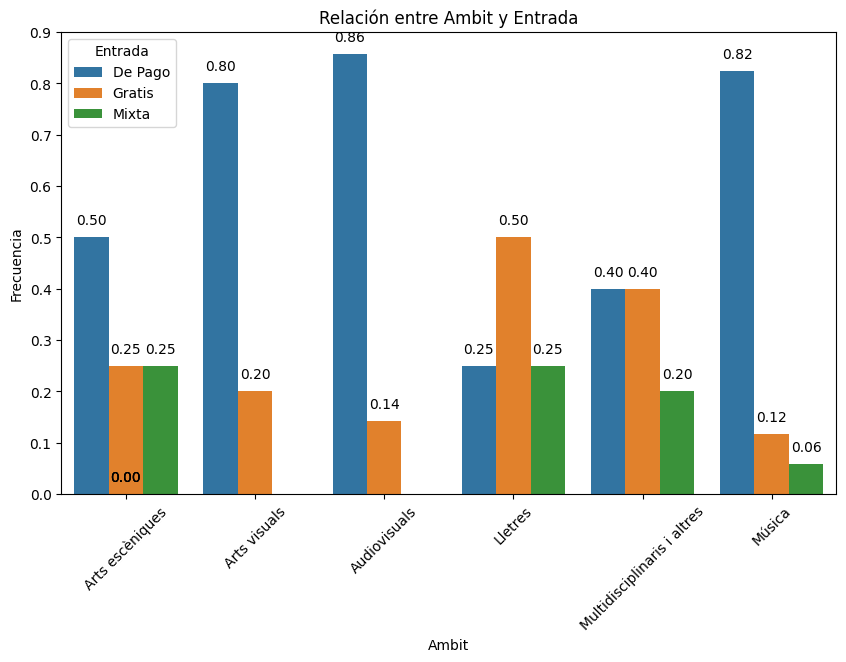

In [91]:
plot_categorical_relationship_fin(festivales_bcn_17, "Ambit","Entrada", relative_freq = True, show_values= True)

Comentarios: <br>
Este año baja un poco la proporción de festivales de música así como de festivales de pago, dos variables que parecen estar relacionadas. Sin embargo, visuales, audiovisuales y mñusica siguen siendo terrenos de 80% o más de entradas de pago. Por el contrario, en escénucas, letras y multidisciplinares se van acercando las poporciones de odelos de fetsivales de pago,gratuitos y de formato mixto, aunque con proporciones ligeramente diferentes.
Esta vez, además de predominar los gratis en el ámbito de las letras, hay partes iguales pública y privada en lo multidisciplinar.

2018

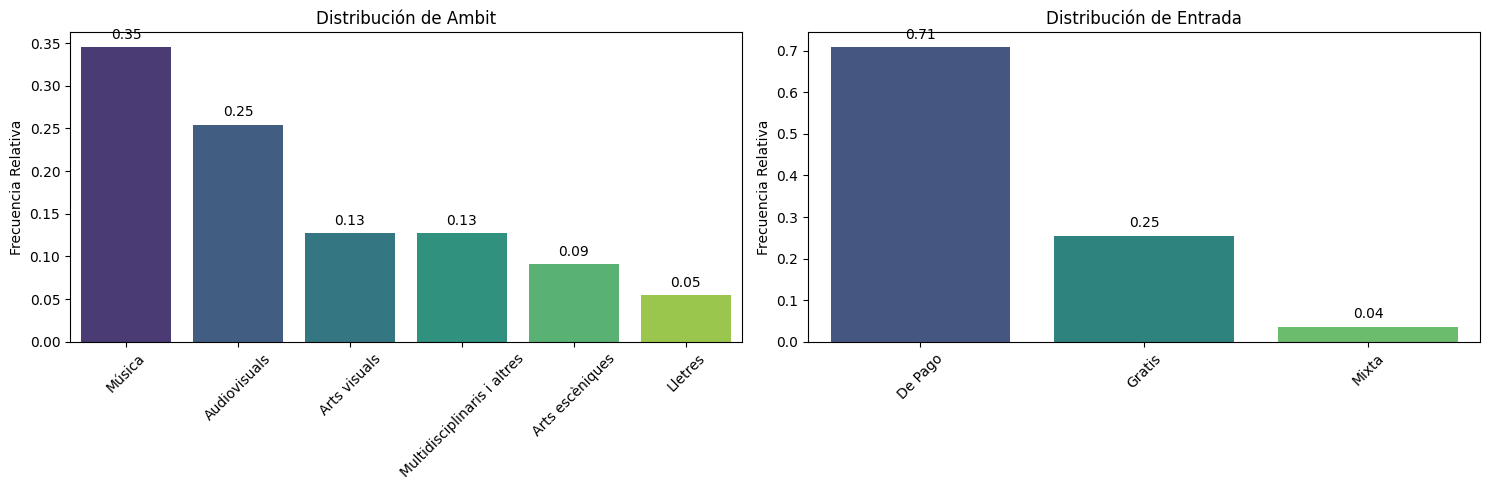

In [92]:
pinta_distribucion_categoricas(festivales_bcn_18,["Ambit","Entrada"], relativa= True, mostrar_valores= True)

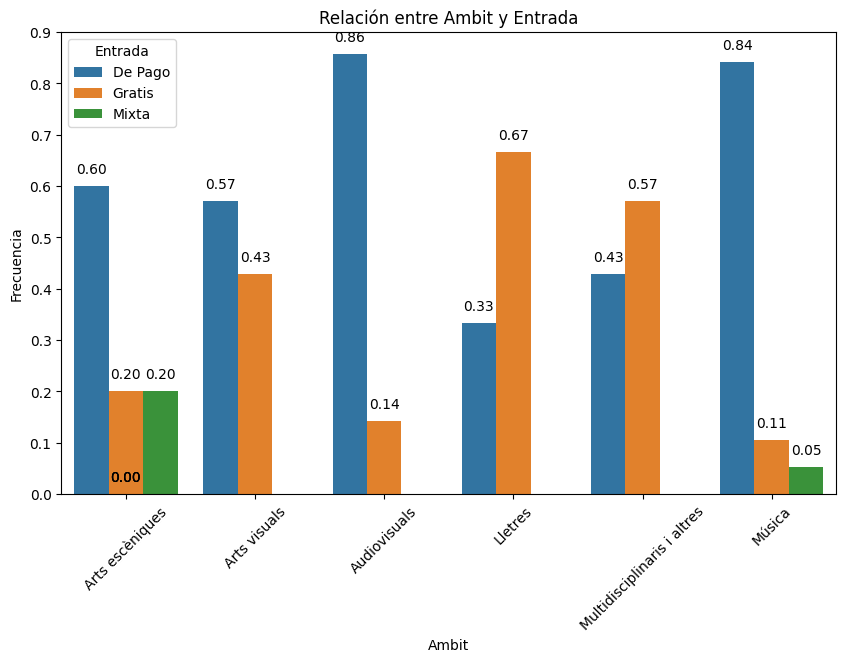

In [93]:
plot_categorical_relationship_fin(festivales_bcn_18, "Ambit","Entrada", relative_freq = True, show_values= True)

Comentarios:<br>
En el 2018 la distribución es similar al año anterior, a pesar de que por primera vez la proporción de festivales gratuitos alcanza el 25% del total, pero, tanto en música como en audiovisuales, sigue habiendo uno 8% de festivales de pago. <be>
Por primera vez predomina lo gratis en 2 ámbitos, las letras y lo multidisciplinar.

2019

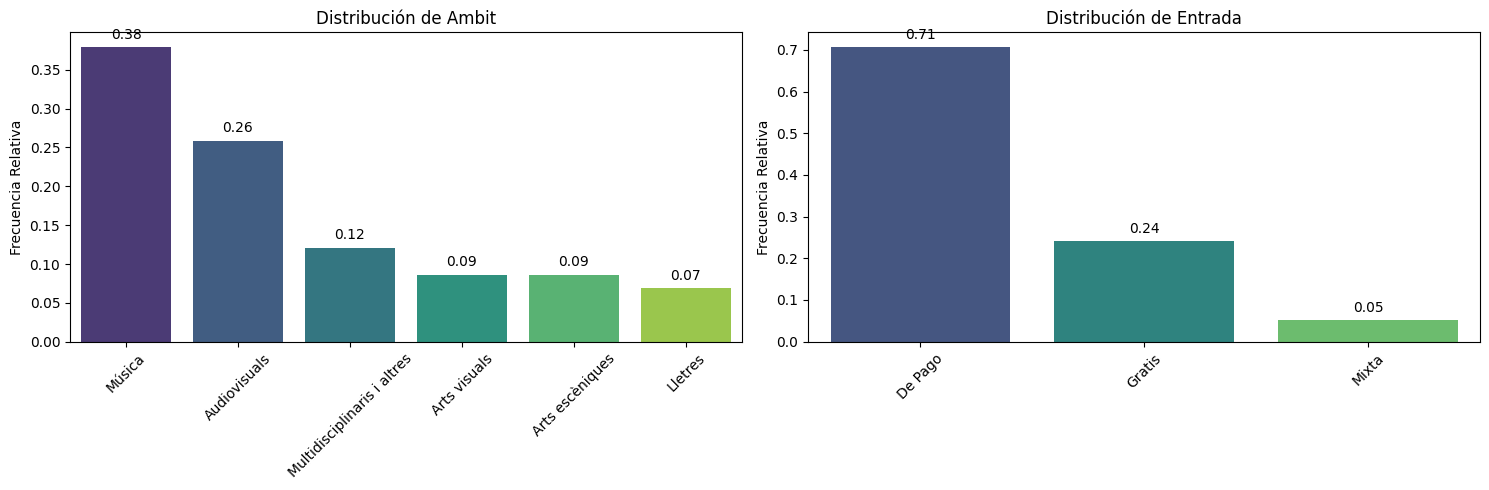

In [94]:
pinta_distribucion_categoricas(festivales_bcn_19,["Ambit","Entrada"], relativa= True, mostrar_valores= True)

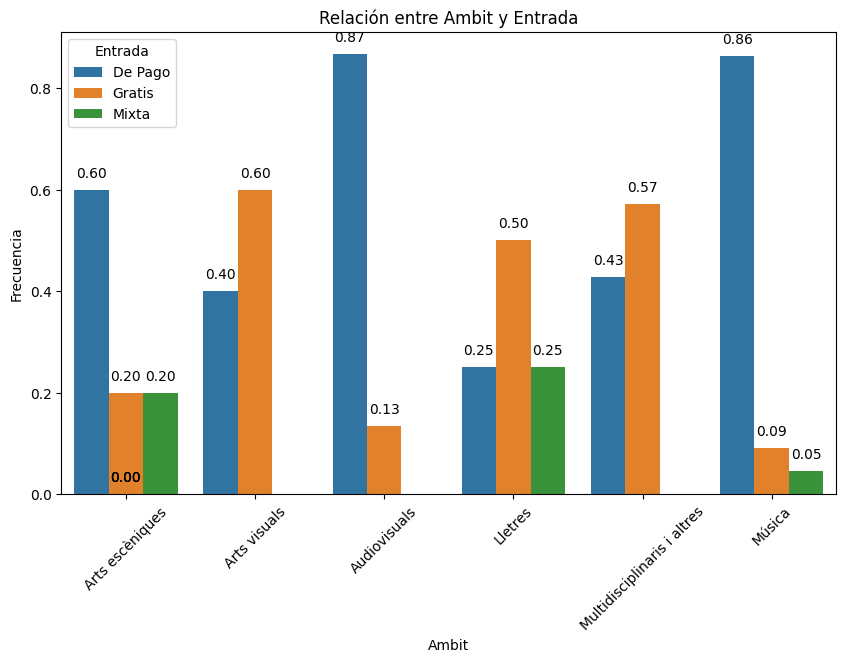

In [95]:
plot_categorical_relationship_fin(festivales_bcn_19, "Ambit","Entrada", relative_freq = True, show_values= True)

Comentarios:<br>
Por primera vez predomina lo gratis en 3 ámbitos, no solo las letras y lo multidisciplinar, sino también en las artes visuales.<br>
LO demás es muy similar al año anterior.

2020:

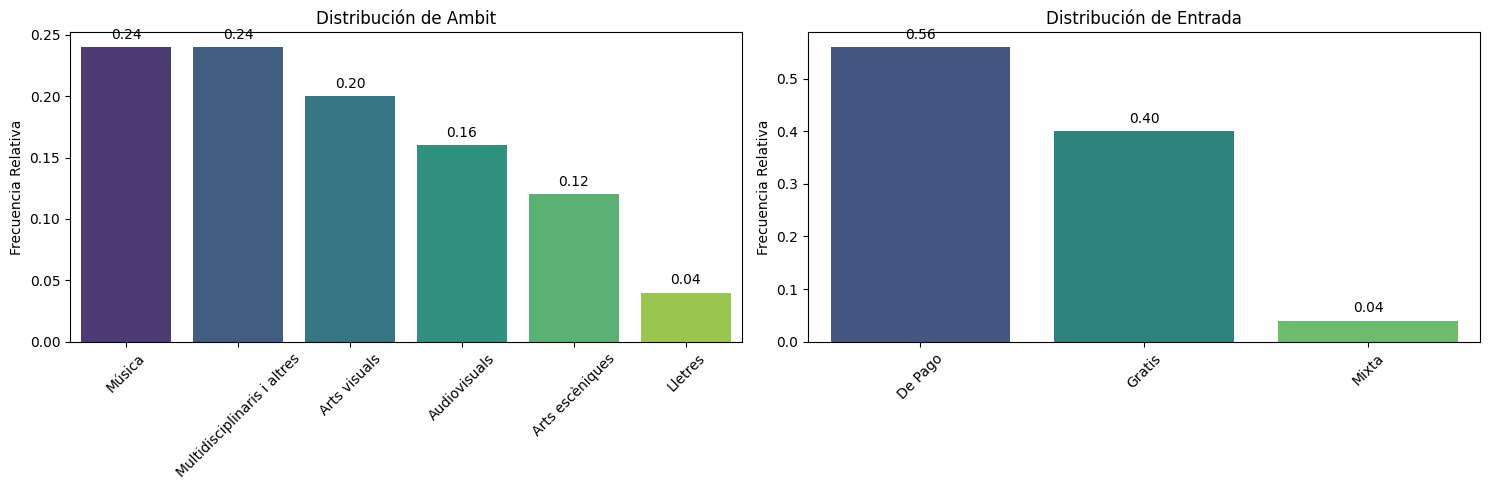

In [96]:
pinta_distribucion_categoricas(festivales_bcn_20,["Ambit","Entrada"], relativa= True, mostrar_valores= True)

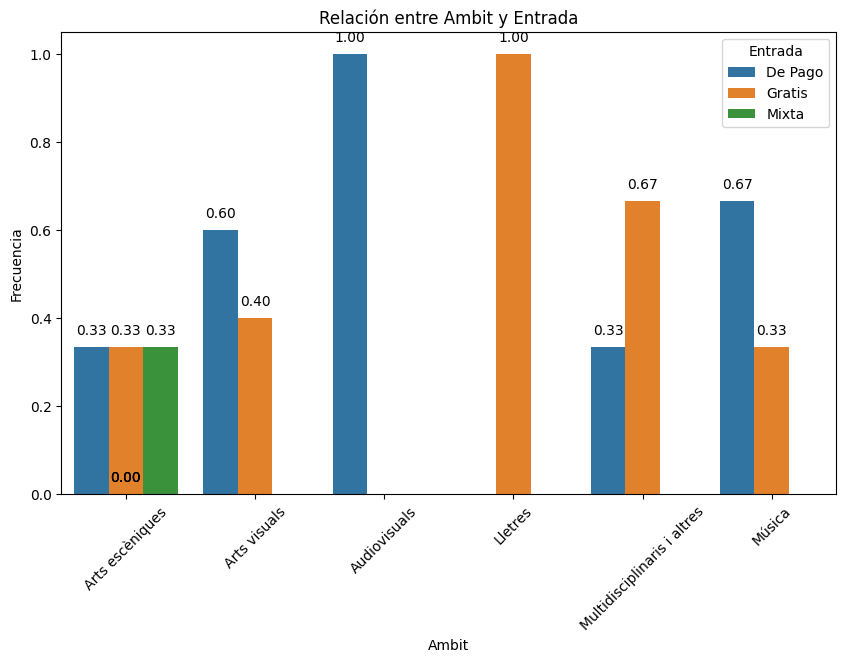

In [97]:
plot_categorical_relationship_fin(festivales_bcn_20, "Ambit","Entrada", relative_freq = True, show_values= True)

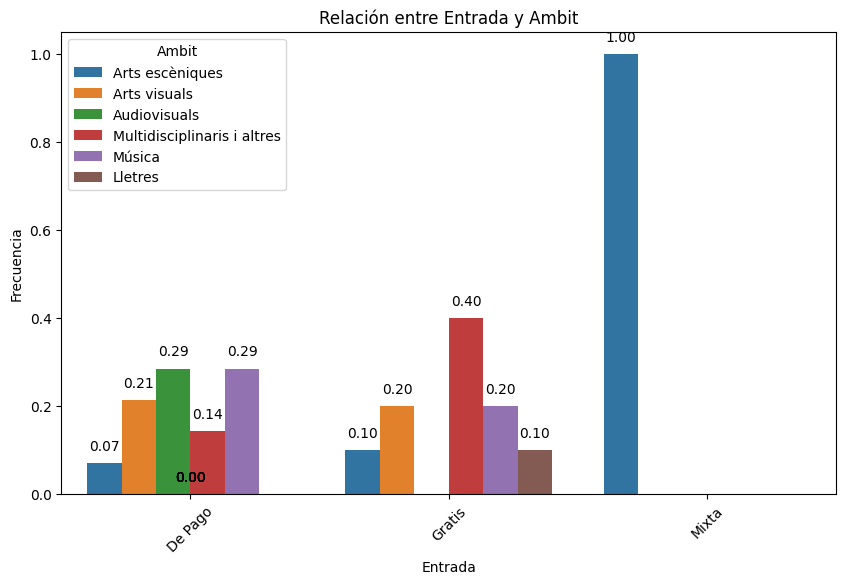

In [98]:
plot_categorical_relationship_fin(festivales_bcn_20, "Entrada","Ambit", relative_freq = True, show_values= True)

Comentarios:<br>
Es el primer y único año en que cambian las proporciones, y lo gratuito alcanza el 40%, casi el doble de lo visto hasta ahora, igual que la música, que apenas ocupa el 24% de la programación, con lo que queda a la par de los multidisciplinares, y solo muy poco por delante de las artes visuales. Los audiovisuales, segundos históricamente, quedan en 4ta posición, pero a poca distancia de los 3 primeros. <br>
Es interesante que este año los festivales de audiovisuales son solo de inicativa privada, que el formato escénico es el único que explora una modalidad mixta con unos espectáculos de pago y otros gratuitos y que el abanico de festivales de pago es variado entre los diferentes ámbitos. 

2021

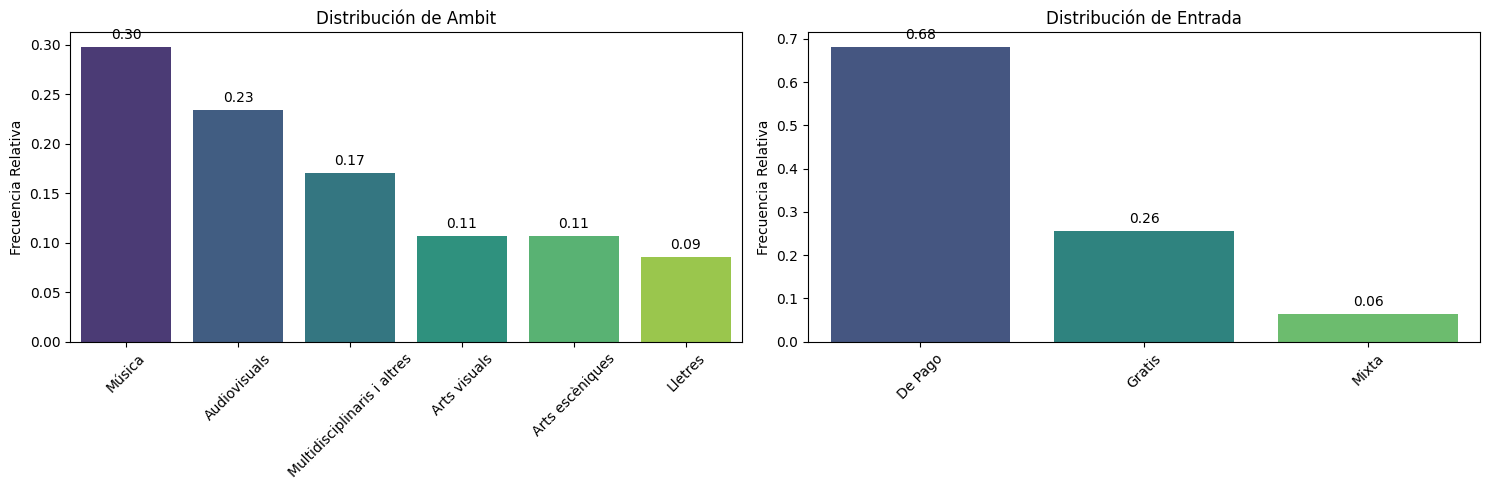

In [99]:
pinta_distribucion_categoricas(festivales_bcn_21,["Ambit","Entrada"], relativa= True, mostrar_valores= True)

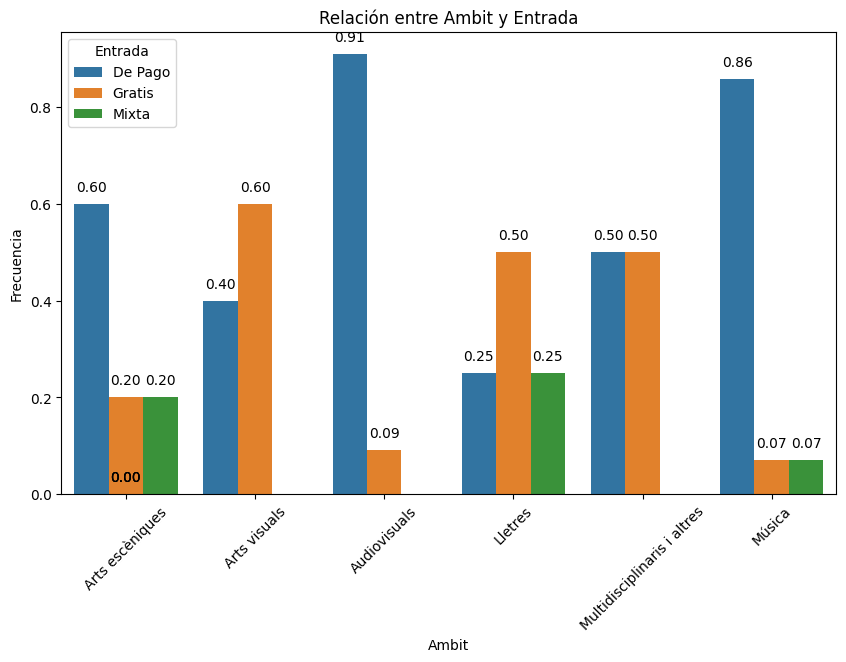

In [100]:
plot_categorical_relationship_fin(festivales_bcn_21, "Ambit","Entrada", relative_freq = True, show_values= True)

Comentarios:<br>
En el 2021, año de la recuperación, ya vemos un patrón similar al visto anteriormente, se vuelve a disparar la oferta de festivales de pago impulsados por el sector privado (casi el 70%), la música vuelve a un claro primer lugar, aunque solo en el 30%, con los audiovisuales en segundo lugar, y en general se va pareciendo más a la distribución vista antes de la pandemia.

2022

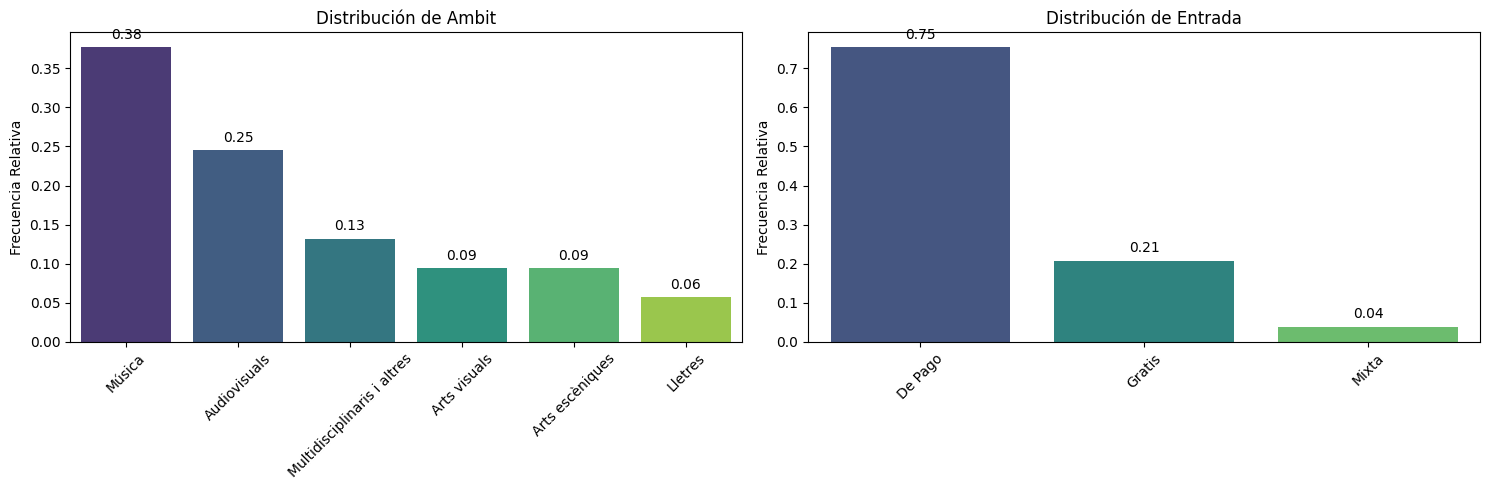

In [101]:
pinta_distribucion_categoricas(festivales_bcn_22,["Ambit","Entrada"], relativa= True, mostrar_valores= True)

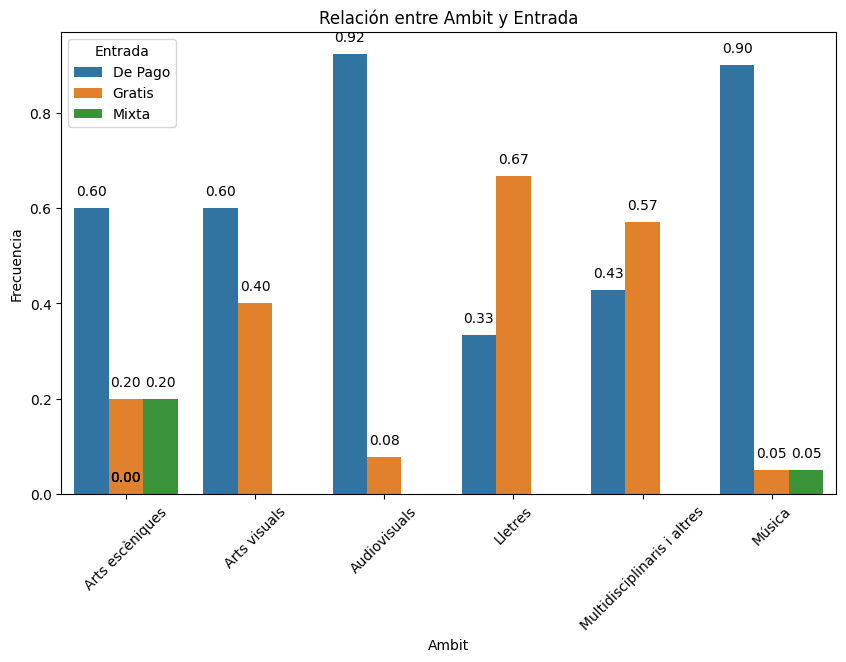

In [102]:
plot_categorical_relationship_fin(festivales_bcn_22, "Ambit","Entrada", relative_freq = True, show_values= True)

Comentarios:<br>
Y todo ello no hace sino acrecentarse en el 2022, donde suben de la mano los festivales de pago al 75% y los festivales de música a casi el 40%. No solo eso sino que por primera vez, tanto en la mñusica como en los audiovisuales, los fetsivales de pago alcanzan y superan la barrera del 90%

### Categórica y Numérica

#### Ámbito - Ediciones

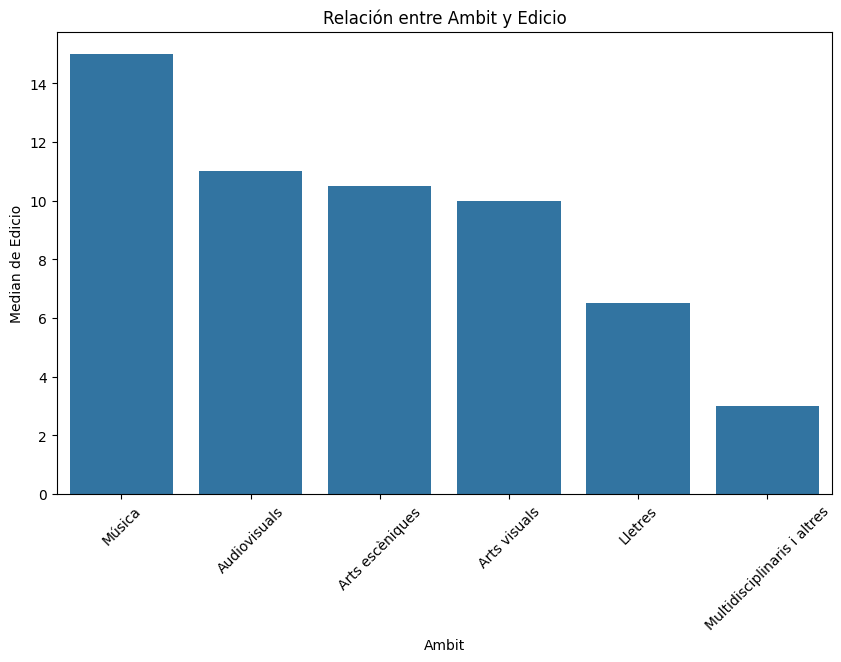

In [103]:
plot_categorical_numerical_relationship(festivales_bcn_13,"Ambit","Edicio", measure = "median")

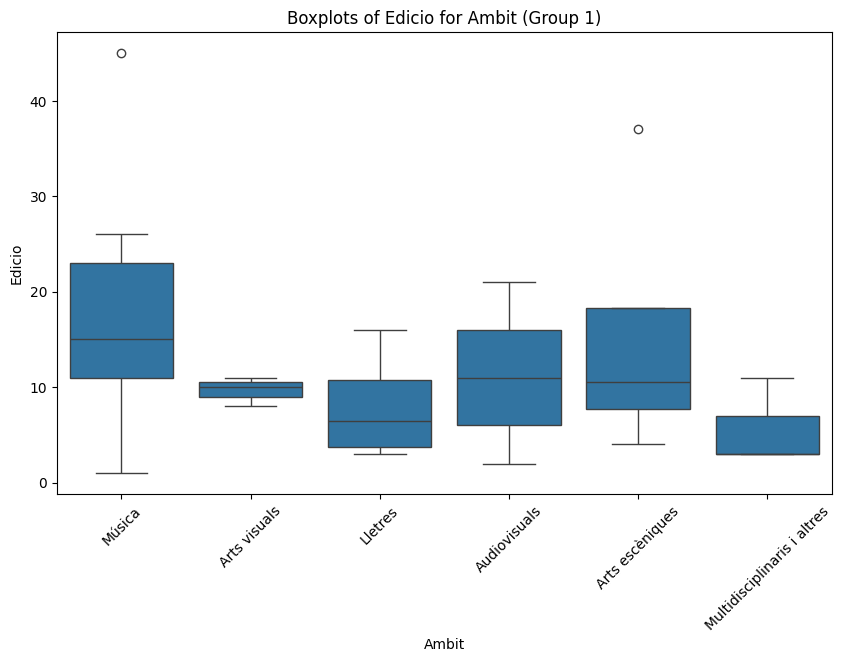

In [104]:
plot_grouped_boxplots(festivales_bcn_13,"Ambit","Edicio")

Al inicio de la muestra los festivales de música son claramente los que tienen mayor trayectoria / ediciones a cuestas. También hay una mayor dispersión, con ciertos outliers llamativos.

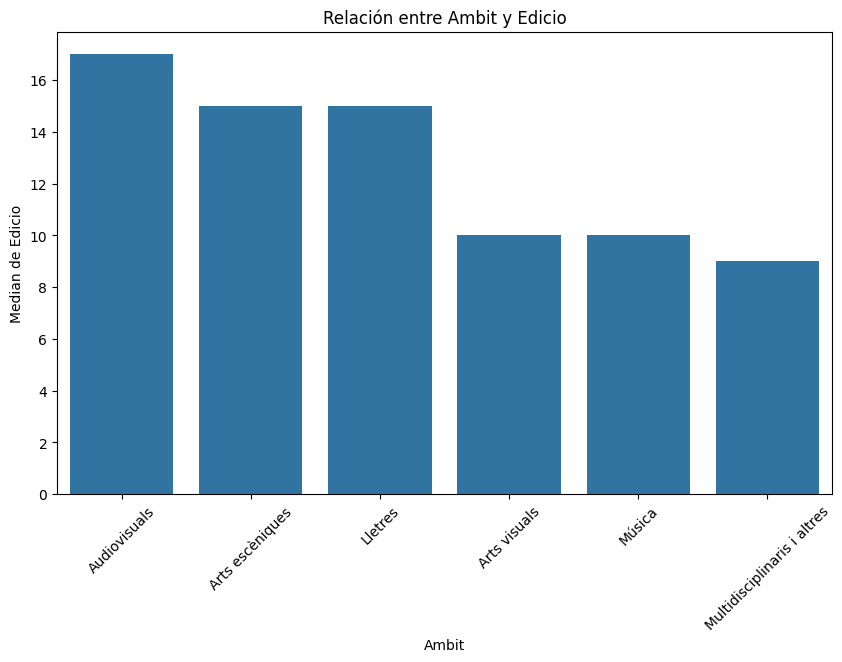

In [105]:
plot_categorical_numerical_relationship(festivales_bcn_19,"Ambit","Edicio", measure = "median")

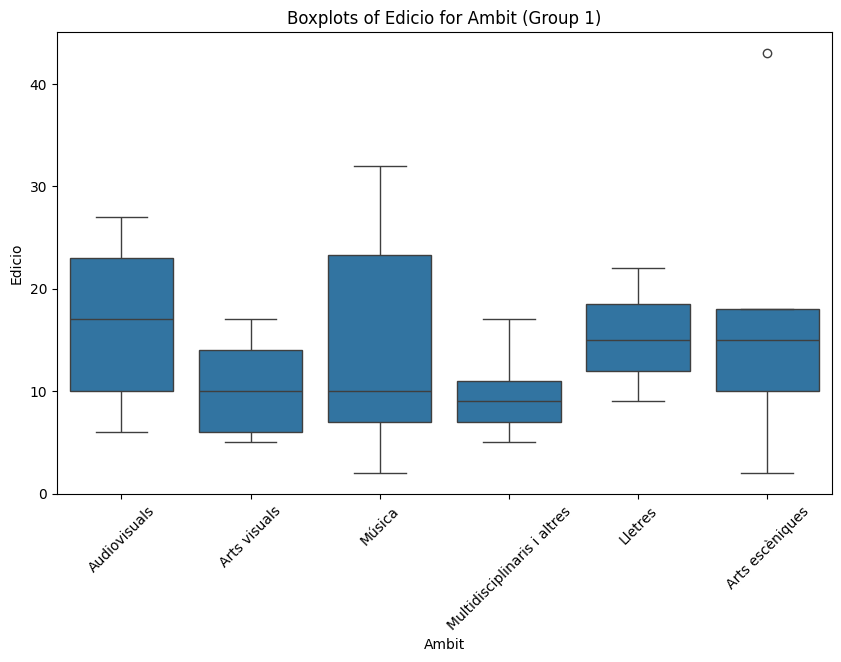

In [106]:
plot_grouped_boxplots(festivales_bcn_19,"Ambit","Edicio")

Comentario:<br>
Radicamete diferente es el panorama en 2019, cuando la mediana de ediciones de música ha caido a penúltimo lugar. De todos modos, esto puede deberse a que en los últimos años hayan surgido nuevis fetsivales que hayan bajado la mediana... Audiovisuales y escñenicas sí que parecen haber ido continuando de forma estable, a poca distancia una de otra y ahora en las primeras posiciones.<br>
En el gráfico de boxplots de 2019 se ve una media muy similar en visuales, música y multidsciplinares, y lo mismo enre letras y ecsénicas, ya un poco mñas altas, y aún más alta en el caso de audiovisuales. <br>
En este caso, además, el outlier de música ha desaparecido (volverá más adelante) pero se mantiene el de escénicas. Y en música el rango es notablemente mayor que en los demás ámbitos, lo de muestra mñas dispersión

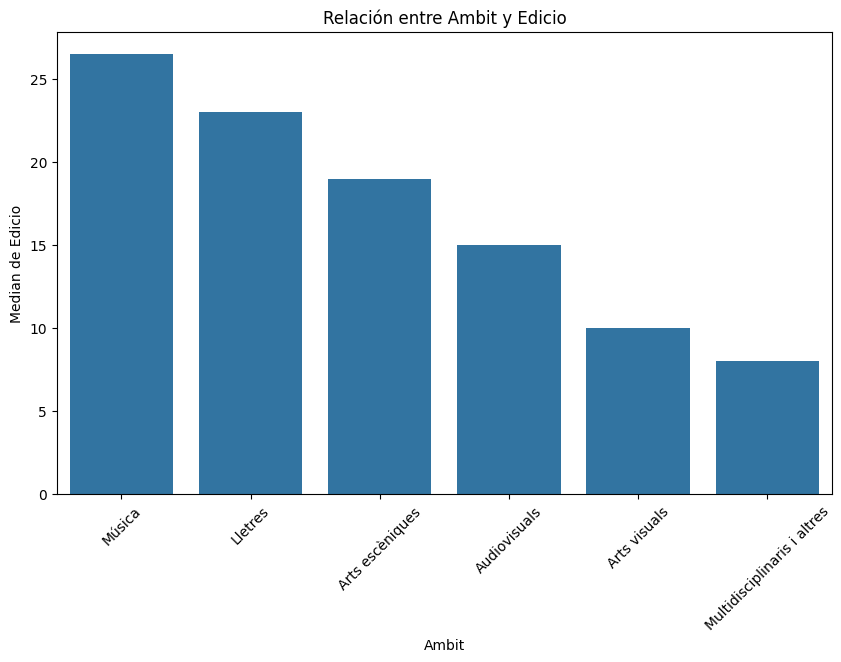

In [107]:
plot_categorical_numerical_relationship(festivales_bcn_20,"Ambit","Edicio", measure = "median")

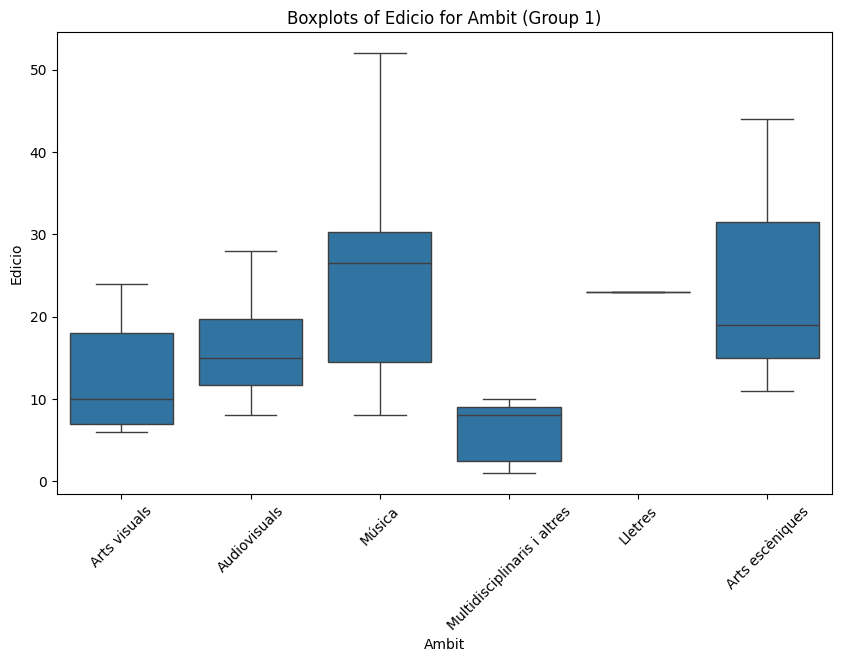

In [108]:
plot_grouped_boxplots(festivales_bcn_20,"Ambit","Edicio")

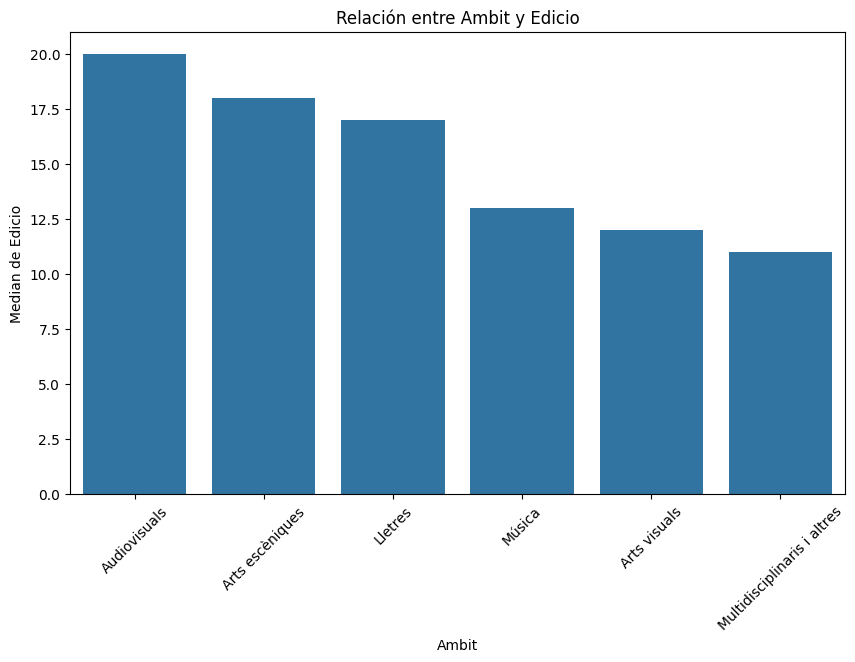

In [109]:
plot_categorical_numerical_relationship(festivales_bcn_22,"Ambit","Edicio", measure = "median")

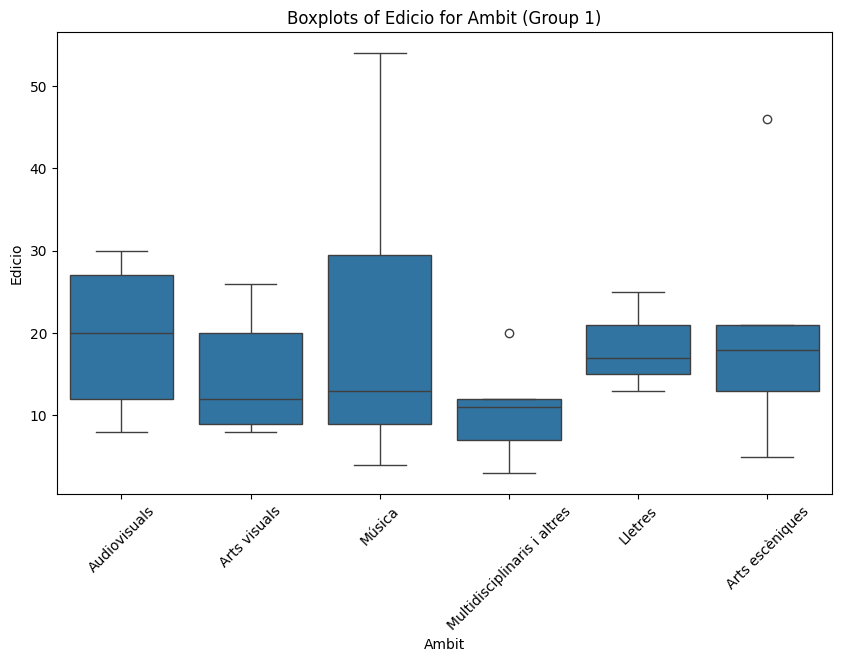

In [110]:
plot_grouped_boxplots(festivales_bcn_22,"Ambit","Edicio")

#### Ámbito - Asistentes

2013

(2,)


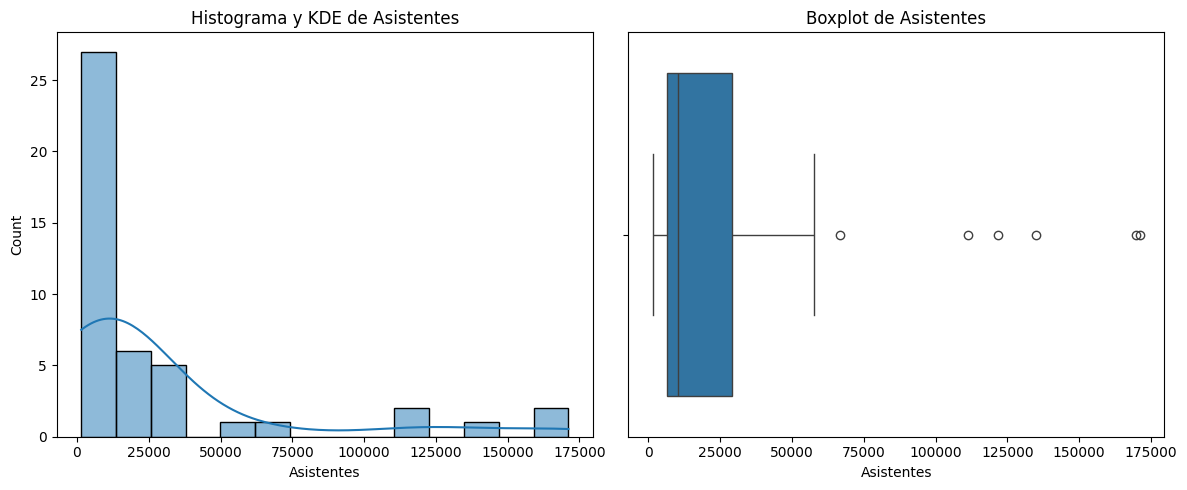

In [111]:
plot_combined_graphs(festivales_bcn_13,["Asistentes"])

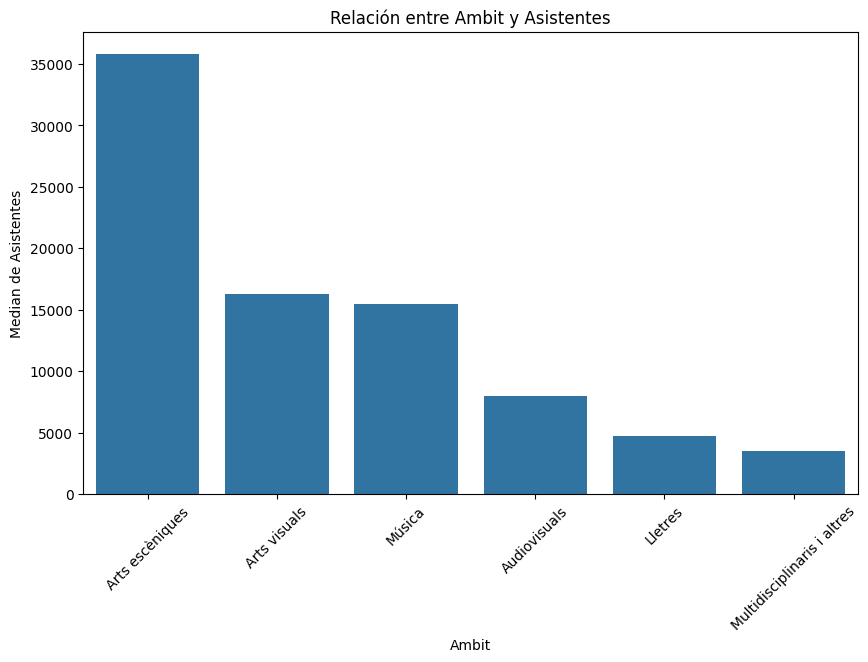

In [112]:
plot_categorical_numerical_relationship(festivales_bcn_13,"Ambit","Asistentes", measure = "median")

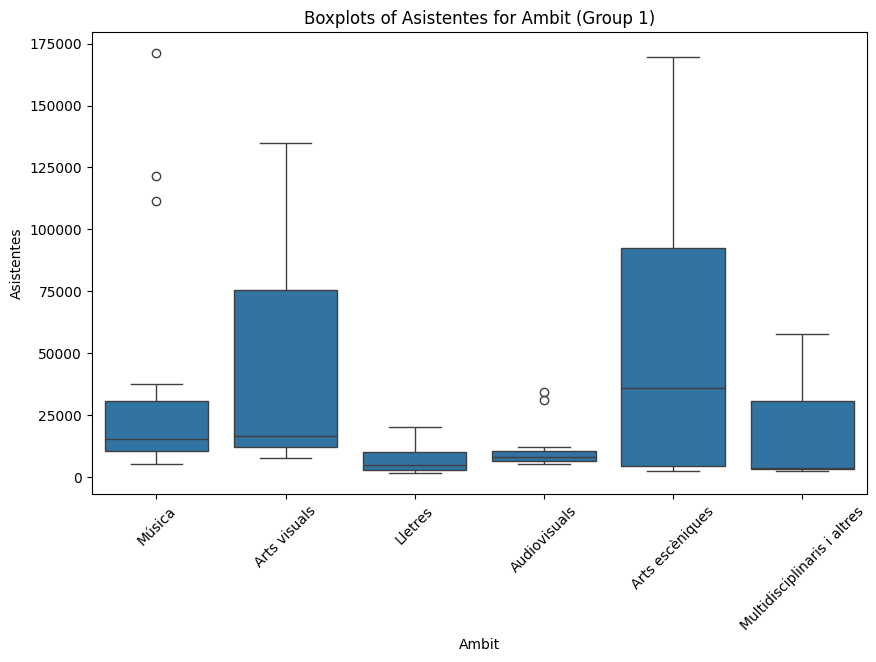

In [113]:
plot_grouped_boxplots(festivales_bcn_13,"Ambit","Asistentes")

Comentarios<br>
En el 2013 el rango de asistentes llega hasta unos 60 mil, aunque hay outliers hasta los 175mil.<br>
Al desglosar por ámbito, la mediana más alta corresponden a escénicas, sobre los 35K, seguida de lejos por visuales y música, en torno a los 15K<br>
Escénicas tiene la mayor dispersión, y los outliers más llamativos (ej, los 175K) corresponden a festivales de música.

2014

(2,)


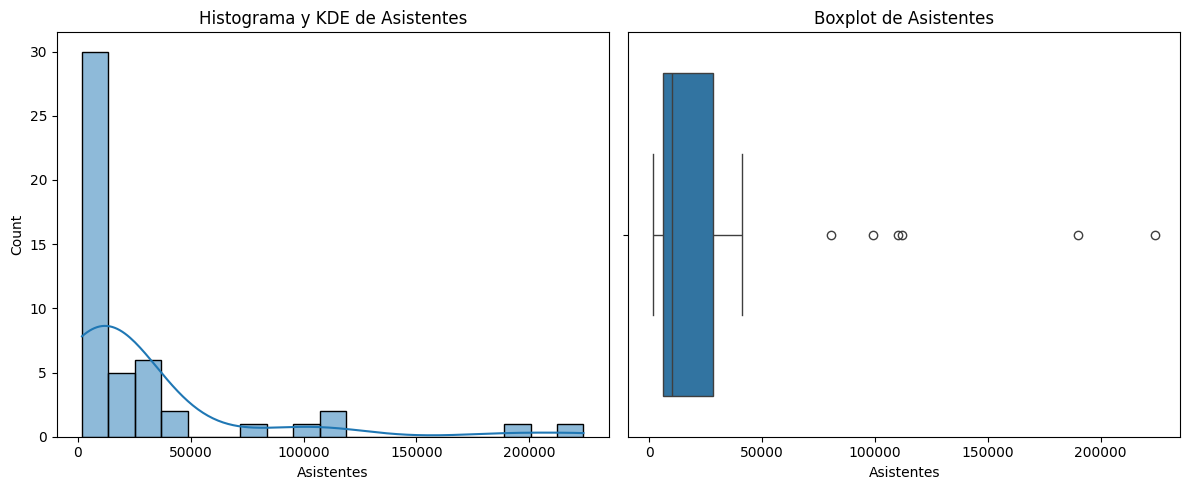

In [114]:
plot_combined_graphs(festivales_bcn_14,["Asistentes"])

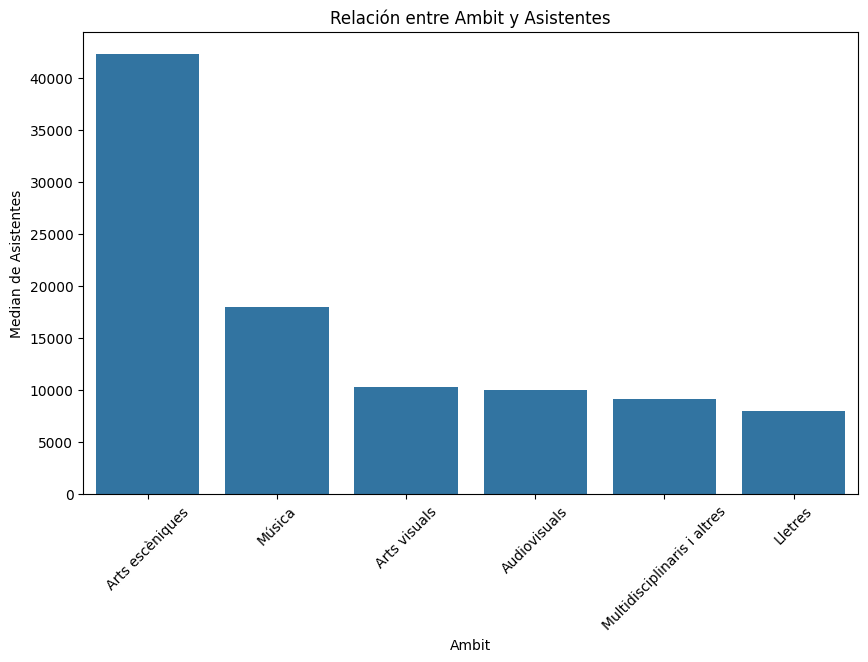

In [115]:
plot_categorical_numerical_relationship(festivales_bcn_14,"Ambit","Asistentes", measure = "median")

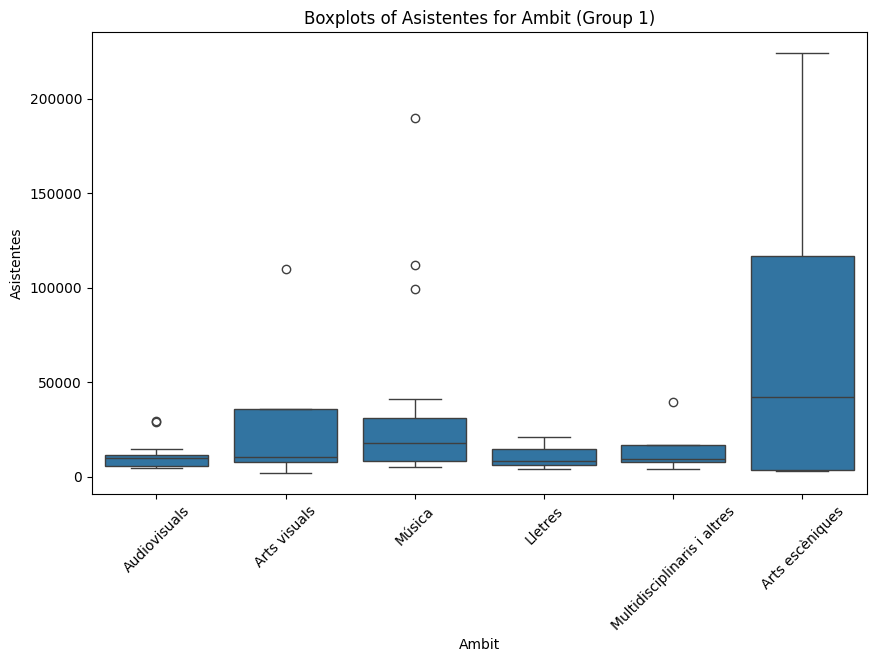

In [116]:
plot_grouped_boxplots(festivales_bcn_14,"Ambit","Asistentes")

Comentarios<br>
En el 2014 el rango de asistentes totales es ligeramente mñas bajo que el año anterior, aunque hay outliers aún más alejados, que superan los 200 mil.<br>
Al desglosar por ámbito, la mediana más alta corresponden a escénicas, mayor que el año anterior y ya supera los 40K, seguida de lejos por música, que ha crecido ligeramente mientras que visuales ha bajado un poco y se iguala a los demás ámbitosK<br>
Escénicas nuevamente tiene la mayor dispersión y llega al pico de los +200K, por el contrario de audiovisuales, letras y multidiscipinares, ultra concentrados. Llama la atención algún outlier de visuales, pero sobre todo, nuevamente, los de música.

2015

(2,)


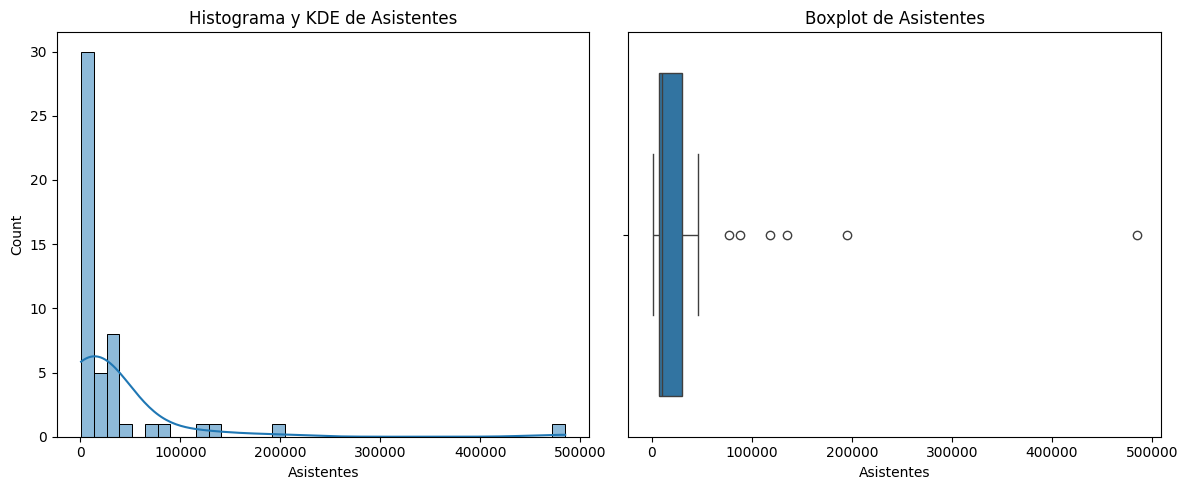

In [117]:
plot_combined_graphs(festivales_bcn_15,["Asistentes"])

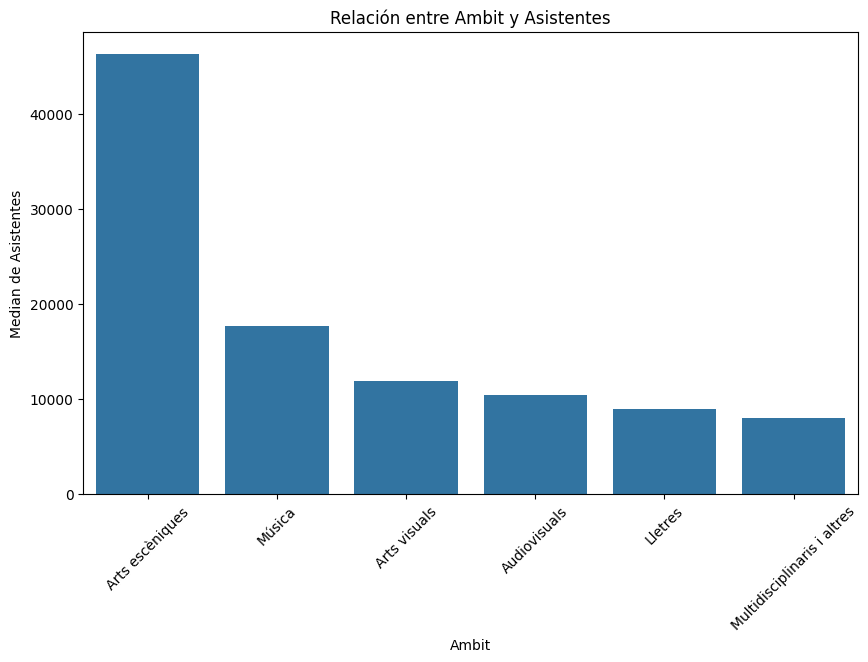

In [118]:
plot_categorical_numerical_relationship(festivales_bcn_15,"Ambit","Asistentes", measure = "median")

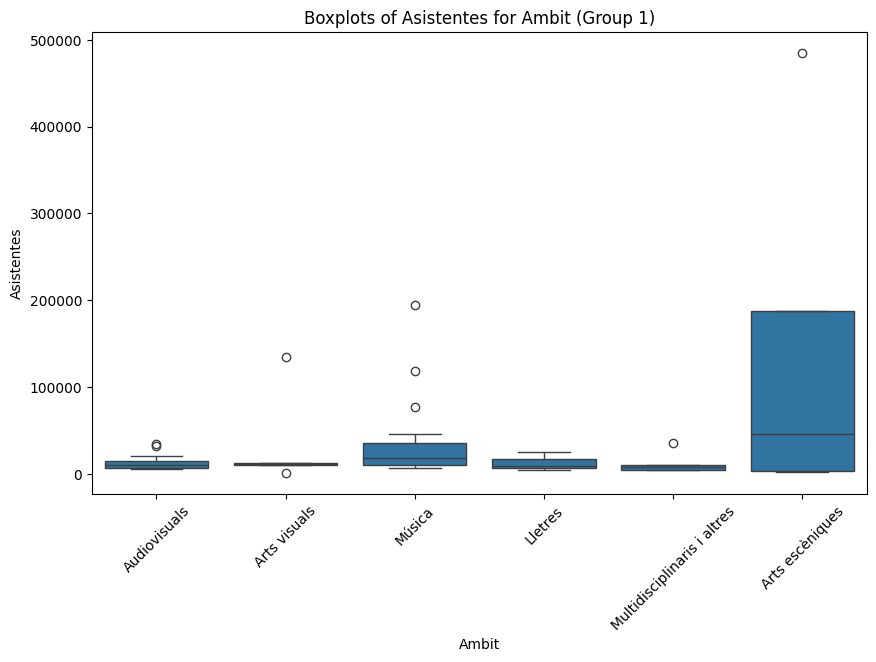

In [119]:
plot_grouped_boxplots(festivales_bcn_15,"Ambit","Asistentes")

Comentarios<br>
En el 2015 el rango de asistentes totales es ligeramente mñas bajo que el año anteriorha crecido hasta unos 80K, aunque hay outliers aún más alejados, aunque con algún outlier que supera los 500 mil, mucho mayor al año anterior (más del doble).<br>
Al desglosar por ámbito, la mediana más alta corresponden a escénicas, similar al año anterior por arriba de los 40K, seguida de lejos por música<br>
Escénicas nuevamente tiene la mayor dispersión y nuevamente es el ámbito asociado al outlier de aprox 500K, por el contrario todos los demás ámbitos, concentrados en o con máximos de 50K. Llama la atención algún outlier de música en los 200K.

2016

(2,)


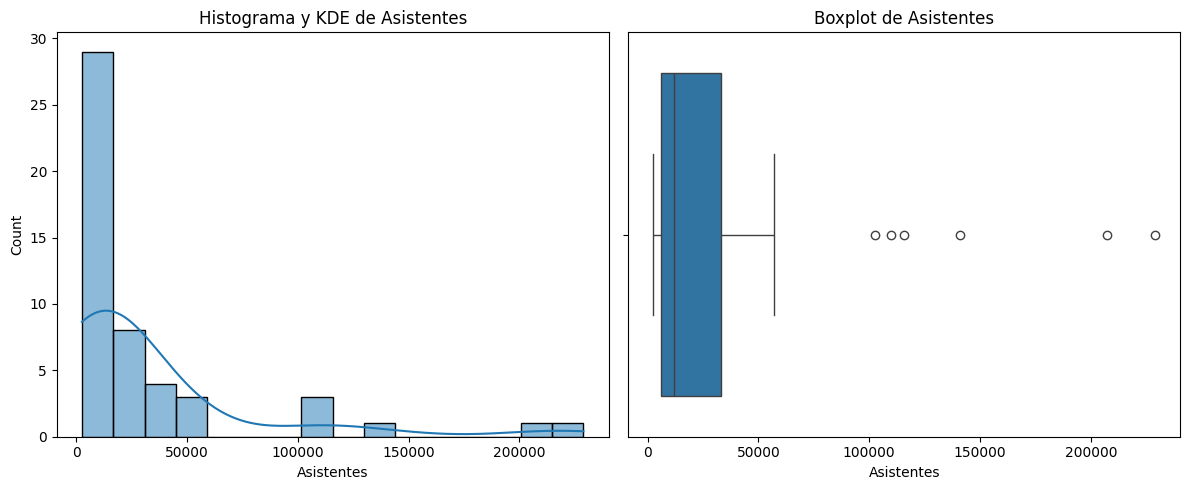

In [120]:
plot_combined_graphs(festivales_bcn_16,["Asistentes"])

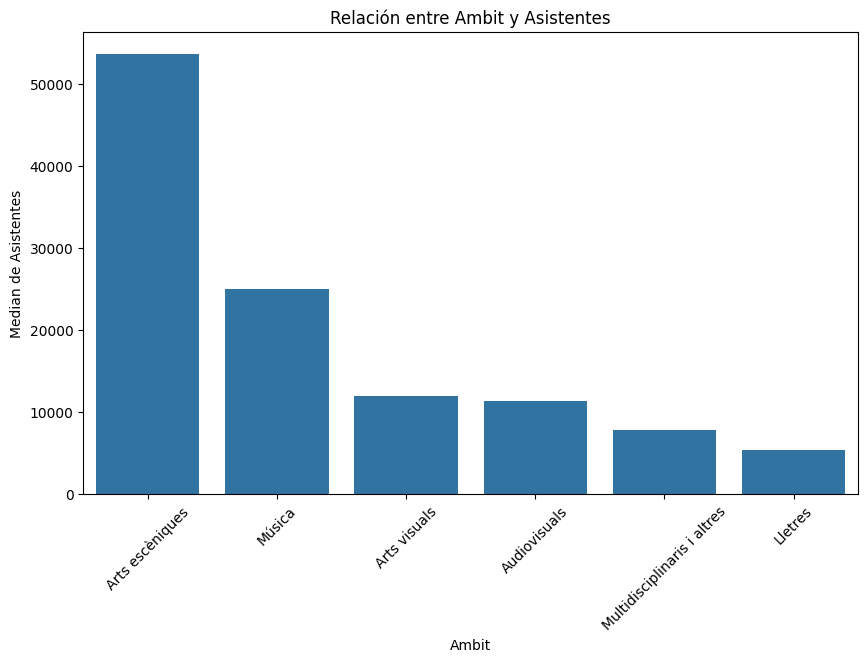

In [121]:
plot_categorical_numerical_relationship(festivales_bcn_16,"Ambit","Asistentes", measure = "median")

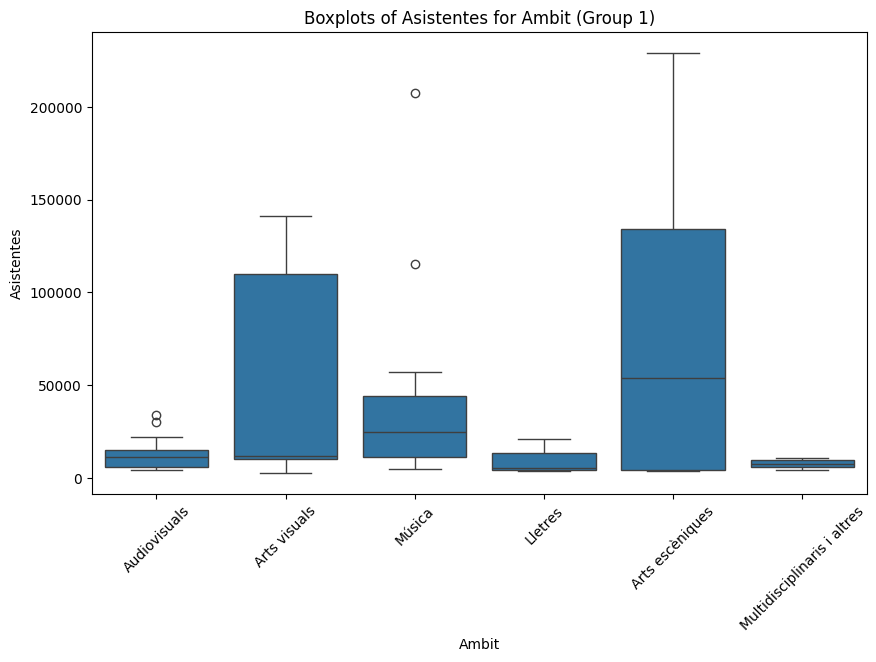

In [122]:
plot_grouped_boxplots(festivales_bcn_16,"Ambit","Asistentes")

Comentarios:<br>
En el 2016 el rango de asistentes totales vuelve a parecerse a 2014, con una dispersión hasta los 50K y los outliers en torno a los 200K.<br>
Al desglosar por ámbito, la mediana más alta corresponden una vez más a escénicas, que ha crecido hasta los 50K, pero esta vez también la música ha crecido hasta unos 25K.<br>
La dispersión esta vez ha cambiado, y si bien escénicas sigue a la cabeza, le sigue artes visuales, con un rango que llega hasta más de 100k, mientras que audiovisuales, letras y multidisiplinares parecen reducirse. Música estable en los 50 k y con su outlier de 200k.

2017

(2,)


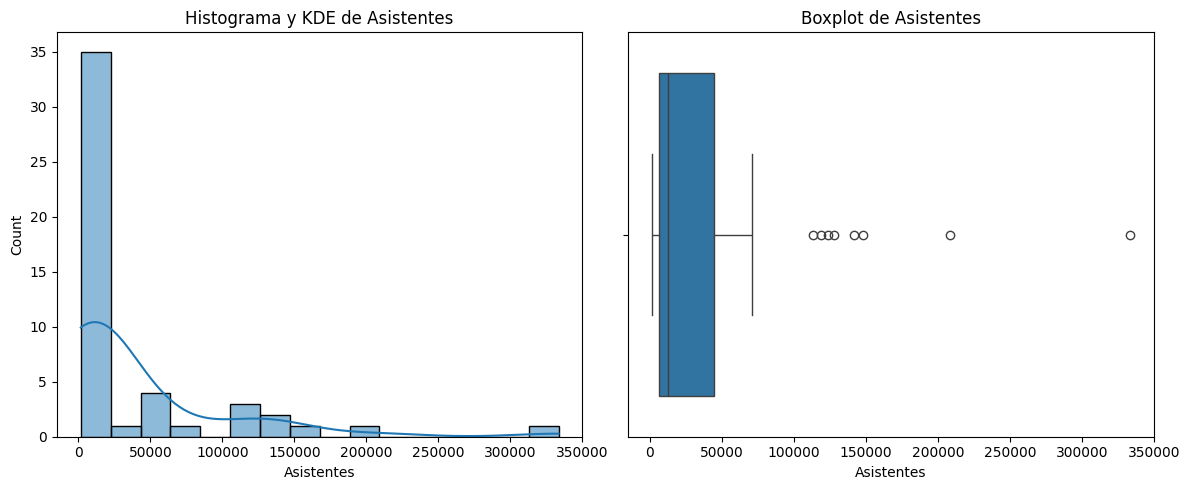

In [123]:
plot_combined_graphs(festivales_bcn_17,["Asistentes"])

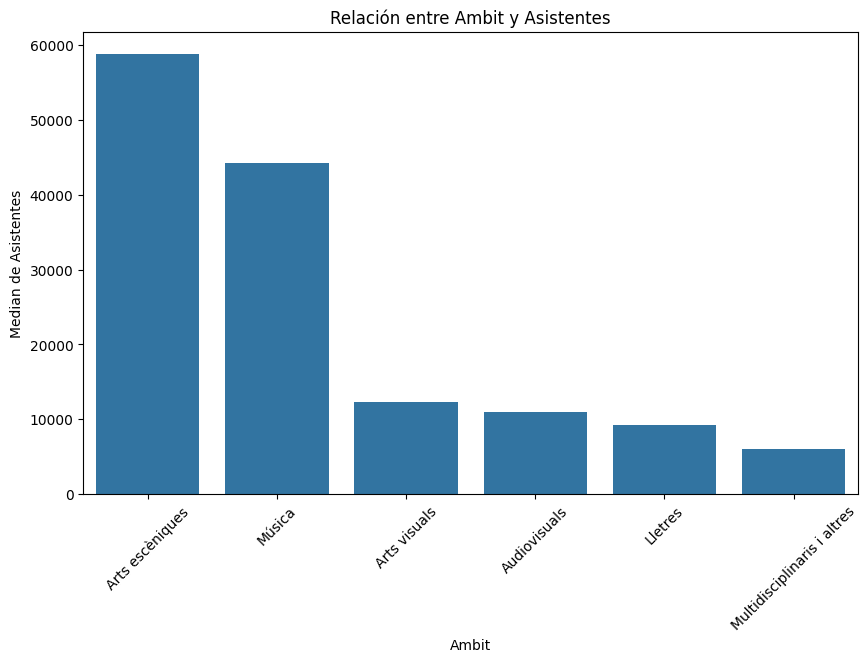

In [124]:
plot_categorical_numerical_relationship(festivales_bcn_17,"Ambit","Asistentes", measure = "median")

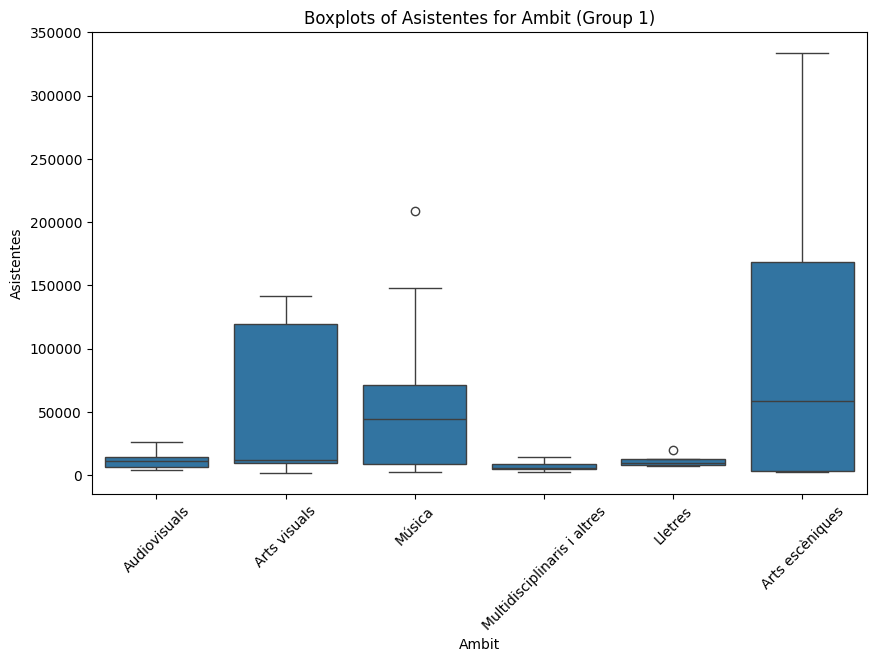

In [125]:
plot_grouped_boxplots(festivales_bcn_17,"Ambit","Asistentes")

Comentarios:<br>
La situación del 2017 es relativamente similar, solo que en el total vemos algún outlier que llega a los 250k, que correspode a escénicas. Su mediana esta vez llega hasta los 60 K, máximo de la década en forma de pico repentino y solitario, pero también la música pega un salto abrupto y se coloca por sobre los 40mil.<br>

2018

(2,)


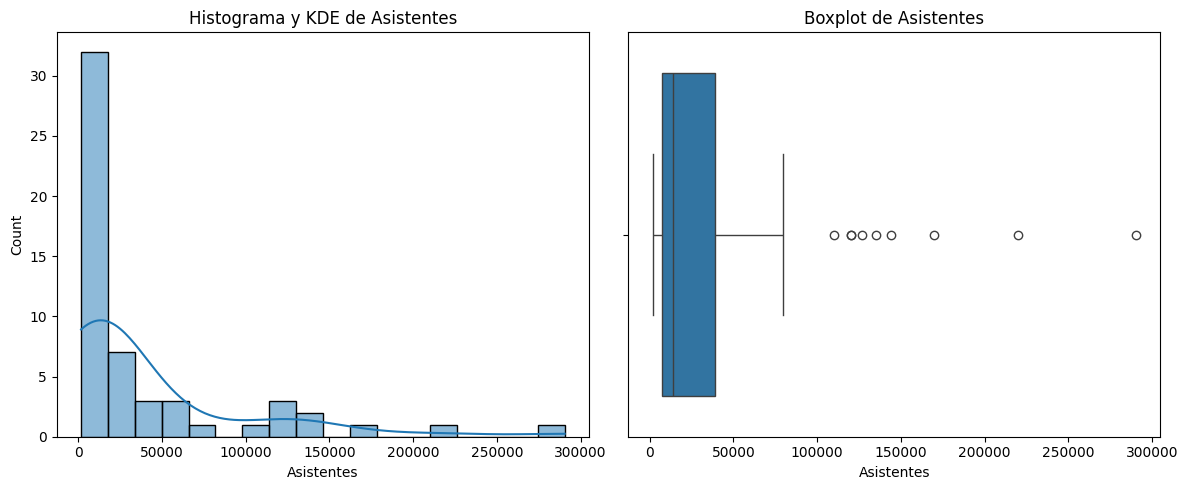

In [126]:
plot_combined_graphs(festivales_bcn_18,["Asistentes"])

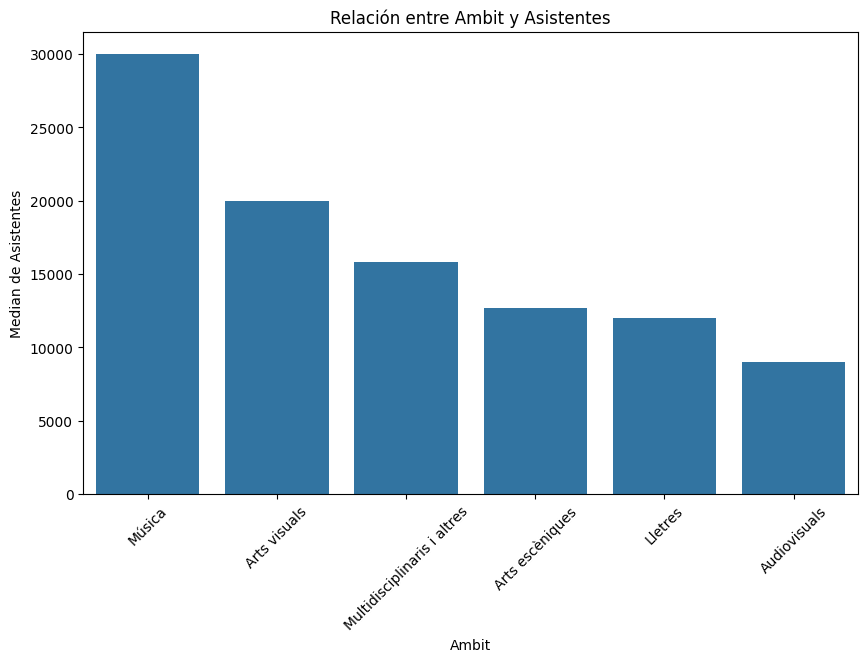

In [127]:
plot_categorical_numerical_relationship(festivales_bcn_18,"Ambit","Asistentes", measure = "median")

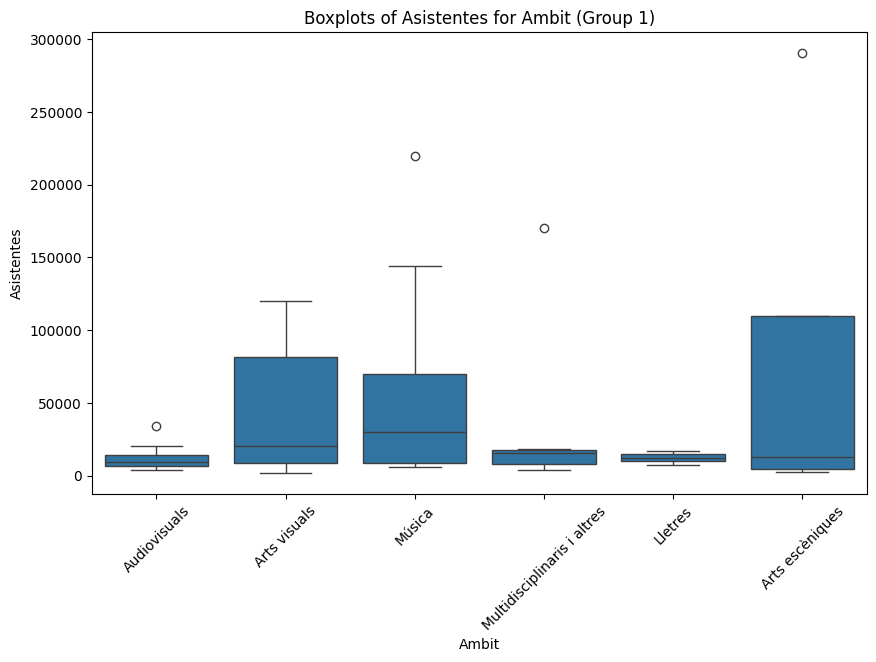

In [128]:
plot_grouped_boxplots(festivales_bcn_18,"Ambit","Asistentes")

Comentarios:<br>
Si bien en 2018 las cifras son similares en lo general, hay un mayor equilibrio de las medianas. <br>
Pero al mirar por ámbito hay un gran cambio: la música ha tomado la delantera con una mediana de 30K, que será su pico mñaximo de la dñecada analizada, dejando atrás a escénicas que se reduce a 15, adelantada hasta por visuales y multidisciplinarios. El outlier de 300k sigue correspondiendo a escénicas<br>

2019

(2,)


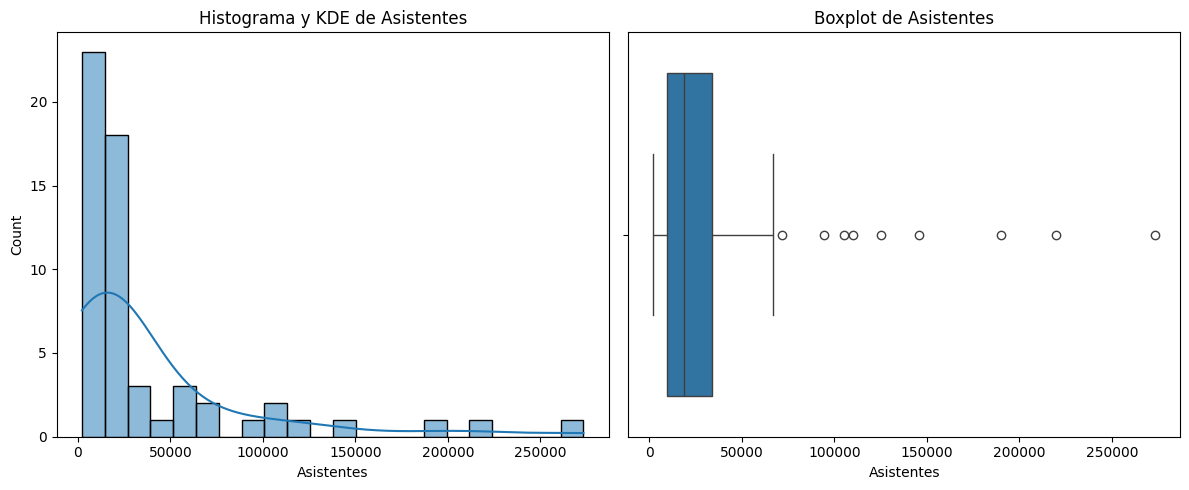

In [129]:
plot_combined_graphs(festivales_bcn_19,["Asistentes"])

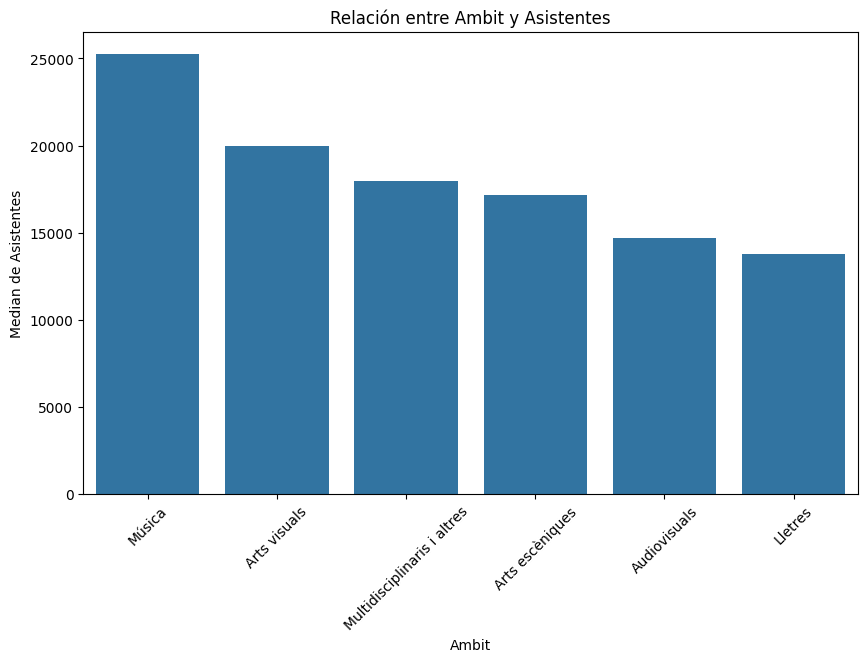

In [130]:
plot_categorical_numerical_relationship(festivales_bcn_19,"Ambit","Asistentes", measure = "median")

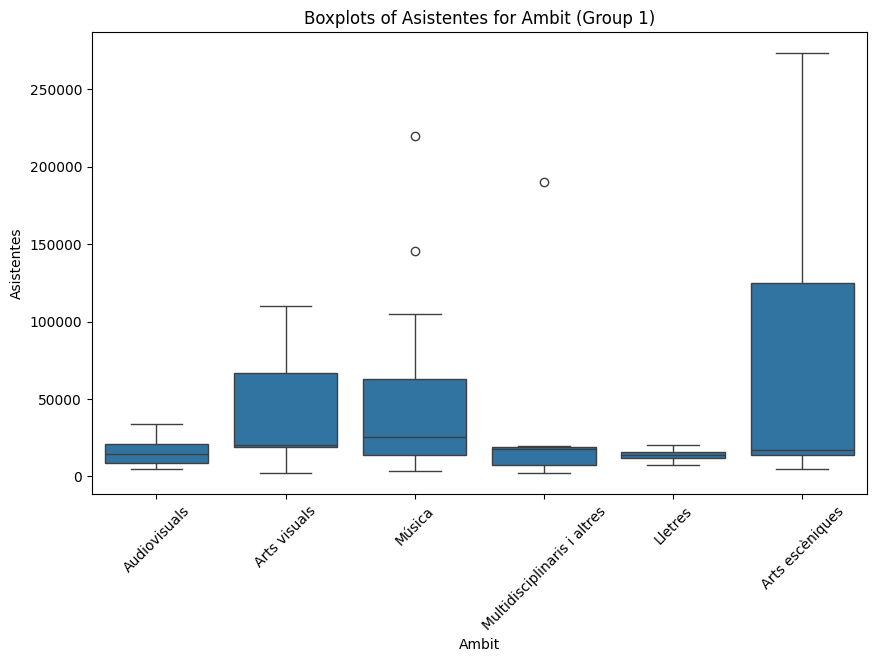

In [131]:
plot_grouped_boxplots(festivales_bcn_19,"Ambit","Asistentes")

Comentarios:<br>
En el 2019 las cifras son similares en lo general, hay un mayor equilibrio de las medianas. <br>
Pero al mirar por ámbito se estabiliza la música en primera posición, aunque con una mediana ligeramente mñas baja, 25k, pero ya todos los ámbitos tienen una mediana de al menos 15k, no hay tanta diferencia de un ámbito al otro.<br>
Y como siempre, en mñusica vemos el ya clásico outlier de 200K mietras que la mayor dispersión IQR la conserva como siempre escénicas.

2020

(2,)


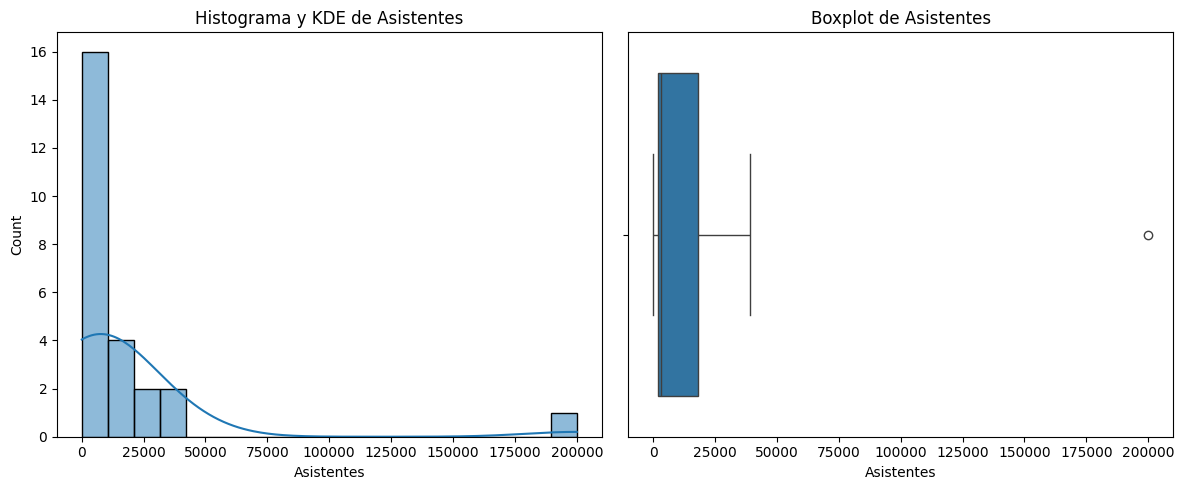

In [132]:
plot_combined_graphs(festivales_bcn_20,["Asistentes"])

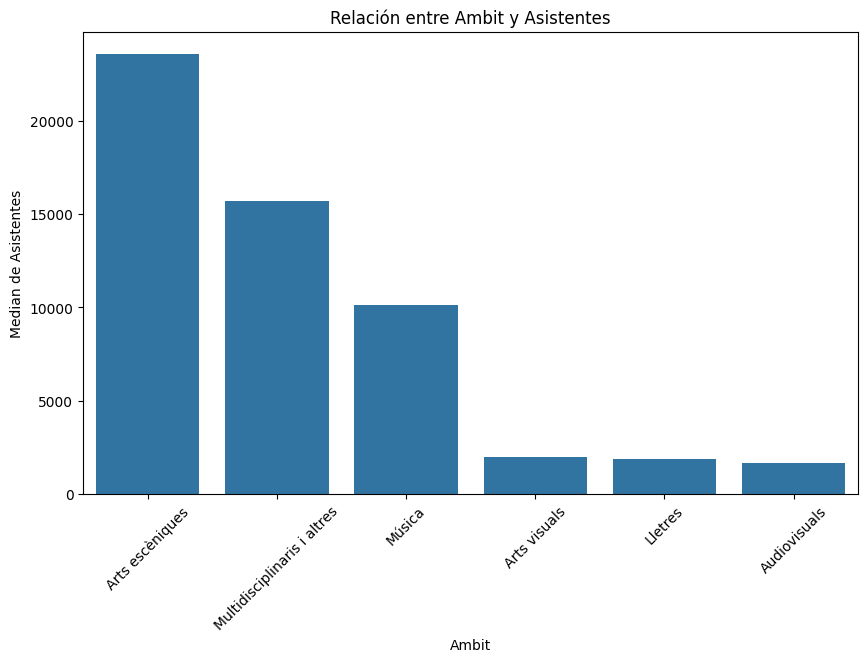

In [133]:
plot_categorical_numerical_relationship(festivales_bcn_20,"Ambit","Asistentes", measure = "median")

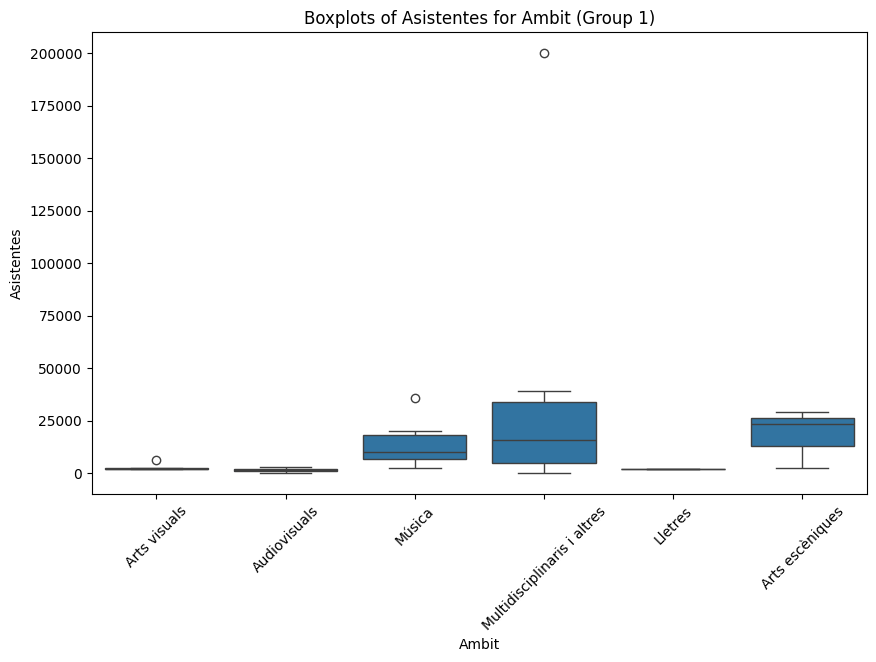

In [134]:
plot_grouped_boxplots(festivales_bcn_20,"Ambit","Asistentes")

Comentarios:<br>
Como es de esperar, 2020 es un año de cifras anómalas, con una mayoria de los festivales que no superan los 25K, y el mayor outlier está en torno a 200K. <br>
Pero al mirar por ámbito escénicas ha vuelto a tomar la delantera, aunque con soo unos 20k de mediana, seguida de escñenicas en 15 y mñusica con apenas 10. Los demñas ámbotos están en sus mínimos. Para variar, el outlier de 200k esta vez corresponde a multidisplinares<br>

2021

(2,)


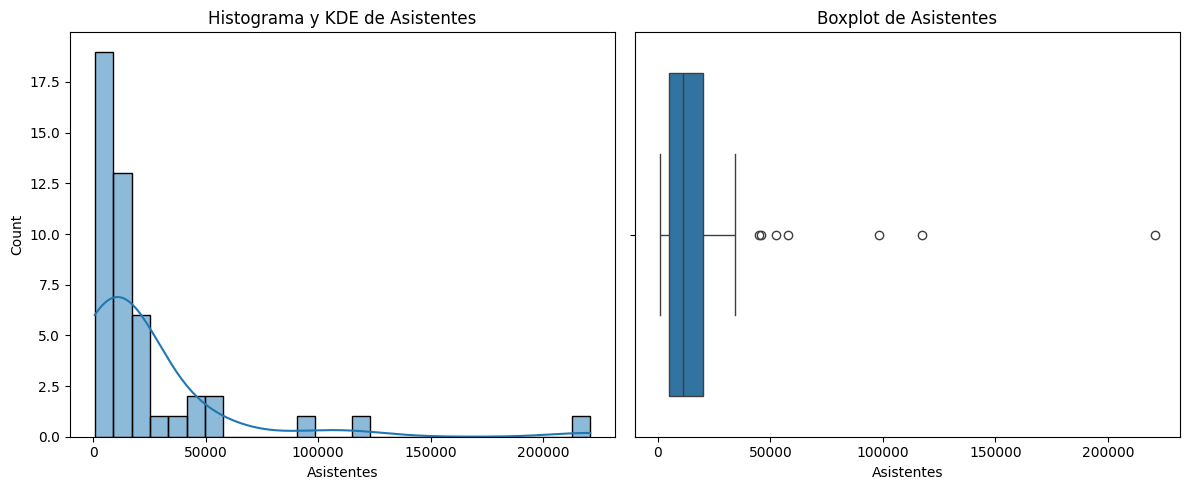

In [135]:
plot_combined_graphs(festivales_bcn_21,["Asistentes"])

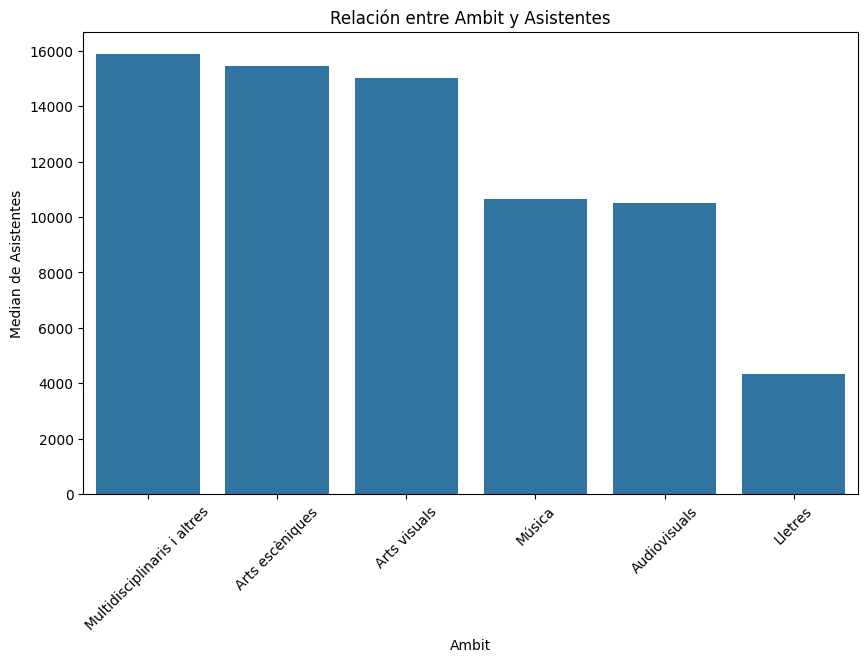

In [136]:
plot_categorical_numerical_relationship(festivales_bcn_21,"Ambit","Asistentes", measure = "median")

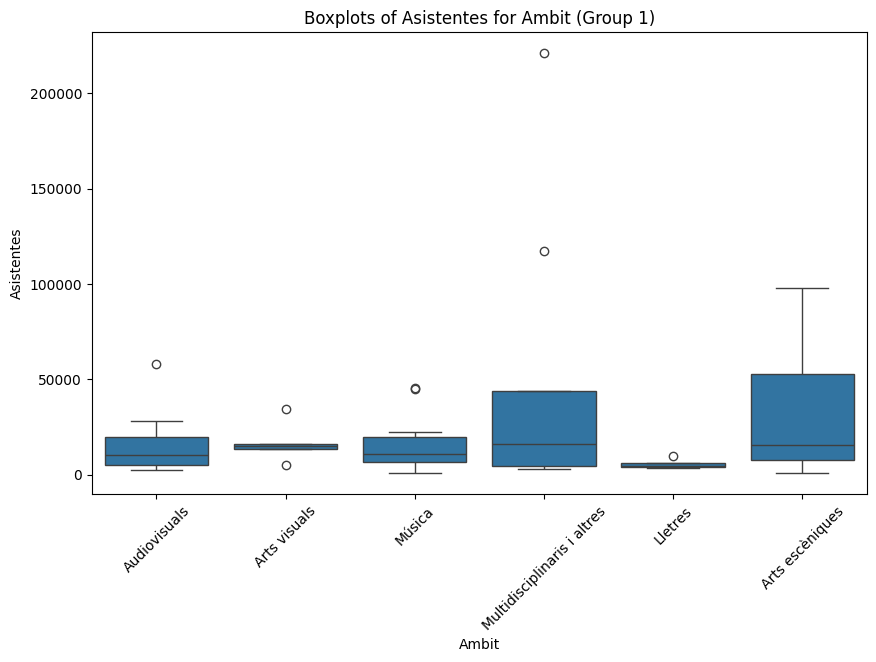

In [137]:
plot_grouped_boxplots(festivales_bcn_21,"Ambit","Asistentes")

Comentarios:<br>
En el 21 las cifras totales de dispersión de asistentes siguen bajas, pero aparecen mñas outliers en la cola. Sí, el mayor nuevamente es de 200K y de multiddisciplinares, como el año anterior. <br>
Pero al mirar por ámbito, las medianas esta vez están más equilibradas que nunca, y muy bajas: multidisciplinares, escénicas y visuales lideran,pero con apenas unos 15k, y música y audiovisuales empatadas en poco más de 10. Y aunque escénica tenga mñas dispersión, en todos los casos la brecha se ha reducido mucho e igualado unas con otras <br>

2022

(2,)


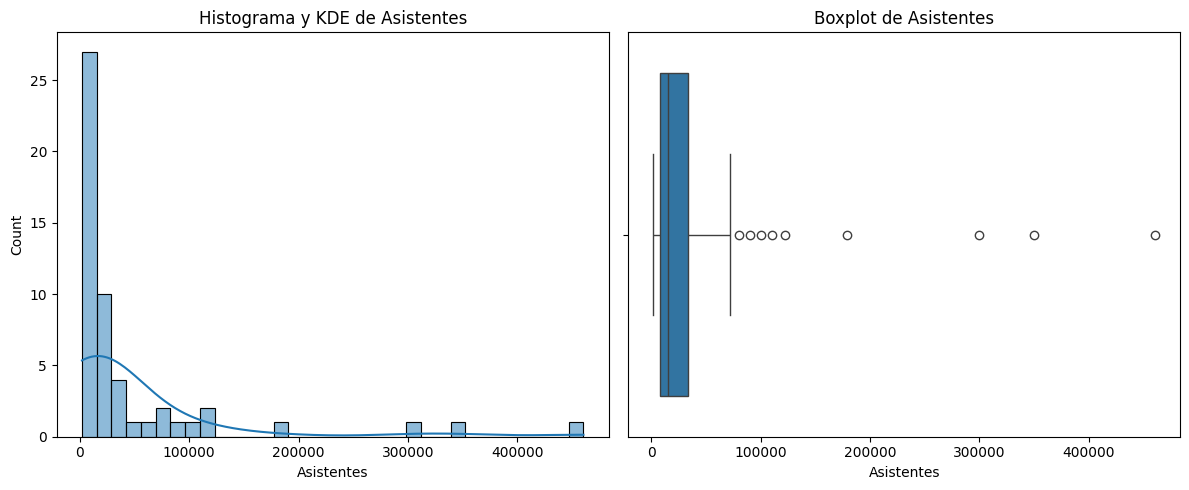

In [138]:
plot_combined_graphs(festivales_bcn_22,["Asistentes"])

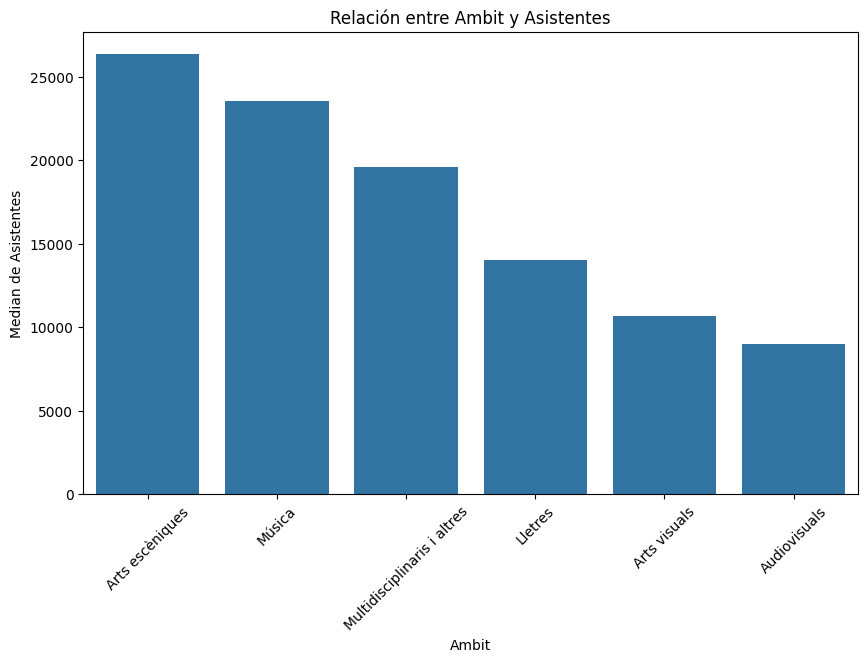

In [139]:
plot_categorical_numerical_relationship(festivales_bcn_22,"Ambit","Asistentes", measure = "median")

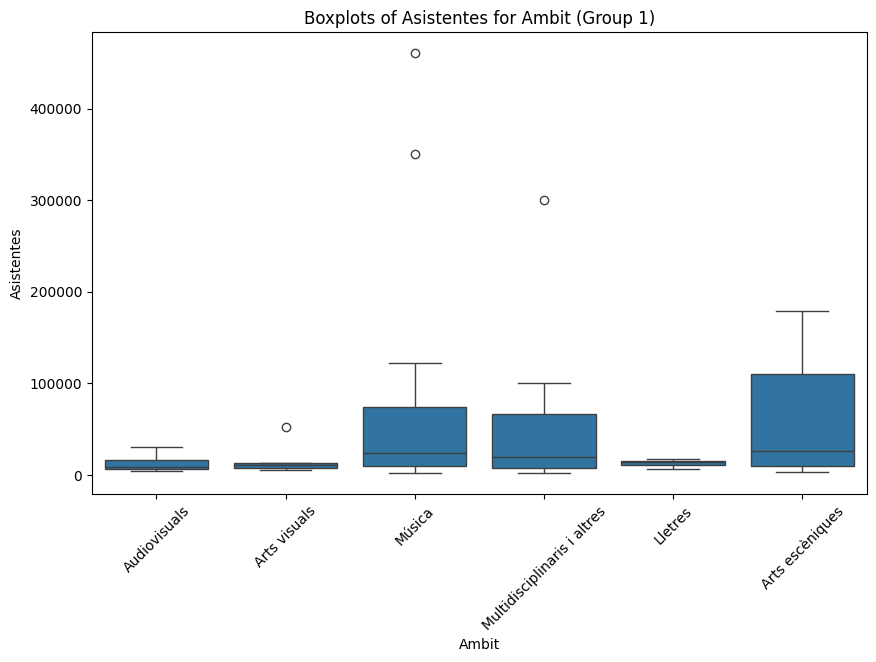

In [140]:
plot_grouped_boxplots(festivales_bcn_22,"Ambit","Asistentes")

Comentarios:<br>
El 22 es el año de la recuperación post pandemia, a nivel general y en la música y las artes escénicas en particular. El rango de la mayoría de los festivales se expande, crece la media, y esta vez los outliers están arriba de los 300 y hasta los 450K! <br>. 
Escénicas vuelve a valores más habituales años antes, y mñusica en segundo lugar, en torno a los 25K cada una, sin llegar a sus mñaximos históricos ninguna de las dos. Multidisplinar tiene algún outlier importante, superados por 2 de música que, esta vez sí, rompen todos los records.<br> 

#### Entrada - Asistentes

2013

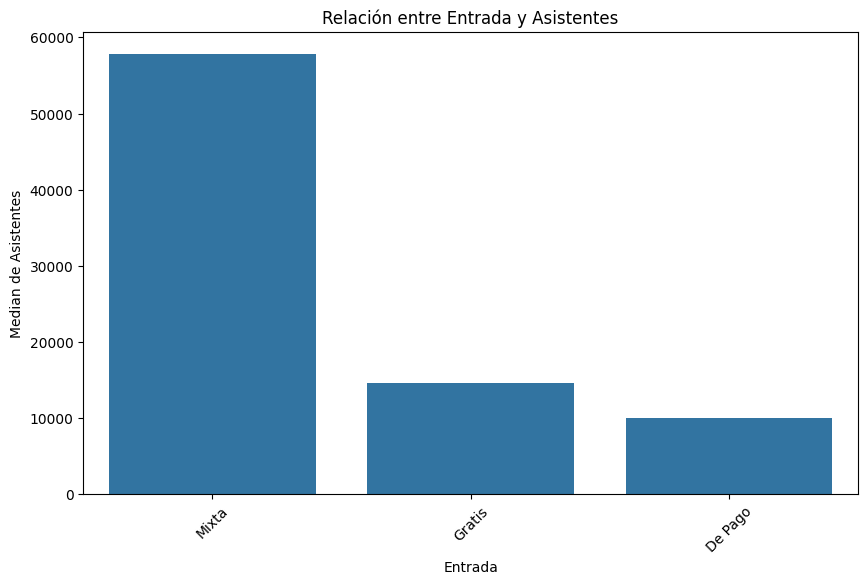

In [141]:
plot_categorical_numerical_relationship(festivales_bcn_13,"Entrada","Asistentes", measure = "median")

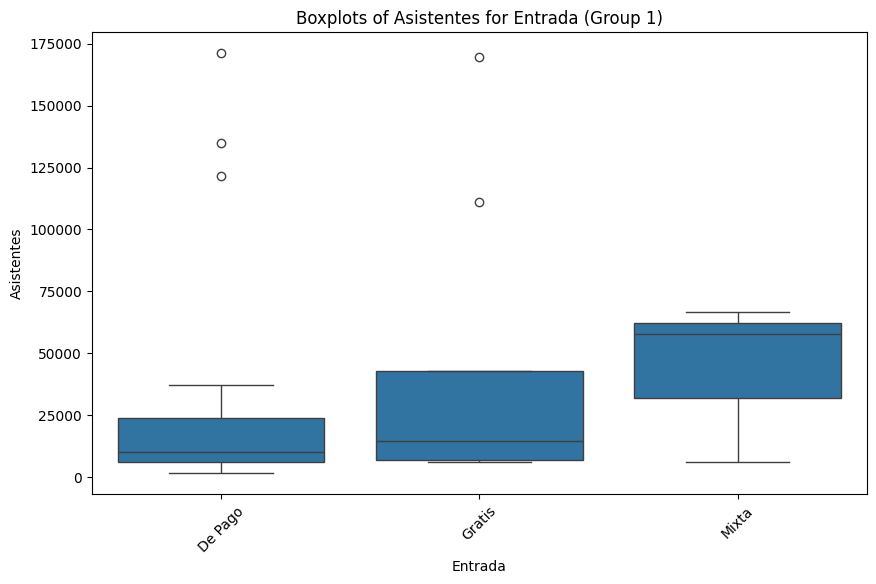

In [142]:
plot_grouped_boxplots(festivales_bcn_13,"Entrada","Asistentes")

Comentarios<br>
La mediana de los festivales en formato mixto es mucho más alta que las demás, sobre los 60mil. Sin embargo los gratuitos y los de pagos tienen unos outliers mucho más elevados<br>
En todos estos casos habrá que tener en cuenta que los de entrada mixta son una minúscula minoría, por lo que la comparación más interesante es entre los de pago y los gratuitos, omitiendo los mixtos. En cuanto a estos dos, los gratuitos parecen tener métricas más altas en conjunto, de todo el rango en que entra de forma compacta toda la muestra entera.

2014

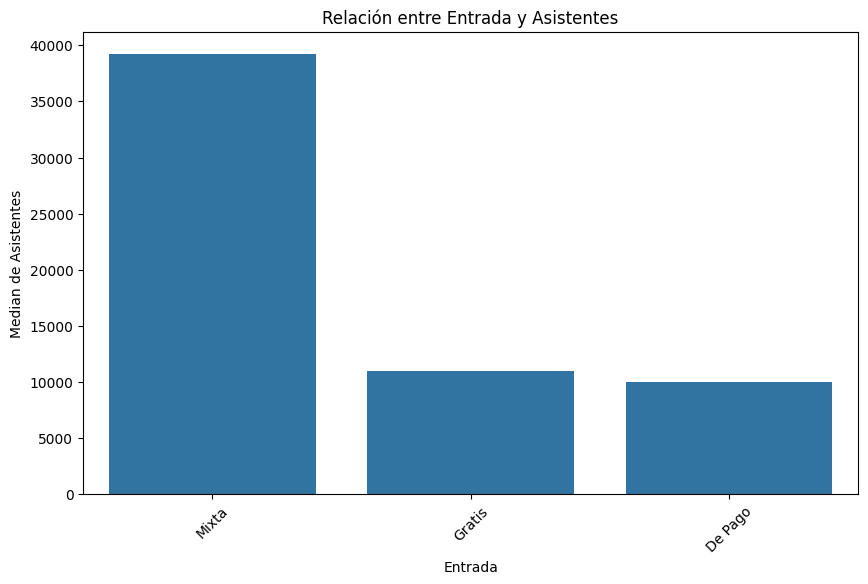

In [143]:
plot_categorical_numerical_relationship(festivales_bcn_14,"Entrada","Asistentes", measure = "median")

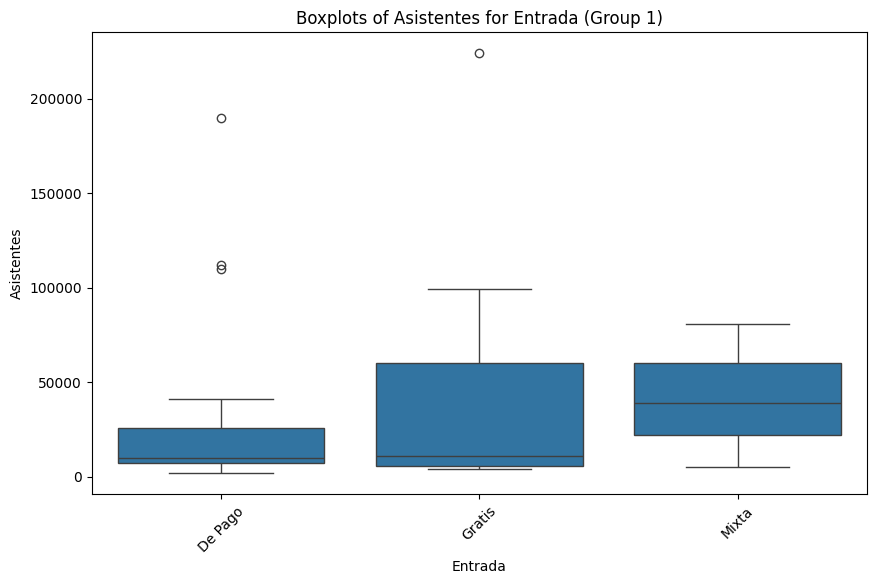

In [144]:
plot_grouped_boxplots(festivales_bcn_14,"Entrada","Asistentes")

Comentarios:<br>
La mediana de los festivales en formato mixto es mucho más alta que las demás, aunque ha bajado a 40 mil. Sin embargo, mirando la dispersión, ésta es mayor en los gratuitos, mucho mayor que en los de pago. Además, tiene los outliers más alejados. Los de pago, menos dispersos y con mediana mñas baja, tienen más casos de outliers alejados.

2015

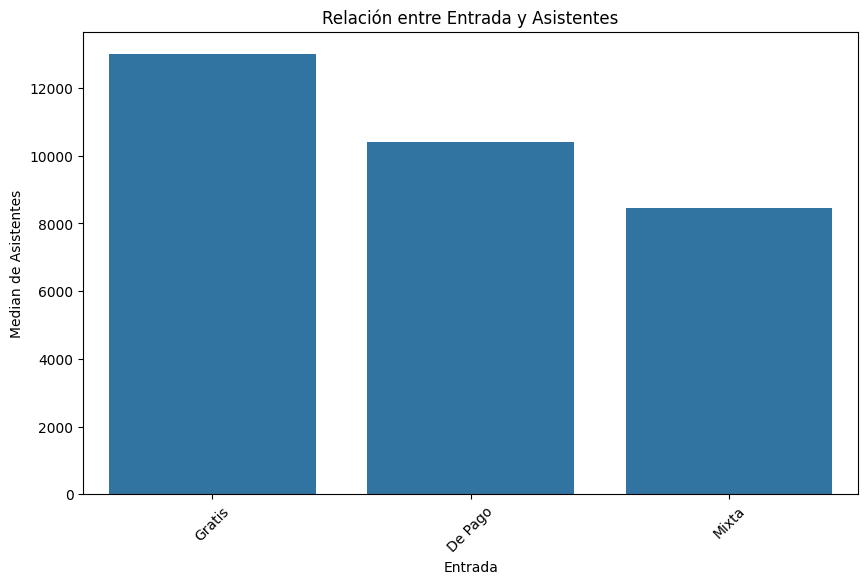

In [145]:
plot_categorical_numerical_relationship(festivales_bcn_15,"Entrada","Asistentes", measure = "median")

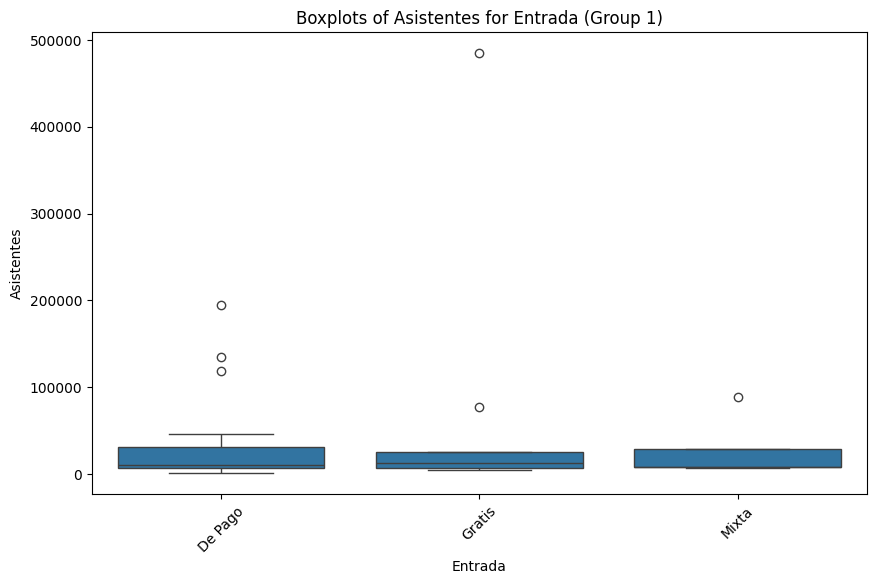

In [146]:
plot_grouped_boxplots(festivales_bcn_15,"Entrada","Asistentes")

Comentarios:<br>
En 2015 cambia la tendencia y la mediana de los festivales en formato mixto cae detrás de los gratuitos, en primer lugar,y los de pago en segundo, aunque quedan los 3 formatos bastante igualados. La dispersión es muy similar para los 3 casos, aunque algo mayor para los de pago, que además tiene varios outliers moderados. El máximo outlier pertenece a un festival gratuito.

2016

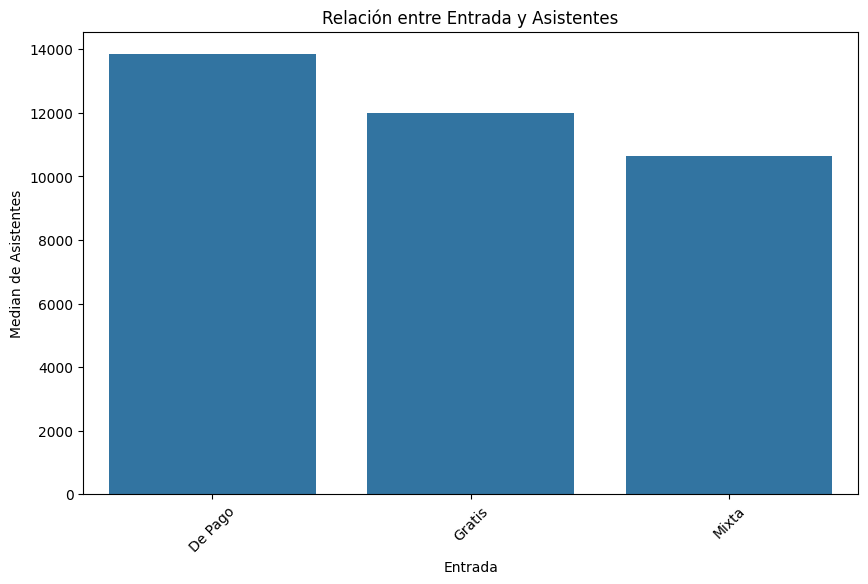

In [147]:
plot_categorical_numerical_relationship(festivales_bcn_16,"Entrada","Asistentes", measure = "median")

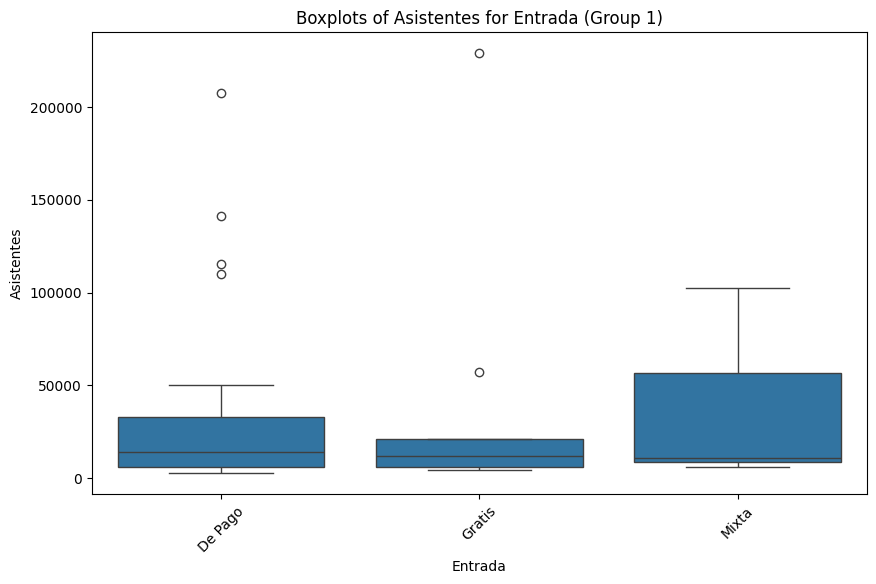

In [148]:
plot_grouped_boxplots(festivales_bcn_16,"Entrada","Asistentes")

Comentarios:<br>
En 2016 suben las medianas un 25/30% y se invierten las posiciones de los festivales de pago, a la cabeza, y los de pago en segundo lugar. Y a la hora de medir la dispersión, la máxima está en los mixtos, la mayor cantidad de outliers en los de pago, a poca distancia del mayor outlier de todos, correspondiente a un festival gratuito. Interesa señalar que el boxplot de fetsivakes gratuitos está cada vez más bajo y compacto.

2017

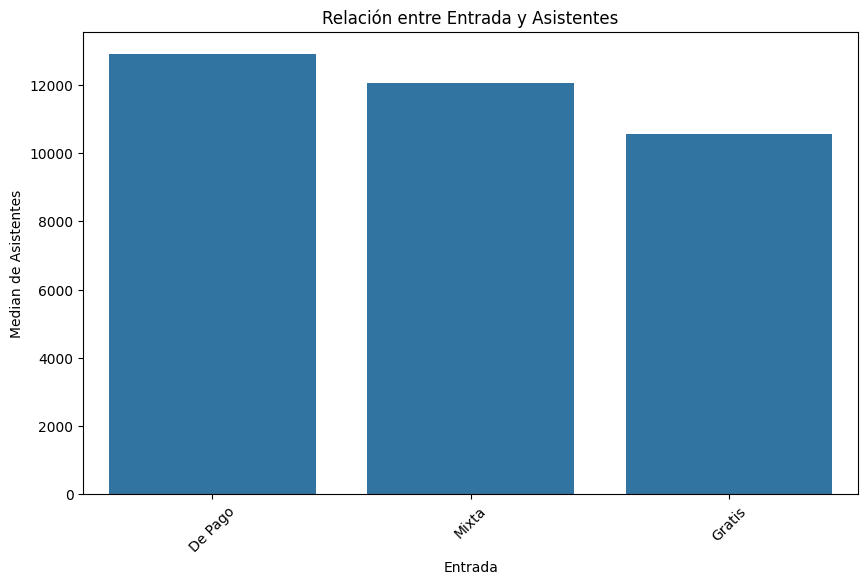

In [149]:
plot_categorical_numerical_relationship(festivales_bcn_17,"Entrada","Asistentes", measure = "median")

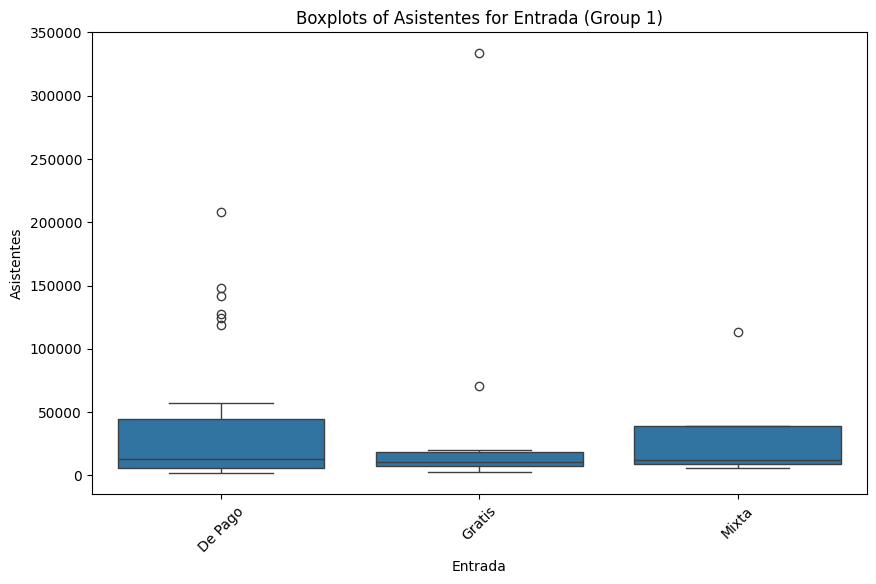

In [150]:
plot_grouped_boxplots(festivales_bcn_17,"Entrada","Asistentes")

Comentarios:<br>
Se va viendo que las medianas están bastante equilibradas en todos los casos, aunque según el año cambie el tipo de entrada vinculadoa la mediana más alta. También las dispersiones se mantienen similaresen los 3 casos, aunque la gratuis sea más compacta. Las diferencias más grandes siguen estando en los outliers, más cantidad en los de pago, y con valor más alto el máximo de formato gratuito. Justamente si tomáramos el top 10 según asistentes, solo estaríamos viendo outliers.

2018

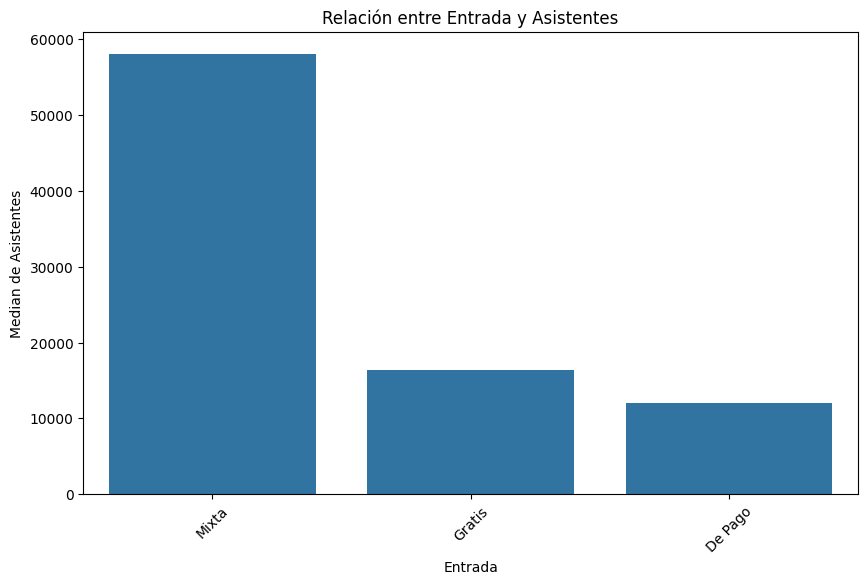

In [151]:
plot_categorical_numerical_relationship(festivales_bcn_18,"Entrada","Asistentes", measure = "median")

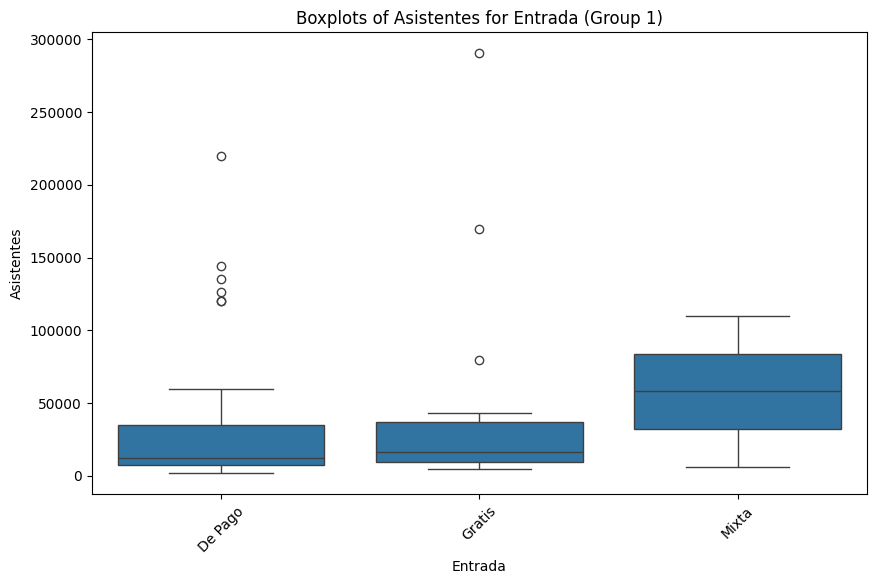

In [152]:
plot_grouped_boxplots(festivales_bcn_18,"Entrada","Asistentes")

Comentario:<br>
Como en 2013, la mediana de los festivales de entrada de tipo mixta se dispara hasta los 60 mil, mientras que los otros 2 formatos se mantienen estables. La dispersión esta vez se modifica algo, con mucha más dispersión para la mixta, y también una mayor amplitud en los gratuitos, que ahora se parecen mucho a los de pago. Como otras veces, los de pago tienen mñas outliers, mientrasque los gratuitos tienen los más alejados.

2019

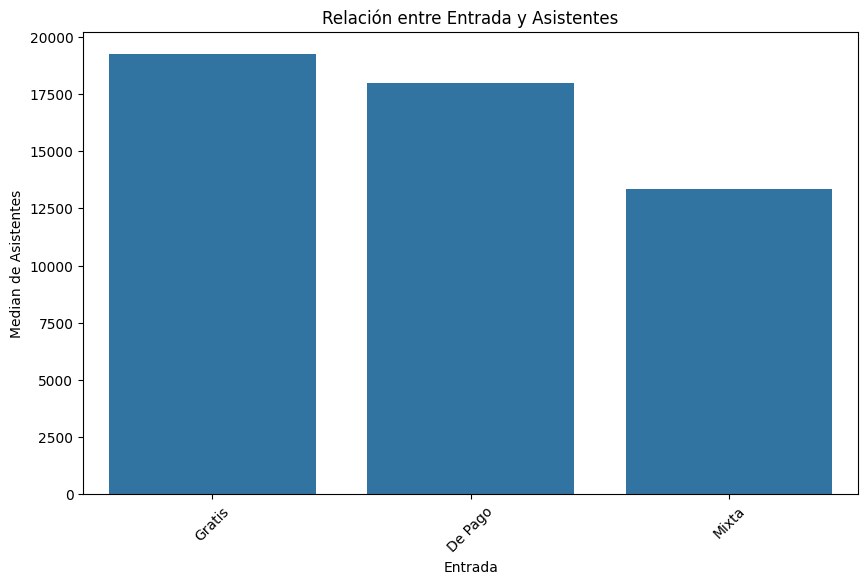

In [153]:
plot_categorical_numerical_relationship(festivales_bcn_19,"Entrada","Asistentes", measure = "median")

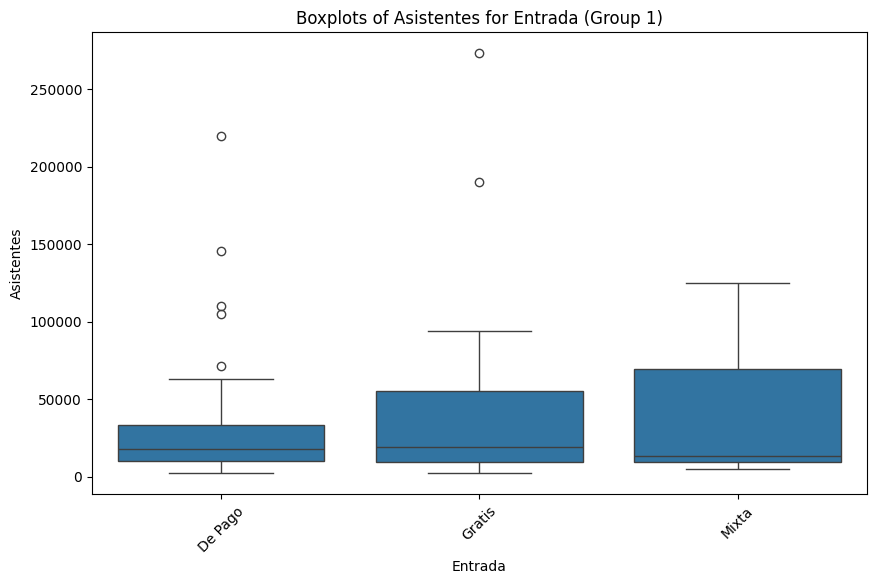

In [154]:
plot_grouped_boxplots(festivales_bcn_19,"Entrada","Asistentes")

En 2019 vuelve a crecer la dispersión de los festivales gratuitos, donde la parte superior de su rango duplica la equivalente de los de pago. Igual que antes, los máximosoutliers son en gratuitos, la mayor cantidad de outliers en los de pago.

2020

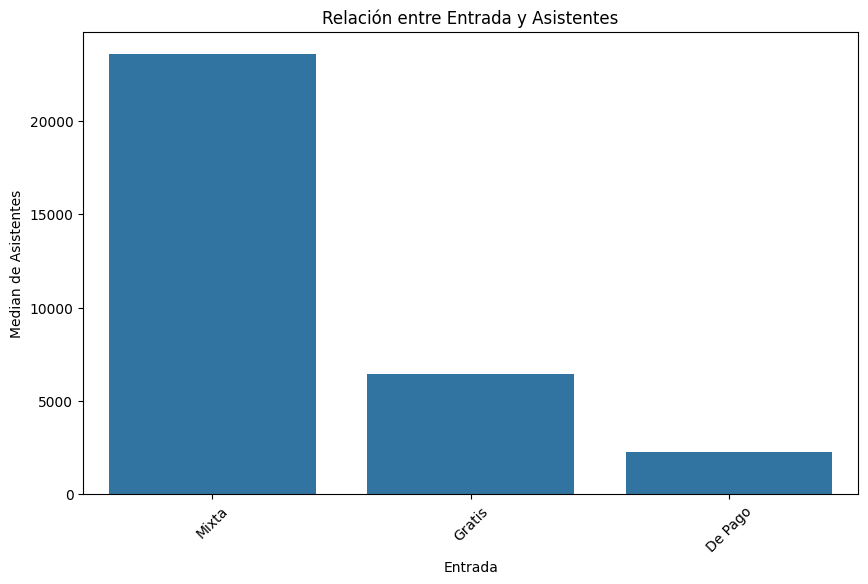

In [155]:
plot_categorical_numerical_relationship(festivales_bcn_20,"Entrada","Asistentes", measure = "median")

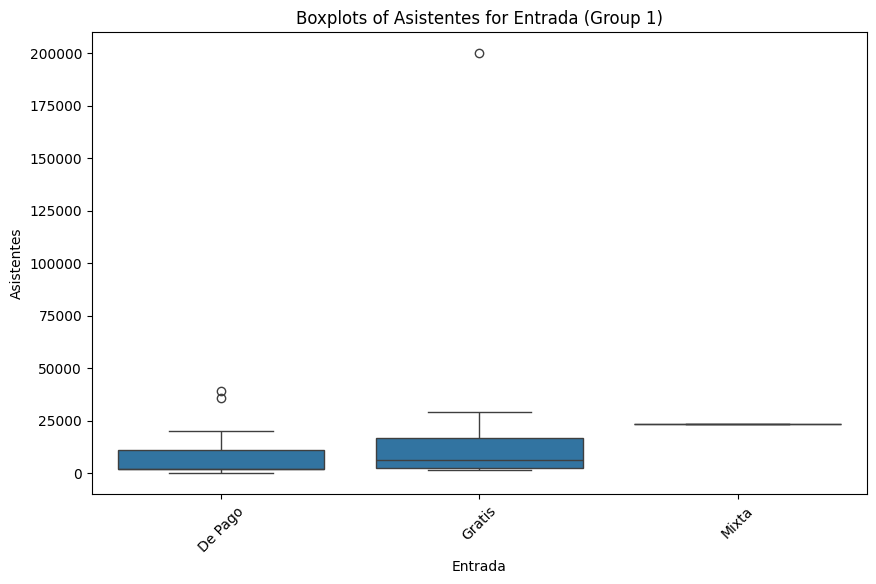

In [156]:
plot_grouped_boxplots(festivales_bcn_20,"Entrada","Asistentes")

Comentario:<br>
Todo cae en 2020, se aplanan los gráficos, hay menos fetsivales y menos dispersión, y las medias son las más bajas hasta ahora, lógicamente. Llama la atención un outlier de festival gratuito, muy lejos de todas las demás métricas.

2021

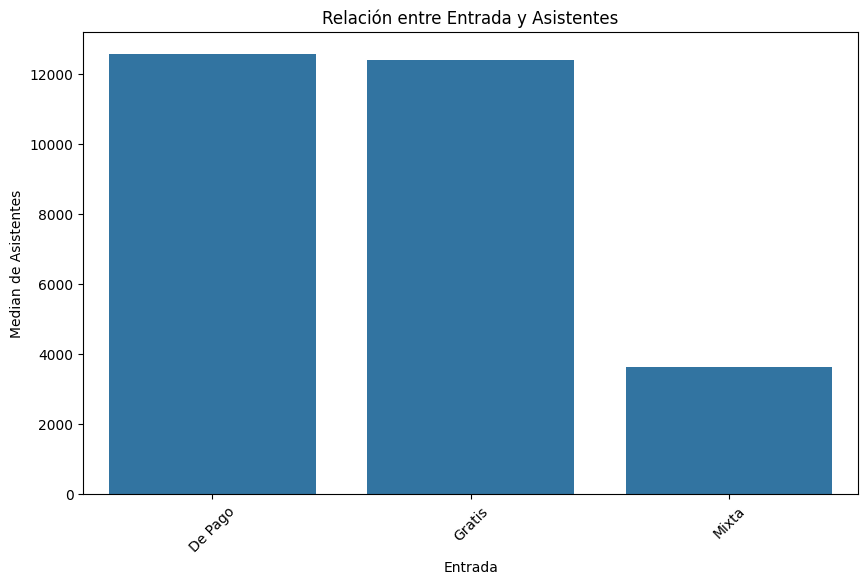

In [157]:
plot_categorical_numerical_relationship(festivales_bcn_21,"Entrada","Asistentes", measure = "median")

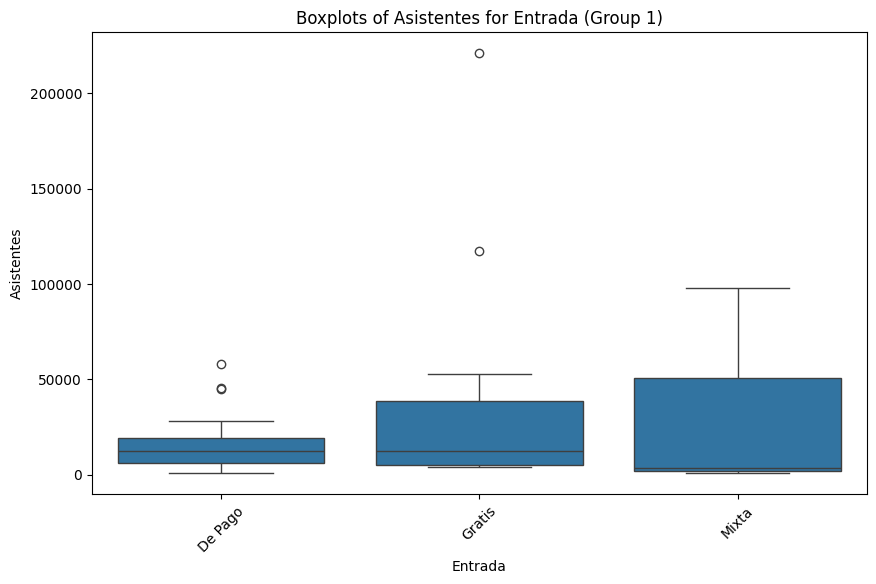

In [158]:
plot_grouped_boxplots(festivales_bcn_21,"Entrada","Asistentes")

Comentario:<br>
Nunca las medianas de gratuutos y de pago habían estado tan iguales. A pesar de ser el año siguiente a la pandemia, el resultado de este análisis es similar al año anterior: medias bajas, mayor dispersión en gratuita, y el máximo outlier, pero algo más de outliers en festivales de pago.

2022

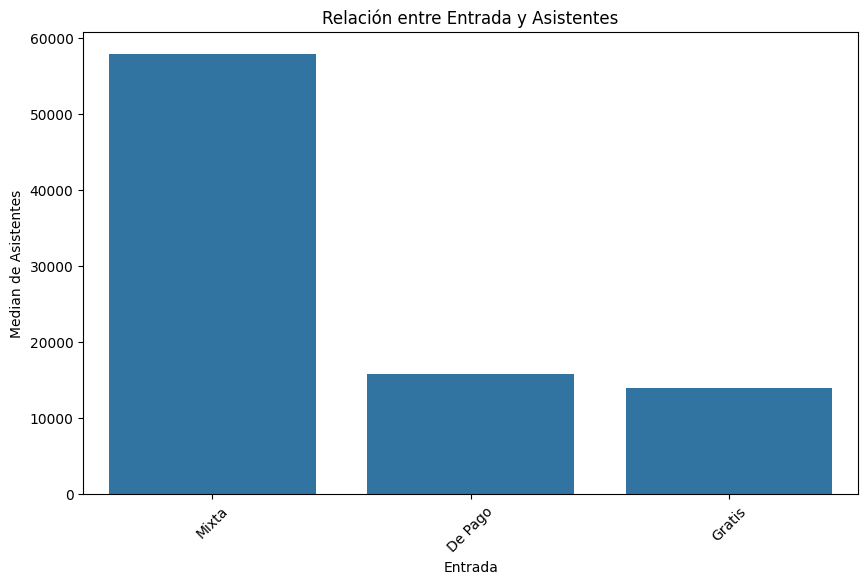

In [159]:
plot_categorical_numerical_relationship(festivales_bcn_22,"Entrada","Asistentes", measure = "median")

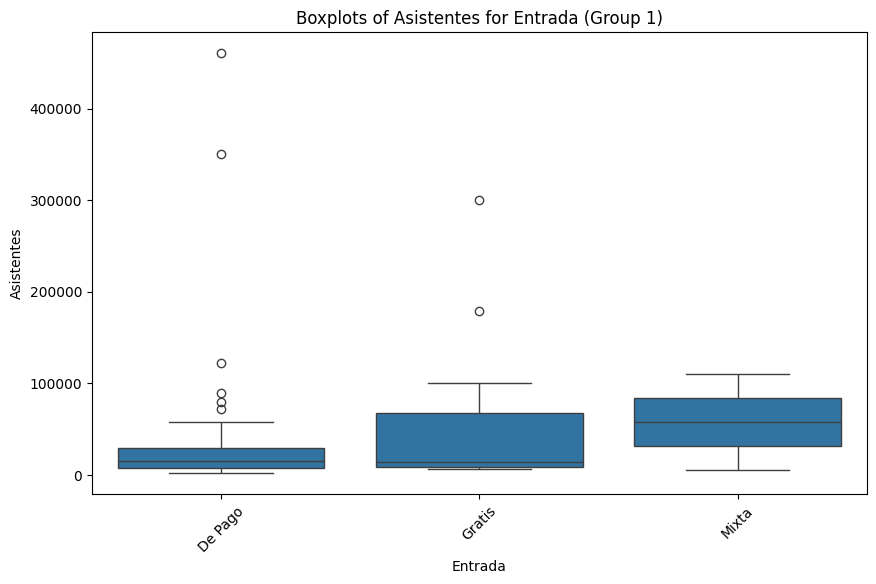

In [160]:
plot_grouped_boxplots(festivales_bcn_22,"Entrada","Asistentes")

Comentarios: <br>
En el último año de la muestra la dispersion de los festivales gratuitos aumenta y es casi el dobre que en los de pago, si bien las medias son similares y la dispersión de los de pago es similar a años atrás. Lo que sí varía mucho, y es una novedad en los 10 años observados, es que los festivales de pago, además de tener más outliers, tienen los 2 con mayores valores, el último de los cuales llega a 1.5 veces el mayor de los gratuitos.

Titularidad - Ediciones

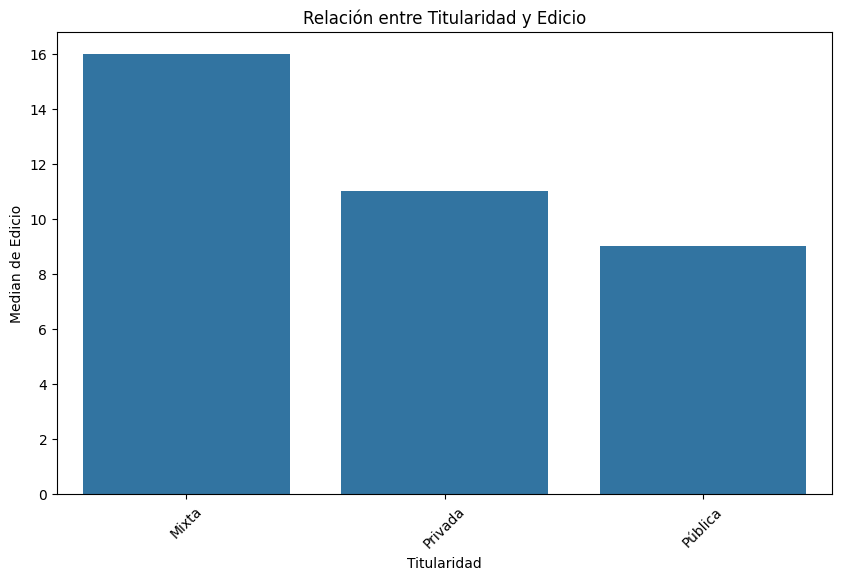

In [161]:
plot_categorical_numerical_relationship(festivales_bcn_18,"Titularidad","Edicio", measure = "median")

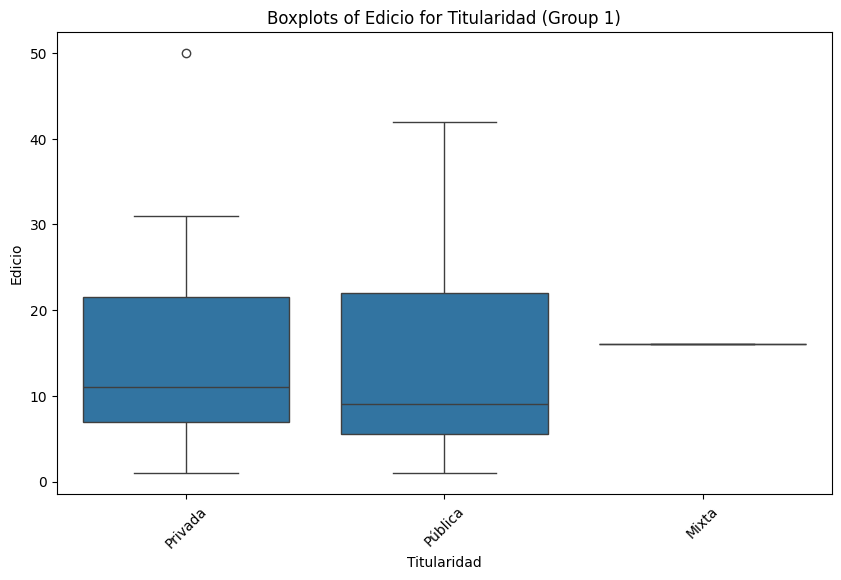

In [162]:
plot_grouped_boxplots(festivales_bcn_18,"Titularidad","Edicio")

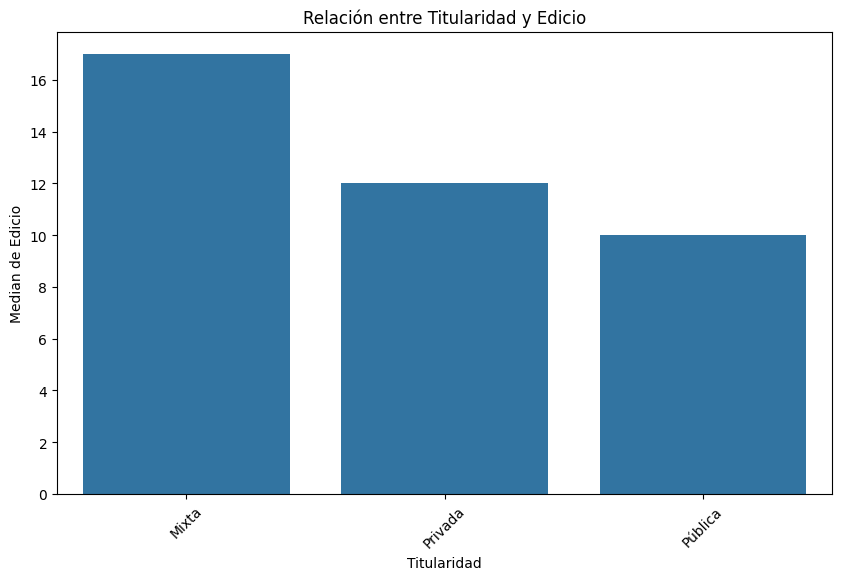

In [163]:
plot_categorical_numerical_relationship(festivales_bcn_19,"Titularidad","Edicio", measure = "median")

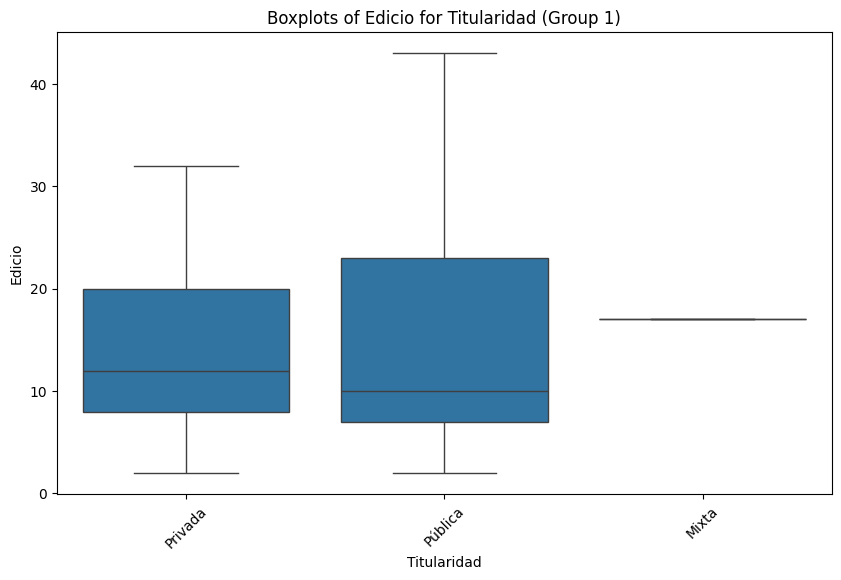

In [164]:
plot_grouped_boxplots(festivales_bcn_19,"Titularidad","Edicio")

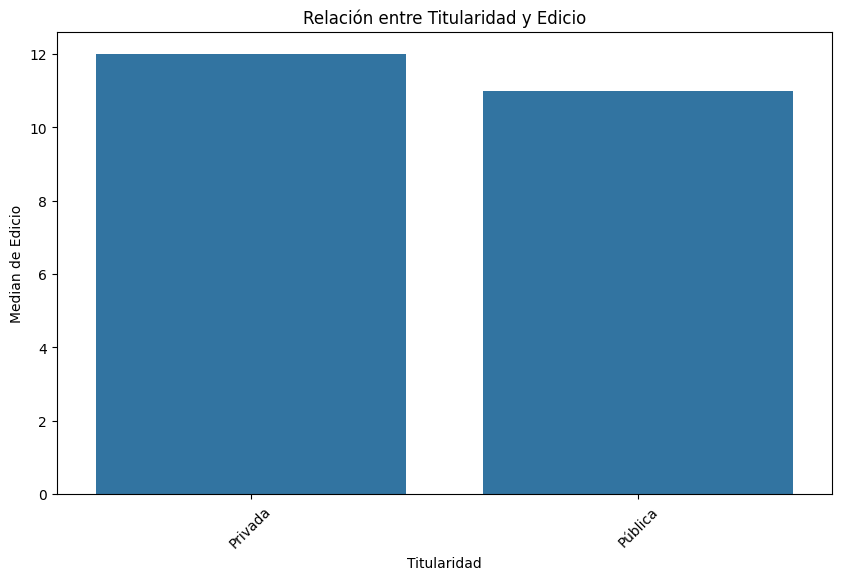

In [165]:
plot_categorical_numerical_relationship(festivales_bcn_20,"Titularidad","Edicio", measure = "median")

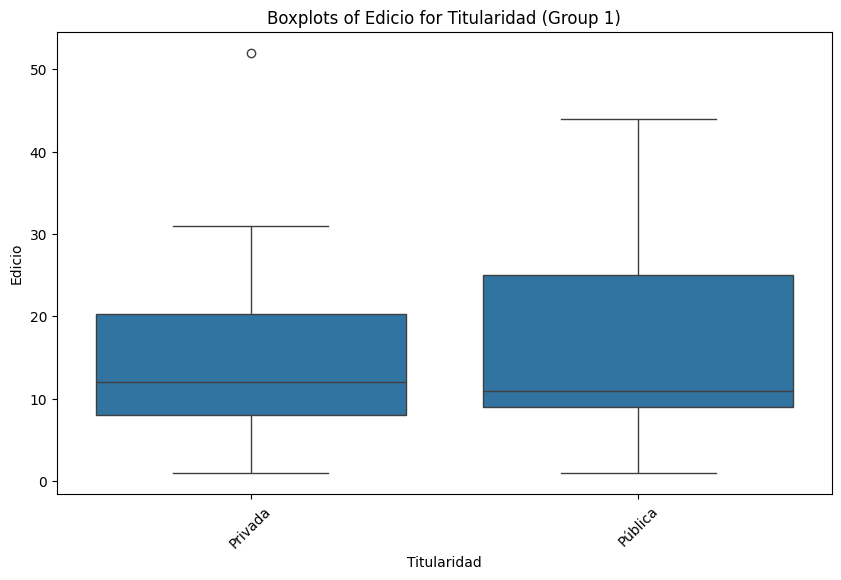

In [166]:
plot_grouped_boxplots(festivales_bcn_20,"Titularidad","Edicio")

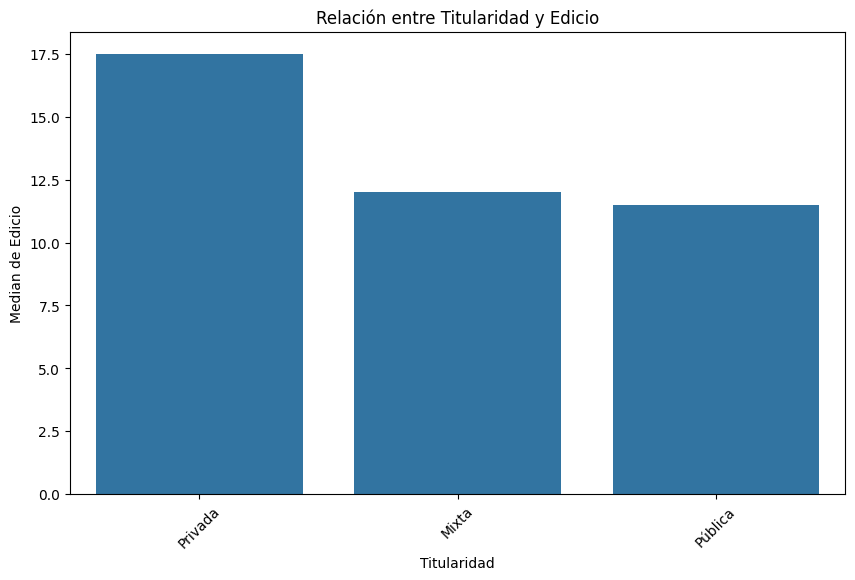

In [167]:
plot_categorical_numerical_relationship(festivales_bcn_21,"Titularidad","Edicio", measure = "median")

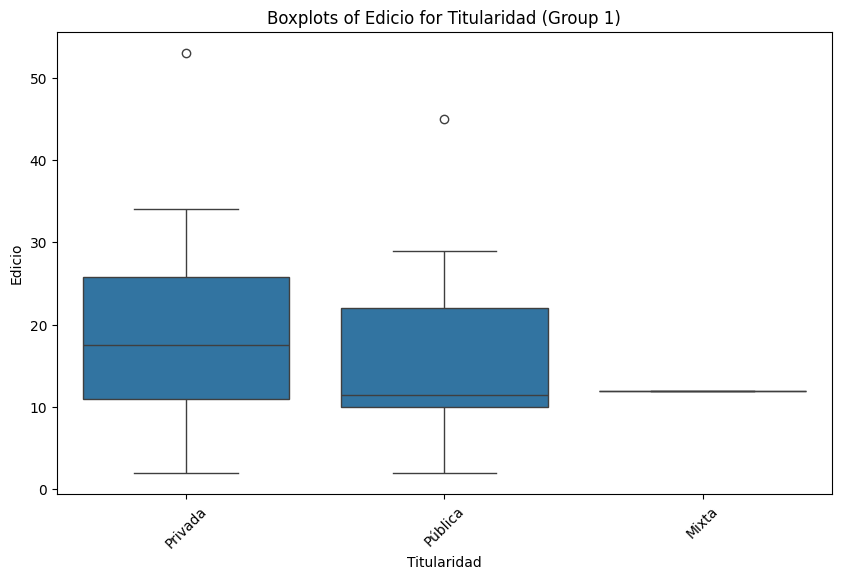

In [168]:
plot_grouped_boxplots(festivales_bcn_21,"Titularidad","Edicio")

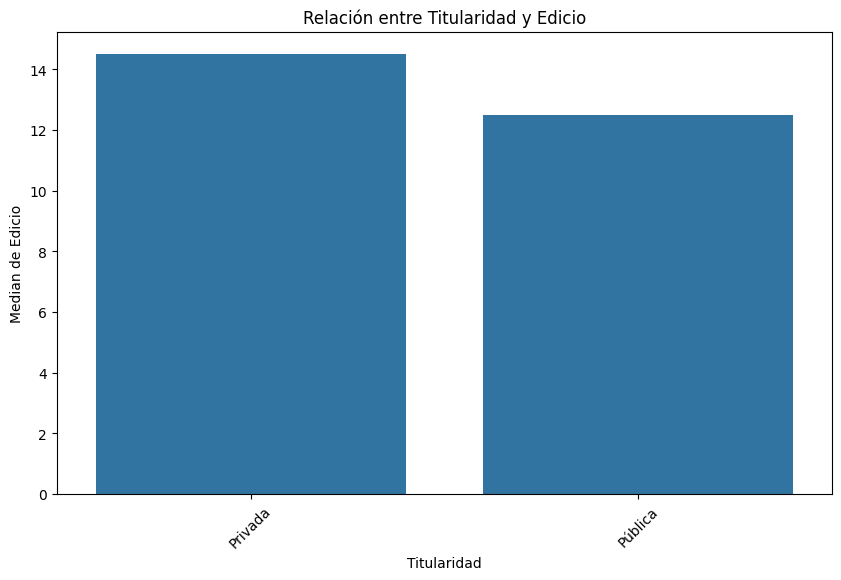

In [169]:
plot_categorical_numerical_relationship(festivales_bcn_22,"Titularidad","Edicio", measure = "median")

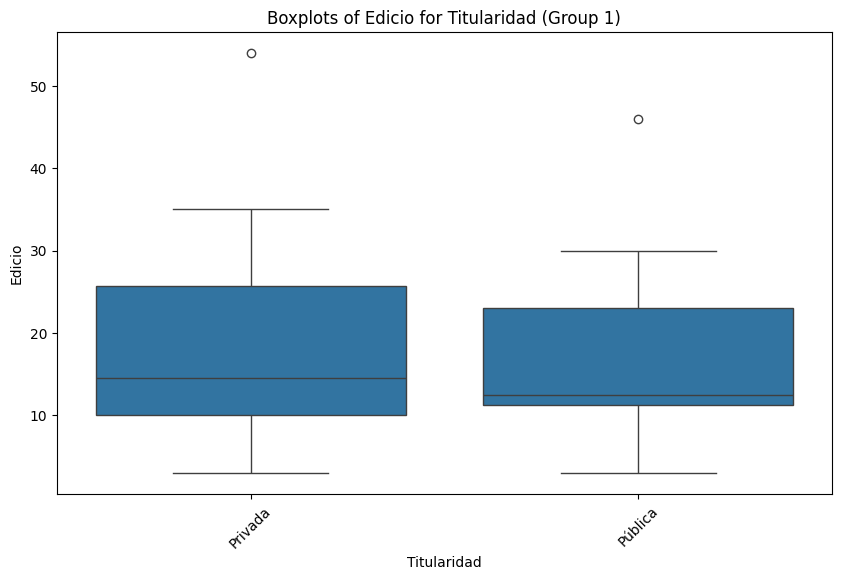

In [170]:
plot_grouped_boxplots(festivales_bcn_22,"Titularidad","Edicio")

Mes - Asistentes

Nombre del Festival y Asistentes

### Numéricas

Ediciones - Asistentes... no parece muy relevante

### Tablas de contingencia: Ámbito - Titularidad y Ámbito - Entrada

In [171]:
tabla_contingencia = pd.crosstab(festivales_bcn_13['Ambit'], festivales_bcn_13['Titularidad'])
tabla_contingencia

Titularidad                  Mixta  Privada  Pública
Ambit                                               
Arts escèniques                  0        2        2
Arts visuals                     0        3        0
Audiovisuals                     1       12        0
Lletres                          0        2        2
Multidisciplinaris i altres      0        3        0
Música                           0       16        2

In [172]:
tabla_contingencia = pd.crosstab(festivales_bcn_13['Ambit'], festivales_bcn_13['Entrada'])
tabla_contingencia

Entrada                      De Pago  Gratis  Mixta
Ambit                                              
Arts escèniques                    2       1      1
Arts visuals                       2       1      0
Audiovisuals                      11       2      0
Lletres                            2       2      0
Multidisciplinaris i altres        2       0      1
Música                            15       2      1

In [173]:
tabla_contingencia = pd.crosstab(festivales_bcn_14['Ambit'], festivales_bcn_14['Titularidad'])
tabla_contingencia

Titularidad                  Mixta  Privada  Pública
Ambit                                               
Arts escèniques                  0        2        2
Arts visuals                     0        4        0
Audiovisuals                     1       13        0
Lletres                          0        1        2
Multidisciplinaris i altres      0        4        0
Música                           0       19        1

In [174]:
tabla_contingencia = pd.crosstab(festivales_bcn_14['Ambit'], festivales_bcn_14['Entrada'])
tabla_contingencia

Entrada                      De Pago  Gratis  Mixta
Ambit                                              
Arts escèniques                    2       1      1
Arts visuals                       3       1      0
Audiovisuals                      12       2      0
Lletres                            1       2      0
Multidisciplinaris i altres        3       0      1
Música                            18       1      1

In [175]:
tabla_contingencia = pd.crosstab(festivales_bcn_15['Ambit'], festivales_bcn_15['Titularidad'])
tabla_contingencia

Titularidad                  Mixta  Privada  Pública
Ambit                                               
Arts escèniques                  0        2        2
Arts visuals                     0        4        1
Audiovisuals                     1       12        0
Lletres                          1        0        2
Multidisciplinaris i altres      0        5        0
Música                           0       18        2

In [176]:
tabla_contingencia = pd.crosstab(festivales_bcn_15['Ambit'], festivales_bcn_15['Entrada'])
tabla_contingencia

Entrada                      De Pago  Gratis  Mixta
Ambit                                              
Arts escèniques                    2       1      1
Arts visuals                       3       2      0
Audiovisuals                      11       2      0
Lletres                            0       2      1
Multidisciplinaris i altres        4       0      1
Música                            17       2      1

In [177]:
tabla_contingencia = pd.crosstab(festivales_bcn_16['Ambit'], festivales_bcn_16['Titularidad'])
tabla_contingencia

Titularidad                  Mixta  Privada  Pública
Ambit                                               
Arts escèniques                  0        2        2
Arts visuals                     0        5        0
Audiovisuals                     1       13        0
Lletres                          0        1        2
Multidisciplinaris i altres      0        4        0
Música                           0       18        2

In [178]:
tabla_contingencia = pd.crosstab(festivales_bcn_16['Ambit'], festivales_bcn_16['Entrada'])
tabla_contingencia

Entrada                      De Pago  Gratis  Mixta
Ambit                                              
Arts escèniques                    2       1      1
Arts visuals                       4       1      0
Audiovisuals                      12       2      0
Lletres                            1       2      0
Multidisciplinaris i altres        2       1      1
Música                            17       2      1

In [179]:
tabla_contingencia = pd.crosstab(festivales_bcn_17['Ambit'], festivales_bcn_17['Titularidad'])
tabla_contingencia

Titularidad                  Mixta  Privada  Pública
Ambit                                               
Arts escèniques                  0        2        2
Arts visuals                     0        4        1
Audiovisuals                     1       13        0
Lletres                          1        1        2
Multidisciplinaris i altres      0        3        2
Música                           0       15        2

In [180]:
tabla_contingencia = pd.crosstab(festivales_bcn_17['Ambit'], festivales_bcn_17['Entrada'])
tabla_contingencia

Entrada                      De Pago  Gratis  Mixta
Ambit                                              
Arts escèniques                    2       1      1
Arts visuals                       4       1      0
Audiovisuals                      12       2      0
Lletres                            1       2      1
Multidisciplinaris i altres        2       2      1
Música                            14       2      1

In [181]:
tabla_contingencia = pd.crosstab(festivales_bcn_18['Ambit'], festivales_bcn_18['Titularidad'])
tabla_contingencia

Titularidad                  Mixta  Privada  Pública
Ambit                                               
Arts escèniques                  0        2        3
Arts visuals                     0        6        1
Audiovisuals                     1       13        0
Lletres                          0        1        2
Multidisciplinaris i altres      0        4        3
Música                           0       17        2

In [182]:
tabla_contingencia = pd.crosstab(festivales_bcn_18['Ambit'], festivales_bcn_18['Entrada'])
tabla_contingencia

Entrada                      De Pago  Gratis  Mixta
Ambit                                              
Arts escèniques                    3       1      1
Arts visuals                       4       3      0
Audiovisuals                      12       2      0
Lletres                            1       2      0
Multidisciplinaris i altres        3       4      0
Música                            16       2      1

In [183]:
tabla_contingencia = pd.crosstab(festivales_bcn_19['Ambit'], festivales_bcn_19['Titularidad'])
tabla_contingencia

Titularidad                  Mixta  Privada  Pública
Ambit                                               
Arts escèniques                  0        2        3
Arts visuals                     0        4        1
Audiovisuals                     1       14        0
Lletres                          1        1        2
Multidisciplinaris i altres      0        4        3
Música                           0       20        2

In [184]:
tabla_contingencia = pd.crosstab(festivales_bcn_19['Ambit'], festivales_bcn_19['Entrada'])
tabla_contingencia

Entrada                      De Pago  Gratis  Mixta
Ambit                                              
Arts escèniques                    3       1      1
Arts visuals                       2       3      0
Audiovisuals                      13       2      0
Lletres                            1       2      1
Multidisciplinaris i altres        3       4      0
Música                            19       2      1

In [185]:
tabla_contingencia = pd.crosstab(festivales_bcn_20['Ambit'], festivales_bcn_20['Titularidad'])
tabla_contingencia

Titularidad                  Privada  Pública
Ambit                                        
Arts escèniques                    1        2
Arts visuals                       4        1
Audiovisuals                       4        0
Lletres                            0        1
Multidisciplinaris i altres        3        3
Música                             4        2

In [186]:
tabla_contingencia = pd.crosstab(festivales_bcn_20['Ambit'], festivales_bcn_20['Entrada'])
tabla_contingencia

Entrada                      De Pago  Gratis  Mixta
Ambit                                              
Arts escèniques                    1       1      1
Arts visuals                       3       2      0
Audiovisuals                       4       0      0
Lletres                            0       1      0
Multidisciplinaris i altres        2       4      0
Música                             4       2      0

In [187]:
tabla_contingencia = pd.crosstab(festivales_bcn_21['Ambit'], festivales_bcn_21['Titularidad'])
tabla_contingencia

Titularidad                  Mixta  Privada  Pública
Ambit                                               
Arts escèniques                  0        2        3
Arts visuals                     0        4        1
Audiovisuals                     0       11        0
Lletres                          1        1        2
Multidisciplinaris i altres      0        5        3
Música                           0       13        1

In [188]:
tabla_contingencia = pd.crosstab(festivales_bcn_21['Ambit'], festivales_bcn_21['Entrada'])
tabla_contingencia

Entrada                      De Pago  Gratis  Mixta
Ambit                                              
Arts escèniques                    3       1      1
Arts visuals                       2       3      0
Audiovisuals                      10       1      0
Lletres                            1       2      1
Multidisciplinaris i altres        4       4      0
Música                            12       1      1

In [189]:
tabla_contingencia = pd.crosstab(festivales_bcn_22['Ambit'], festivales_bcn_22['Titularidad'])
tabla_contingencia

Titularidad                  Privada  Pública
Ambit                                        
Arts escèniques                    2        3
Arts visuals                       4        1
Audiovisuals                      13        0
Lletres                            1        2
Multidisciplinaris i altres        4        3
Música                            19        1

In [190]:
tabla_contingencia = pd.crosstab(festivales_bcn_22['Ambit'], festivales_bcn_22['Entrada'])
tabla_contingencia

Entrada                      De Pago  Gratis  Mixta
Ambit                                              
Arts escèniques                    3       1      1
Arts visuals                       3       2      0
Audiovisuals                      12       1      0
Lletres                            1       2      0
Multidisciplinaris i altres        3       4      0
Música                            18       1      1

## Análisis de la década

In [191]:
tablas_festivales = [globals()[f'festivales_bcn_{year}'] for year in range(13, 23)]
festivales_decada = pd.concat(tablas_festivales, ignore_index=True)

In [192]:
festivales_decada[categoricas_destacadas].mode().T

0
Ambit         Música
Titularidad  Privada
Mes            Junio
Estacion       Otoño
Entrada      De Pago

In [193]:
ambit_counts = festivales_decada['Ambit'].value_counts()
print(ambit_counts)

Ambit
Música                         176
Audiovisuals                   125
Multidisciplinaris i altres     56
Arts visuals                    49
Arts escèniques                 43
Lletres                         32
Name: count, dtype: int64


In [194]:
titularidad_counts = festivales_decada['Titularidad'].value_counts()
print(titularidad_counts)

Titularidad
Privada    386
Pública     84
Mixta       11
Name: count, dtype: int64


In [195]:
entrada_counts = festivales_decada['Entrada'].value_counts()
print(entrada_counts)

Entrada
De Pago    349
Gratis     104
Mixta       28
Name: count, dtype: int64


In [196]:
mes_counts = festivales_decada['Mes'].value_counts()
print(mes_counts)

Mes
Junio         75
Noviembre     68
Octubre       58
Julio         53
Septiembre    43
Enero         43
Mayo          42
Marzo         34
Abril         21
Febrero       19
Agosto        13
Diciembre     12
Name: count, dtype: int64


In [197]:
estacion_counts = festivales_decada['Estacion'].value_counts()
print(estacion_counts)

Estacion
Otoño        154
Primavera    122
Verano       112
Invierno      93
Name: count, dtype: int64


In [198]:
total_asistentes = festivales_decada.groupby('Ambit')['Asistentes'].sum()
total_asistentes

Ambit
Arts escèniques                3340090.0
Arts visuals                   1750964.0
Audiovisuals                   1582171.0
Lletres                         332631.0
Multidisciplinaris i altres    1901330.0
Música                         7632453.0
Name: Asistentes, dtype: float64

In [199]:
tabla_contingencia = pd.crosstab(festivales_decada['Ambit'], festivales_decada['Titularidad'])
tabla_contingencia

Titularidad                  Mixta  Privada  Pública
Ambit                                               
Arts escèniques                  0       19       24
Arts visuals                     0       42        7
Audiovisuals                     7      118        0
Lletres                          4        9       19
Multidisciplinaris i altres      0       39       17
Música                           0      159       17

## Evoluciones

#### Comparación de asistenes por festival en la media de la década

Evolución x Ambito (de cuáles hay más y menos, y tendencias)

Evolucion x año: asistentes, ámbito, Titularidad, Mes, Estación

Cambios en la pandemia

## Comparativas entre festivales individuales

Festivales con más y menos ediciones... pero van a evolucionar más o menos a la par, es decir, todas van a sumar 1 edición más año a año a menos que se acaben. No tiene mucho sentido mas que como 1 foto estática

Festivales con más y menos asistentes.... esto ya esta en categórica NomDelFestival y total_asist

## Y más...

Correlación entre Ámbito y Titularidad, con el desarrollo de la población local y el turismo... en otro momento, no para este EDA